# SPI peak
- pleth peak -> ppga, hbi

In [2]:
import zipfile

with zipfile.ZipFile('pyvital2.zip') as NRS_vital_zip:
    NRS_vital_zip.extractall()

In [4]:
vital_path = 'PACU_vital/PACU1_1-3'
vital_list = os.listdir(vital_path)
vital_list

['PACU1_3_200717_175105.vital',
 'PACU1_2_200930_000526.vital',
 'PACU1_2_190718_142154.vital',
 'PACU1_1_200224_200759.vital',
 'PACU1_1_200812_095613.vital',
 'PACU1_1_190712_094848.vital',
 'PACU1_1_191024_105656.vital',
 'PACU1_2_200812_103624.vital',
 'PACU1_3_200803_191512.vital',
 'PACU1_2_200317_124925.vital',
 'PACU1_1_190823_094431.vital',
 'PACU1_2_200923_104751.vital',
 'PACU1_1_200316_175815.vital',
 'PACU1_1_190829_193244.vital',
 'PACU1_1_200512_120122.vital',
 'PACU1_1_190430_151645.vital',
 'PACU1_3_200630_134000.vital',
 'PACU1_3_200308_005944.vital',
 'PACU1_3_200811_112456.vital',
 'PACU1_1_200723_151212.vital',
 'PACU1_2_200701_084823.vital',
 'PACU1_3_200821_023317.vital',
 'PACU1_3_190410_023648.vital',
 'PACU1_2_200715_120145.vital',
 'PACU1_1_190523_091823.vital',
 'PACU1_1_201029_165937.vital',
 'PACU1_2_200326_132953.vital',
 'PACU1_3_190820_121227.vital',
 'PACU1_3_201012_151709.vital',
 'PACU1_1_200911_190526.vital',
 'PACU1_3_201005_224405.vital',
 'PACU1_

In [14]:
vals = vitaldb.vital_recs(vital_path+'/PACU1_1_200224_200759.vital', ['SNUADCW/PLETH'], interval = 0.01).flatten()
len(vals)

1

In [10]:
from pyvital2 import pleth_spi

print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 20, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

created a new group histogram



In [8]:
import os, pickle
from pyvital2 import vitaldb, arr
vital_path = '../../cranberry2/Preprocessing/ECG_250Hz/ECG_250Hz'
vital_list = os.listdir(vital_path)
vital_name = [vital[4:] for vital in vital_list]


cnt = 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing...loading sample... '+f_vital, end='')
        hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        print('done')
        
        #for hbi in hbi_list:
            #group_hist_hbi.learn(hbi)
        #for ppga in ppga_list:
            #group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        df = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
        #print('size of', f_vital, ':', len(vals), end='')
        break

(1/8318) 

In [9]:
df

Abs_time       ECG
135462 2020-07-15 13:32:59.002683  0.107422
135463 2020-07-15 13:32:59.006683  0.107422
135464 2020-07-15 13:32:59.010683  0.126953
135465 2020-07-15 13:32:59.014683  0.126953
135466 2020-07-15 13:32:59.018683  0.126953
...                           ...       ...
165458 2020-07-15 13:34:58.986683  0.019531
165459 2020-07-15 13:34:58.990683  0.029297
165460 2020-07-15 13:34:58.994683  0.048828
165461 2020-07-15 13:34:58.998683  0.058594
165462 2020-07-15 13:34:59.002683  0.068359

[30001 rows x 2 columns]

In [6]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = 'PACU_vital/PACU1_1-3'
vital_list = os.listdir(vital_path)
srate = 100

non_list = []

cnt = 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing...loading sample... '+f_vital, end='')
        hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        print('done')
        
        #for hbi in hbi_list:
            #group_hist_hbi.learn(hbi)
        #for ppga in ppga_list:
            #group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        if len(vals) == 1:
            print('no data')
            non_list.append(f_vital)
            continue
        
        print('\ndetecting peak...', end='')
        vals = arr.exclude_undefined(vals)
        
        # vals 값이 일정한 경우
        if len(np.unique(vals)) == 1:
            print('no valid data')
            non_list.append(f_vital)
            continue
        
        minlist, maxlist = arr.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                #group_hist_hbi.learn(hbi)
                hbi_list.append(hbi)
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                #group_hist_ppga.learn(ppga)
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))

(1/2048)  already existing...loading sample... PACU1_3_200717_175105.vitaldone
(2/2048)  already existing...loading sample... PACU1_2_200930_000526.vitaldone
(3/2048)  already existing...loading sample... PACU1_2_190718_142154.vitaldone
(4/2048) size of PACU1_1_200224_200759.vital : 243816
detecting peak...completed...
(5/2048)  already existing...loading sample... PACU1_1_200812_095613.vitaldone
(6/2048)  already existing...loading sample... PACU1_1_190712_094848.vitaldone
(7/2048)  already existing...loading sample... PACU1_1_191024_105656.vitaldone
(8/2048)  already existing...loading sample... PACU1_2_200812_103624.vitaldone
(9/2048)  already existing...loading sample... PACU1_3_200803_191512.vitaldone
(10/2048)  already existing...loading sample... PACU1_2_200317_124925.vitaldone
(11/2048)  already existing...loading sample... PACU1_1_190823_094431.vitaldone
(12/2048)  already existing...loading sample... PACU1_2_200923_104751.vitaldone
(13/2048)  already existing...loading sample

(107/2048) size of PACU1_1_200204_123058.vital : 253130
detecting peak...completed...
(108/2048)  already existing...loading sample... PACU1_1_200522_131543.vitaldone
(109/2048)  already existing...loading sample... PACU1_3_190716_095311.vitaldone
(110/2048)  already existing...loading sample... PACU1_3_200508_183036.vitaldone
(111/2048)  already existing...loading sample... PACU1_3_190816_133726.vitaldone
(112/2048)  already existing...loading sample... PACU1_3_200915_163220.vitaldone
(113/2048)  already existing...loading sample... PACU1_1_191021_094811.vitaldone
(114/2048)  already existing...loading sample... PACU1_2_200602_151101.vitaldone
(115/2048)  already existing...loading sample... PACU1_2_191023_125126.vitaldone
(116/2048)  already existing...loading sample... PACU1_3_200121_110242.vitaldone
(117/2048) size of PACU1_3_200221_224732.vital : 516820
detecting peak...completed...
(118/2048) size of PACU1_3_200214_024720.vital : 241154
detecting peak...completed...
(119/2048)  a

(233/2048) size of PACU1_1_200213_132324.vital : 258642
detecting peak...completed...
(234/2048)  already existing...loading sample... PACU1_2_200716_123803.vitaldone
(235/2048)  already existing...loading sample... PACU1_2_190607_115634.vitaldone
(236/2048)  already existing...loading sample... PACU1_3_190524_131002.vitaldone
(237/2048)  already existing...loading sample... PACU1_1_190704_134024.vitaldone
(238/2048)  already existing...loading sample... PACU1_1_200612_160558.vitaldone
(239/2048)  already existing...loading sample... PACU1_2_200630_224434.vitaldone
(240/2048)  already existing...loading sample... PACU1_2_190820_152951.vitaldone
(241/2048)  already existing...loading sample... PACU1_2_200529_101615.vitaldone
(242/2048)  already existing...loading sample... PACU1_2_201022_091414.vitaldone
(243/2048)  already existing...loading sample... PACU1_3_200818_172716.vitaldone
(244/2048)  already existing...loading sample... PACU1_1_190722_132616.vitaldone
(245/2048)  already exi

(348/2048) size of PACU1_3_200206_224128.vital : 226770
detecting peak...completed...
(349/2048)  already existing...loading sample... PACU1_1_190424_171921.vitaldone
(350/2048)  already existing...loading sample... PACU1_2_190711_085132.vitaldone
(351/2048)  already existing...loading sample... PACU1_1_190715_211026.vitaldone
(352/2048)  already existing...loading sample... PACU1_1_200714_112435.vitaldone
(353/2048)  already existing...loading sample... PACU1_1_200109_162237.vitaldone
(354/2048) size of PACU1_3_200206_163111.vital : 269952
detecting peak...completed...
(355/2048)  already existing...loading sample... PACU1_1_200110_164438.vitaldone
(356/2048) size of PACU1_1_200218_153348.vital : 247930
detecting peak...completed...
(357/2048)  already existing...loading sample... PACU1_1_201007_171720.vitaldone
(358/2048) size of PACU1_2_200221_134644.vital : 240912
detecting peak...completed...
(359/2048)  already existing...loading sample... PACU1_1_200723_125624.vitaldone
(360/204

(481/2048)  already existing...loading sample... PACU1_3_190907_034902.vitaldone
(482/2048)  already existing...loading sample... PACU1_1_201022_090538.vitaldone
(483/2048) size of PACU1_2_200221_160504.vital : 266482
detecting peak...completed...
(484/2048)  already existing...loading sample... PACU1_3_200331_153124.vitaldone
(485/2048)  already existing...loading sample... PACU1_1_200817_154544.vitaldone
(486/2048)  already existing...loading sample... PACU1_1_200107_155217.vitaldone
(487/2048) size of PACU1_2_200211_174603.vital : 87910
detecting peak...completed...
(488/2048) size of PACU1_1_200128_132348.vital : 237128
detecting peak...completed...
(489/2048)  already existing...loading sample... PACU1_1_200528_134815.vitaldone
(490/2048) size of PACU1_3_200129_184824.vital : 270397
detecting peak...completed...
(491/2048)  already existing...loading sample... PACU1_2_200603_153419.vitaldone
(492/2048) size of PACU1_1_200214_212645.vital : 248535
detecting peak...completed...
(493

(585/2048) size of PACU1_1_200221_160045.vital : 498279
detecting peak...completed...
(586/2048)  already existing...loading sample... PACU1_1_191021_084709.vitaldone
(587/2048)  already existing...loading sample... PACU1_1_190611_180631.vitaldone
(588/2048)  already existing...loading sample... PACU1_3_200824_163114.vitaldone
(589/2048)  already existing...loading sample... PACU1_2_190827_113803.vitaldone
(590/2048)  already existing...loading sample... PACU1_1_200310_120609.vitaldone
(591/2048)  already existing...loading sample... PACU1_1_200722_154824.vitaldone
(592/2048)  already existing...loading sample... PACU1_1_190419_124501.vitaldone
(593/2048)  already existing...loading sample... PACU1_1_200910_201522.vitaldone
(594/2048)  already existing...loading sample... PACU1_1_200909_090352.vitaldone
(595/2048) size of PACU1_3_200210_165634.vital : 223830
detecting peak...completed...
(596/2048)  already existing...loading sample... PACU1_1_190409_202913.vitaldone
(597/2048)  alread

detecting peak...completed...
(686/2048) size of PACU1_1_200213_114207.vital : 261017
detecting peak...completed...
(687/2048)  already existing...loading sample... PACU1_3_191219_151527.vitaldone
(688/2048)  already existing...loading sample... PACU1_1_191024_125724.vitaldone
(689/2048)  already existing...loading sample... PACU1_3_200115_110924.vitaldone
(690/2048)  already existing...loading sample... PACU1_3_200103_020908.vitaldone
(691/2048)  already existing...loading sample... PACU1_3_190529_080317.vitaldone
(692/2048)  already existing...loading sample... PACU1_2_200814_010412.vitaldone
(693/2048)  already existing...loading sample... PACU1_1_200602_164356.vitaldone
(694/2048)  already existing...loading sample... PACU1_3_191022_165029.vitaldone
(695/2048)  already existing...loading sample... PACU1_3_200811_041642.vitaldone
(696/2048)  already existing...loading sample... PACU1_1_200608_095337.vitaldone
(697/2048)  already existing...loading sample... PACU1_3_190723_083248.vit

detecting peak...completed...
(787/2048)  already existing...loading sample... PACU1_3_200814_202002.vitaldone
(788/2048)  already existing...loading sample... PACU1_3_200511_160956.vitaldone
(789/2048)  already existing...loading sample... PACU1_3_200724_100953.vitaldone
(790/2048)  already existing...loading sample... PACU1_2_200507_002522.vitaldone
(791/2048)  already existing...loading sample... PACU1_1_200521_123325.vitaldone
(792/2048)  already existing...loading sample... PACU1_3_201005_151042.vitaldone
(793/2048)  already existing...loading sample... PACU1_1_201023_194909.vitaldone
(794/2048)  already existing...loading sample... PACU1_3_200813_113717.vitaldone
(795/2048)  already existing...loading sample... PACU1_1_200318_172235.vitaldone
(796/2048)  already existing...loading sample... PACU1_1_191018_132325.vitaldone
(797/2048)  already existing...loading sample... PACU1_2_200813_170526.vitaldone
(798/2048)  already existing...loading sample... PACU1_3_200518_104159.vitaldon

(916/2048) size of PACU1_3_200130_102824.vital : 183437
detecting peak...completed...
(917/2048) size of PACU1_3_200125_121017.vital : 219452
detecting peak...completed...
(918/2048) size of PACU1_2_200205_211323.vital : 239581
detecting peak...completed...
(919/2048)  already existing...loading sample... PACU1_3_201010_010844.vitaldone
(920/2048) size of PACU1_3_200124_231218.vital : 212369
detecting peak...completed...
(921/2048)  already existing...loading sample... PACU1_2_200821_103901.vitaldone
(922/2048)  already existing...loading sample... PACU1_3_200515_161125.vitaldone
(923/2048)  already existing...loading sample... PACU1_2_200608_213248.vitaldone
(924/2048)  already existing...loading sample... PACU1_1_190503_114505.vitaldone
(925/2048)  already existing...loading sample... PACU1_1_200121_200554.vitaldone
(926/2048) size of PACU1_3_200225_220934.vital : 248898
detecting peak...completed...
(927/2048)  already existing...loading sample... PACU1_3_200319_101850.vitaldone
(92

detecting peak...completed...
(1017/2048)  already existing...loading sample... PACU1_1_201006_114441.vitaldone
(1018/2048)  already existing...loading sample... PACU1_3_190723_102414.vitaldone
(1019/2048)  already existing...loading sample... PACU1_3_200529_201904.vitaldone
(1020/2048)  already existing...loading sample... PACU1_3_190821_084813.vitaldone
(1021/2048)  already existing...loading sample... PACU1_1_190417_161120.vitaldone
(1022/2048) size of PACU1_3_200126_185601.vital : 311334
detecting peak...completed...
(1023/2048)  already existing...loading sample... PACU1_2_190703_215330.vitaldone
(1024/2048)  already existing...loading sample... PACU1_2_190416_123946.vitaldone
(1025/2048)  already existing...loading sample... PACU1_1_200102_130054.vitaldone
(1026/2048) size of PACU1_1_200206_165455.vital : 227882
detecting peak...completed...
(1027/2048)  already existing...loading sample... PACU1_1_200722_195028.vitaldone
(1028/2048)  already existing...loading sample... PACU1_2_

(1131/2048) size of PACU1_3_200221_104707.vital : 324523
detecting peak...completed...
(1132/2048)  already existing...loading sample... PACU1_3_190820_221750.vitaldone
(1133/2048)  already existing...loading sample... PACU1_1_200304_162120.vitaldone
(1134/2048)  already existing...loading sample... PACU1_3_200711_020251.vitaldone
(1135/2048)  already existing...loading sample... PACU1_3_201016_095446.vitaldone
(1136/2048)  already existing...loading sample... PACU1_2_200818_191929.vitaldone
(1137/2048)  already existing...loading sample... PACU1_2_190718_192914.vitaldone
(1138/2048)  already existing...loading sample... PACU1_3_200711_131410.vitaldone
(1139/2048)  already existing...loading sample... PACU1_1_200914_160040.vitaldone
(1140/2048)  already existing...loading sample... PACU1_2_190910_100401.vitaldone
(1141/2048)  already existing...loading sample... PACU1_1_200514_104348.vitaldone
(1142/2048)  already existing...loading sample... PACU1_1_200923_114746.vitaldone
(1143/2048)

(1242/2048) size of PACU1_2_200211_111825.vital : 259610
detecting peak...completed...
(1243/2048)  already existing...loading sample... PACU1_1_200821_102704.vitaldone
(1244/2048)  already existing...loading sample... PACU1_2_200115_171604.vitaldone
(1245/2048)  already existing...loading sample... PACU1_3_200925_192209.vitaldone
(1246/2048)  already existing...loading sample... PACU1_3_200708_184828.vitaldone
(1247/2048)  already existing...loading sample... PACU1_1_190716_190502.vitaldone
(1248/2048)  already existing...loading sample... PACU1_3_200113_010737.vitaldone
(1249/2048)  already existing...loading sample... PACU1_1_200526_091926.vitaldone
(1250/2048)  already existing...loading sample... PACU1_3_200901_182451.vitaldone
(1251/2048)  already existing...loading sample... PACU1_1_190902_131344.vitaldone
(1252/2048) size of PACU1_3_200221_140033.vital : 261966
detecting peak...completed...
(1253/2048)  already existing...loading sample... PACU1_3_200617_211022.vitaldone
(1254/

detecting peak...completed...
(1342/2048)  already existing...loading sample... PACU1_1_190906_153832.vitaldone
(1343/2048)  already existing...loading sample... PACU1_3_190723_103354.vitaldone
(1344/2048)  already existing...loading sample... PACU1_1_200602_222624.vitaldone
(1345/2048)  already existing...loading sample... PACU1_1_200810_164003.vitaldone
(1346/2048)  already existing...loading sample... PACU1_1_190816_110423.vitaldone
(1347/2048)  already existing...loading sample... PACU1_2_190718_090107.vitaldone
(1348/2048)  already existing...loading sample... PACU1_2_200928_155210.vitaldone
(1349/2048)  already existing...loading sample... PACU1_2_200624_132634.vitaldone
(1350/2048)  already existing...loading sample... PACU1_1_200928_124639.vitaldone
(1351/2048) size of PACU1_1_200214_223336.vital : 205331
detecting peak...completed...
(1352/2048) size of PACU1_2_200129_103553.vital : 264979
detecting peak...completed...
(1353/2048)  already existing...loading sample... PACU1_3_

detecting peak...completed...
(1444/2048)  already existing...loading sample... PACU1_1_191231_085337.vitaldone
(1445/2048) size of PACU1_1_200213_140923.vital : 264717
detecting peak...completed...
(1446/2048)  already existing...loading sample... PACU1_3_200109_233312.vitaldone
(1447/2048)  already existing...loading sample... PACU1_1_190603_152550.vitaldone
(1448/2048)  already existing...loading sample... PACU1_1_190411_130403.vitaldone
(1449/2048)  already existing...loading sample... PACU1_1_200723_095535.vitaldone
(1450/2048)  already existing...loading sample... PACU1_2_190612_153210.vitaldone
(1451/2048)  already existing...loading sample... PACU1_2_190717_154349.vitaldone
(1452/2048)  already existing...loading sample... PACU1_1_200513_130640.vitaldone
(1453/2048)  already existing...loading sample... PACU1_3_190904_152424.vitaldone
(1454/2048)  already existing...loading sample... PACU1_3_200924_120358.vitaldone
(1455/2048)  already existing...loading sample... PACU1_3_20100

(1544/2048) size of PACU1_3_200210_212804.vital : 508201
detecting peak...completed...
(1545/2048)  already existing...loading sample... PACU1_3_200708_091543.vitaldone
(1546/2048)  already existing...loading sample... PACU1_2_190828_121020.vitaldone
(1547/2048)  already existing...loading sample... PACU1_3_190708_002936.vitaldone
(1548/2048)  already existing...loading sample... PACU1_3_190820_181030.vitaldone
(1549/2048)  already existing...loading sample... PACU1_3_190503_233552.vitaldone
(1550/2048)  already existing...loading sample... PACU1_3_200911_163759.vitaldone
(1551/2048)  already existing...loading sample... PACU1_2_190828_152507.vitaldone
(1552/2048)  already existing...loading sample... PACU1_3_190822_111857.vitaldone
(1553/2048)  already existing...loading sample... PACU1_2_200317_093413.vitaldone
(1554/2048)  already existing...loading sample... PACU1_1_190719_182807.vitaldone
(1555/2048) size of PACU1_2_200127_094846.vital : 268043
detecting peak...completed...
(1556/

detecting peak...completed...
(1648/2048)  already existing...loading sample... PACU1_3_200302_160235.vitaldone
(1649/2048)  already existing...loading sample... PACU1_3_190819_082733.vitaldone
(1650/2048)  already existing...loading sample... PACU1_3_200303_154819.vitaldone
(1651/2048)  already existing...loading sample... PACU1_2_200309_114930.vitaldone
(1652/2048)  already existing...loading sample... PACU1_2_190703_202359.vitaldone
(1653/2048) size of PACU1_1_200217_111202.vital : 243499
detecting peak...completed...
(1654/2048)  already existing...loading sample... PACU1_2_200609_124225.vitaldone
(1655/2048) size of PACU1_3_200214_175828.vital : 362033
detecting peak...completed...
(1656/2048)  already existing...loading sample... PACU1_2_200309_152150.vitaldone
(1657/2048)  already existing...loading sample... PACU1_3_190902_160501.vitaldone
(1658/2048)  already existing...loading sample... PACU1_1_200714_155006.vitaldone
(1659/2048)  already existing...loading sample... PACU1_3_

(1767/2048) size of PACU1_3_200123_044553.vital : 295362
detecting peak...completed...
(1768/2048) size of PACU1_3_200122_090234.vital : 505660
detecting peak...completed...
(1769/2048)  already existing...loading sample... PACU1_2_190429_121918.vitaldone
(1770/2048)  already existing...loading sample... PACU1_1_200309_134328.vitaldone
(1771/2048)  already existing...loading sample... PACU1_2_200102_175652.vitaldone
(1772/2048)  already existing...loading sample... PACU1_1_190509_144324.vitaldone
(1773/2048)  already existing...loading sample... PACU1_1_190516_203320.vitaldone
(1774/2048)  already existing...loading sample... PACU1_3_190409_114333.vitaldone
(1775/2048)  already existing...loading sample... PACU1_3_200103_145245.vitaldone
(1776/2048)  already existing...loading sample... PACU1_2_200603_133105.vitaldone
(1777/2048)  already existing...loading sample... PACU1_1_190517_140734.vitaldone
(1778/2048)  already existing...loading sample... PACU1_1_190408_202459.vitaldone
(1779/

(1885/2048) size of PACU1_1_200123_104144.vital : 247688
detecting peak...completed...
(1886/2048)  already existing...loading sample... PACU1_1_200615_124257.vitaldone
(1887/2048)  already existing...loading sample... PACU1_1_191226_085511.vitaldone
(1888/2048)  already existing...loading sample... PACU1_1_190607_160350.vitaldone
(1889/2048) size of PACU1_3_200220_233503.vital : 306010
detecting peak...completed...
(1890/2048)  already existing...loading sample... PACU1_1_200928_115238.vitaldone
(1891/2048)  already existing...loading sample... PACU1_3_200103_003134.vitaldone
(1892/2048)  already existing...loading sample... PACU1_1_201008_134520.vitaldone
(1893/2048)  already existing...loading sample... PACU1_3_201024_122437.vitaldone
(1894/2048)  already existing...loading sample... PACU1_2_190705_185939.vitaldone
(1895/2048) size of PACU1_3_200220_172819.vital : 259667
detecting peak...completed...
(1896/2048)  already existing...loading sample... PACU1_1_200925_135316.vitaldone
(

In [5]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb_mod

vital_path = 'PACU_vital/PACU1_1-3'
f_vital = 'PACU1_1_200224_200759.vital'
vals = vitaldb_mod.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
print(vals)

[ 27.34375   26.953125  26.953125 ...  13.28125  -10.15625    8.203125]


In [ ]:
vital_path = 'PACU_vital/PACU1_4-6'
vital_list = os.listdir(vital_path)

cnt = -1
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('loading sample '+f_vital)
        hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        
        for hbi in hbi_list:
            group_hist_ppga.learn(hbi)
        for ppga in ppga_list:
            group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        if len(vals) == 1:
            print('no data')
            non_list.append(f_vital)
            continue
        
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        print('size of', f_vital, ':', len(vals))
        print('detecting peak...', end='')
        vals = arr.exclude_undefined(vals)
        minlist, maxlist = arr.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                group_hist_hbi.learn(hbi)
                hbi_list.append(hbi)
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                group_hist_ppga.learn(ppga)
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))

## SPI test set peak 뽑기
<br>
individual distribution을 구하기 위함

In [17]:
for file_name in vital_list:
    mod_name = file_name.split(',')[1]+','+file_name.split(',')[2]
    os.rename(os.path.join(vital_path,file_name), os.path.join(vital_path,mod_name))

In [19]:
vital_list

['2849,PACU1_4_200108_135548.vital',
 '6875,PACU1_1_200805_103731.vital',
 '7224,PACU1_7_200825_104427.vital',
 '5509,PACU1_2_200529_191241.vital',
 '1258,PACU1_1_190717_084957.vital',
 '4123,PACU1_3_200228_195646.vital',
 '5835,PACU1_9_200612_094447.vital',
 '7245,PACU1_1_200828_144451.vital',
 '2446,PACU1_3_191018_110127.vital',
 '5004,PACU1_8_200508_105237.vital',
 '1391,PACU1_3_190719_154655.vital',
 '7512,PACU1_3_200918_092853.vital',
 '7458,PACU1_1_200916_162304.vital',
 '3998,PACU1_2_200224_104638.vital',
 '4954,PACU1_7_200506_174637.vital',
 '4942,PACU1_11_200504_141412.vital',
 '2537,PACU1_1_191024_125724.vital',
 '2011,PACU1_6_190830_155845.vital',
 '5358,PACU1_8_200526_101944.vital',
 '2436,PACU1_11_191017_140015.vital',
 '2888,PACU1_1_200109_162237.vital',
 '3490,PACU1_10_200205_120438.vital',
 '1640,PACU1_10_190820_163322.vital',
 '8019,PACU1_11_201014_141319.vital',
 '7468,PACU1_4_200917_083845.vital',
 '5364,PACU1_1_200526_123356.vital',
 '6815,PACU1_11_200731_135403.vit

### SPI test set의 individual histogram 저장
<br>
- NRS 측정 2분전까지의 모든 PPG 데이터를 histogram에 저장

In [10]:
import os, sys
import pickle
import pandas as pd
import numpy as np
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, pleth_spi, vitaldb

srate = 100
vital_path = 'SPI_test_set'
vital_list = os.listdir(vital_path)

# creating group histogram
print("created a new group histogram\n")
hist_ppga = pleth_spi.Histogram(0, 100, 1000)
hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list, short_ppg_list = [], []
cnt = 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "../../cranberry2/Preprocessing/cache/SPI_PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('already existing peaks of '+f_vital)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        df_vital = pickle.load(open(vital_path+'/'+f_vital,'rb'))
        vals = df_vital['pleth'].tolist()
        #vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        if len(vals) <= 1:
            print('no data')
            non_list.append(f_vital)
            continue
        if len(vals) < 12000:
            print('ppg data < 2min')
            short_ppg_list.append(f_vital)
            continue
            
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        print('size of', f_vital, ':', len(vals[:-12000]))
        print('detecting peak...', end='')
        vals = arr.exclude_undefined(vals[:-12000])
        minlist, maxlist = arr.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                hist_hbi.learn(hbi)
                hbi_list.append(hbi)   # 이러면 hbi_list와 ppga_list가 어긋남. spi 계산할땐 문제지만 지금은 단순히 hist 학습
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                hist_ppga.learn(ppga)
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        pickle.dump((hist_hbi, hist_ppga), open('cache/histogram/'+f_vital,'wb'))

created a new group histogram

(1/787) size of 2849,PACU1_4_200108_135548.vital : 223052
detecting peak...completed...
(2/787) size of 6875,PACU1_1_200805_103731.vital : 212779
detecting peak...completed...
(3/787) size of 7224,PACU1_7_200825_104427.vital : 201216
detecting peak...completed...
(4/787) size of 5509,PACU1_2_200529_191241.vital : 91876
detecting peak...completed...
(5/787) size of 1258,PACU1_1_190717_084957.vital : 198355
detecting peak...completed...
(6/787) size of 4123,PACU1_3_200228_195646.vital : 157309
detecting peak...completed...
(7/787) size of 5835,PACU1_9_200612_094447.vital : 79299
detecting peak...completed...
(8/787) size of 7245,PACU1_1_200828_144451.vital : 18839
detecting peak...completed...
(9/787) size of 2446,PACU1_3_191018_110127.vital : 69255
detecting peak...completed...
(10/787) size of 5004,PACU1_8_200508_105237.vital : 32193
detecting peak...completed...
(11/787) size of 1391,PACU1_3_190719_154655.vital : 516335
detecting peak...completed...
ppg 

detecting peak...completed...
(196/787) size of 2236,PACU1_5_190906_164701.vital : 95783
detecting peak...completed...
(197/787) size of 6254,PACU1_5_200702_181420.vital : 81845
detecting peak...completed...
(198/787) size of 7219,PACU1_3_200824_163114.vital : 40520
detecting peak...completed...
(199/787) size of 6959,PACU1_3_200811_112456.vital : 48253
detecting peak...completed...
(200/787) size of 8018,PACU1_6_201014_135931.vital : 140847
detecting peak...completed...
(201/787) size of 4411,PACU1_9_200310_165006.vital : 47264
detecting peak...completed...
(202/787) size of 5792,PACU1_1_200610_202606.vital : 11284
detecting peak...completed...
(203/787) size of 3313,PACU1_9_200129_100629.vital : 38939
detecting peak...completed...
(204/787) size of 4381,PACU1_7_200309_165443.vital : 49669
detecting peak...completed...
(205/787) size of 690,PACU1_5_190529_101102.vital : 101792
detecting peak...completed...
(206/787) size of 5316,PACU1_8_200522_110921.vital : 81844
detecting peak...com

detecting peak...completed...
(293/787) size of 1809,PACU1_4_190822_203857.vital : 174133
detecting peak...completed...
(294/787) size of 3244,PACU1_12_200122_163312.vital : 88679
detecting peak...completed...
(295/787) size of 5148,PACU1_1_200514_153414.vital : 142355
detecting peak...completed...
(296/787) size of 7593,PACU1_1_200922_150810.vital : 208874
detecting peak...completed...
(297/787) size of 4251,PACU1_5_200304_124721.vital : 33876
detecting peak...completed...
(298/787) size of 3124,PACU1_3_200117_165846.vital : 115128
detecting peak...completed...
(299/787) size of 2318,PACU1_8_190910_165227.vital : 33204
detecting peak...completed...
ppg data < 2min
(301/787) size of 2001,PACU1_10_190830_135223.vital : 153533
detecting peak...completed...
(302/787) size of 7396,PACU1_6_200915_112132.vital : 38768
detecting peak...completed...
(303/787) size of 3822,PACU1_2_200218_185629.vital : 129052
detecting peak...completed...
(304/787) size of 7012,PACU1_2_200812_164026.vital : 753

detecting peak...completed...
(391/787) size of 4049,PACU1_9_200225_172708.vital : 65174
detecting peak...completed...
(392/787) size of 2479,PACU1_3_191021_093930.vital : 321014
detecting peak...completed...
(393/787) size of 3233,PACU1_1_200122_134827.vital : 57262
detecting peak...completed...
(394/787) size of 2787,PACU1_8_200106_163626.vital : 129310
detecting peak...completed...
(395/787) size of 5487,PACU1_6_200529_121341.vital : 37890
detecting peak...completed...
(396/787) size of 5790,PACU1_1_200610_191621.vital : 9800
detecting peak...completed...
(397/787) size of 7373,PACU1_3_200911_195111.vital : 100831
detecting peak...completed...
(398/787) size of 157,PACU1_4_190430_011154.vital : 126458
detecting peak...completed...
(399/787) size of 5973,PACU1_10_200617_142506.vital : 17300
detecting peak...completed...
(400/787) size of 7320,PACU1_3_200910_131322.vital : 117705
detecting peak...completed...
(401/787) size of 6091,PACU1_7_200624_093158.vital : 156169
detecting peak..

detecting peak...completed...
(584/787) size of 1074,PACU1_10_190709_172441.vital : 19877
detecting peak...completed...
(585/787) size of 5366,PACU1_11_200526_131650.vital : 96810
detecting peak...completed...
(586/787) size of 3885,PACU1_4_200219_210246.vital : 1247
detecting peak...completed...
(587/787) size of 3813,PACU1_4_200218_154434.vital : 230539
detecting peak...completed...
(588/787) size of 5497,PACU1_10_200529_151443.vital : 49686
detecting peak...completed...
ppg data < 2min
(590/787) size of 7194,PACU1_1_200821_165245.vital : 61387
detecting peak...completed...
(591/787) size of 6073,PACU1_4_200623_151318.vital : 88156
detecting peak...completed...
(592/787) size of 474,PACU1_7_190515_162217.vital : 4193
detecting peak...completed...
(593/787) size of 5147,PACU1_1_200514_153414.vital : 22355
detecting peak...completed...
ppg data < 2min
(595/787) size of 5991,PACU1_6_200618_083629.vital : 128976
detecting peak...completed...
(596/787) size of 3987,PACU1_3_200221_224732.v

detecting peak...completed...
(684/787) size of 8229,PACU1_11_201026_132629.vital : 39050
detecting peak...completed...
(685/787) size of 302,PACU1_12_190507_153946.vital : 79258
detecting peak...completed...
(686/787) size of 1734,PACU1_10_190821_154935.vital : 20498
detecting peak...completed...
(687/787) size of 390,PACU1_2_190513_214102.vital : 11727
detecting peak...completed...
(688/787) size of 7143,PACU1_10_200820_103206.vital : 95338
detecting peak...completed...
(689/787) size of 3894,PACU1_1_200220_102905.vital : 83402
detecting peak...completed...
(690/787) size of 2386,PACU1_12_190917_105505.vital : 119414
detecting peak...completed...
(691/787) size of 7537,PACU1_2_200918_163529.vital : 134991
detecting peak...completed...
ppg data < 2min
(693/787) size of 1345,PACU1_5_190718_182050.vital : 102968
detecting peak...completed...
(694/787) size of 4733,PACU1_4_200323_140030.vital : 74925
detecting peak...completed...
(695/787) size of 1340,PACU1_1_190718_165707.vital : 15520

detecting peak...completed...
(779/787) size of 7116,PACU1_2_200819_152037.vital : 74124
detecting peak...completed...
(780/787) size of 1870,PACU1_10_190827_134744.vital : 31522
detecting peak...completed...
(781/787) size of 1760,PACU1_5_190821_201717.vital : 64196
detecting peak...completed...
(782/787) size of 236,PACU1_4_190503_094652.vital : 36665
detecting peak...completed...
(783/787) size of 2347,PACU1_8_190911_135025.vital : 45334
detecting peak...completed...
(784/787) size of 307,PACU1_4_190507_171358.vital : 144124
detecting peak...completed...
(785/787) size of 3489,PACU1_10_200205_120438.vital : 50106
detecting peak...completed...
(786/787) size of 7086,PACU1_7_200818_145515.vital : 196427
detecting peak...completed...
(787/787) size of 4964,PACU1_9_200507_091727.vital : 93148
detecting peak...completed...


In [11]:
short_ppg_list

['7512,PACU1_3_200918_092853.vital',
 '5409,PACU1_4_200527_135854.vital',
 '301,PACU1_12_190507_153946.vital',
 '1689,PACU1_3_190821_084813.vital',
 '7136,PACU1_1_200820_093916.vital',
 '4129,PACU1_3_200302_100836.vital',
 '176,PACU1_12_190430_151349.vital',
 '7851,PACU1_7_201007_111324.vital',
 '295,PACU1_11_190507_112917.vital',
 '6974,PACU1_8_200811_162825.vital',
 '1456,PACU1_5_190723_165846.vital',
 '8270,PACU1_2_201027_153435.vital',
 '803,PACU1_12_190607_141912.vital',
 '6966,PACU1_2_200811_124816.vital',
 '2045,PACU1_4_190902_234827.vital',
 '4711,PACU1_3_200320_163212.vital',
 '2831,PACU1_2_200108_092327.vital',
 '3768,PACU1_1_200217_115421.vital',
 '5936,PACU1_12_200616_152932.vital',
 '1703,PACU1_10_190821_102951.vital',
 '4631,PACU1_1_200318_161331.vital',
 '1737,PACU1_3_190821_160843.vital',
 '2123,PACU1_5_190904_154406.vital',
 '5982,PACU1_4_200617_163518.vital',
 '970,PACU1_5_190704_190828.vital',
 '3731,PACU1_10_200214_134908.vital',
 '86,PACU1_1_190419_195900.vital',
 

### Preop의 데이터를 개인 histogram으로 이용
- PACU 데이터를 개인 histogram으로 하였더니 SPI 값이 너무 50에 몰림
- 그래서 평온한 때인 PREOP 데이터를 개인 histogram + group histogram 으로 학습

In [ ]:
import os, sys
import pickle
import pandas as pd
import numpy as np
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, pleth_spi, vitaldb


srate = 100
vital_path = 'preop_vital/preop_vital'
vital_list = os.listdir(vital_path)


# creating group histogram
print("created a new group histogram\n")
hist_ppga = pleth_spi.Histogram(0, 100, 1000)
hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list, short_ppg_list = [], []
cnt = 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/SPI_PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('already existing peaks of '+f_vital)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        df_vital = pickle.load(open(vital_path+'/'+f_vital,'rb'))
        vals = df_vital['pleth'].tolist()
        #vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        if len(vals) <= 1:
            print('no data')
            non_list.append(f_vital)
            continue
        if len(vals) < 12000:
            print('ppg data < 2min')
            short_ppg_list.append(f_vital)
            continue
            
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        print('size of', f_vital, ':', len(vals[:-12000]))
        print('detecting peak...', end='')
        vals = arr.exclude_undefined(vals[:-12000])
        minlist, maxlist = arr.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                hist_hbi.learn(hbi)
                hbi_list.append(hbi)   # 이러면 hbi_list와 ppga_list가 어긋남. spi 계산할땐 문제지만 지금은 단순히 hist 학습
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                hist_ppga.learn(ppga)
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        pickle.dump((hist_hbi, hist_ppga), open('cache/histogram/'+f_vital,'wb'))

In [7]:
import os, sys
import pickle
import pandas as pd
import numpy as np
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, pleth_spi, vitaldb

srate = 100
vital_path = 'preop_vital/preop_vital'
vital_list = os.listdir(vital_path)


non_list, short_ppg_list = [], []
cnt = 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG_preop/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('already existing peaks of '+f_vital)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/PLETH'], interval = 0.01).flatten()
        vals = arr.exclude_undefined(vals)
        
        if len(vals) <= 1:
            print('no data')
            non_list.append(f_vital)
            continue
            
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        print('size of', f_vital, ':', len(vals))
        print('detecting peak...', end='')
        minlist, maxlist = arr.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                hbi_list.append(hbi)   # 이러면 hbi_list와 ppga_list가 어긋남. spi 계산할땐 문제지만 지금은 단순히 hist 학습
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        #pickle.dump((hist_hbi, hist_ppga), open('cache/histogram/'+f_vital,'wb'))

already existing peaks of F4_190718_122631.vital
already existing peaks of R2_201017_152717.vital
already existing peaks of R7_200325_140654.vital
already existing peaks of R6_200311_074332.vital
already existing peaks of D1_190717_122932.vital
already existing peaks of D4_190723_120847.vital
already existing peaks of R6_200521_075516.vital
no data
already existing peaks of R2_200318_140336.vital
no data
already existing peaks of D4_200717_132621.vital
already existing peaks of F3_190827_185348.vital
already existing peaks of D2_200526_075345.vital
already existing peaks of D5_190515_142444.vital
already existing peaks of A6_190827_115147.vital
already existing peaks of E2_190820_075051.vital
already existing peaks of R2_200710_120753.vital
already existing peaks of E4_200514_151538.vital
already existing peaks of D3_190830_140039.vital
already existing peaks of R6_200717_075408.vital
no data
already existing peaks of R4_200305_102255.vital
already existing peaks of R1_200819_121938.vi

no data
already existing peaks of C2_190820_143229.vital
already existing peaks of A1_190819_104423.vital
already existing peaks of R5_200528_213224.vital
already existing peaks of A1_190829_090228.vital
already existing peaks of C3_200611_143753.vital
already existing peaks of A1_200102_180801.vital
already existing peaks of E4_200928_133210.vital
already existing peaks of R8_200925_182036.vital
already existing peaks of A5_190821_075351.vital
already existing peaks of A2_200106_102059.vital
already existing peaks of R1_200612_145826.vital
already existing peaks of R10_200508_145649.vital
already existing peaks of R6_200810_120829.vital
already existing peaks of C5_191224_074337.vital
already existing peaks of A2_190430_074553.vital
already existing peaks of R5_200603_101428.vital
already existing peaks of D3_190918_125906.vital
already existing peaks of R4_200318_162650.vital
already existing peaks of C3_190611_105055.vital
already existing peaks of R10_200917_075032.vital
already ex

detecting peak...completed...
(654/4115) size of C5_200330_073717.vital : 59539
detecting peak...completed...
(655/4115) size of D2_200929_080359.vital : 59816
detecting peak...completed...
(656/4115) size of D1_191231_143338.vital : 59732
detecting peak...completed...
no data
(658/4115) size of E3_201014_142844.vital : 59454
detecting peak...completed...
(659/4115) size of F3_200107_145855.vital : 59620
detecting peak...completed...
(660/4115) size of D1_200715_104314.vital : 59420
detecting peak...completed...
(661/4115) size of R3_200910_120135.vital : 59799
detecting peak...completed...
(662/4115) size of A4_190905_104124.vital : 59879
detecting peak...completed...
(663/4115) size of E2_190821_135412.vital : 59879
detecting peak...completed...
(664/4115) size of F1_191028_075951.vital : 59879
detecting peak...completed...
(665/4115) size of D4_190514_075345.vital : 59904
detecting peak...completed...
(666/4115) size of A2_190529_075235.vital : 59740
detecting peak...completed...
no

detecting peak...completed...
(765/4115) size of D2_200214_111203.vital : 59617
detecting peak...completed...
(766/4115) size of C4_190718_203257.vital : 59680
detecting peak...completed...
(767/4115) size of D2_200106_155744.vital : 59540
detecting peak...completed...
(768/4115) size of R9_200708_123635.vital : 59560
detecting peak...completed...
(769/4115) size of A2_190424_222235.vital : 59820
detecting peak...completed...
(770/4115) size of D5_190523_074435.vital : 59880
detecting peak...completed...
(771/4115) size of C3_191219_154730.vital : 59863
detecting peak...completed...
(772/4115) size of E1_200615_152117.vital : 59419
detecting peak...completed...
(773/4115) size of R1_200622_101607.vital : 59700
detecting peak...completed...
(774/4115) size of D1_200129_105120.vital : 59739
detecting peak...completed...
(775/4115) size of F1_190829_115159.vital : 59501
detecting peak...completed...
(776/4115) size of D2_200323_074858.vital : 59819
detecting peak...completed...
(777/4115)

detecting peak...completed...
(872/4115) size of R6_200211_075923.vital : 59619
detecting peak...completed...
(873/4115) size of E4_190530_105412.vital : 59720
detecting peak...completed...
(874/4115) size of C5_200914_142334.vital : 59520
detecting peak...completed...
(875/4115) size of C3_190709_094903.vital : 59880
detecting peak...completed...
(876/4115) size of R5_200814_001844.vital : 59839
detecting peak...completed...
(877/4115) size of C4_190703_073742.vital : 59800
detecting peak...completed...
(878/4115) size of C5_200331_074748.vital : 59859
detecting peak...completed...
(879/4115) size of E5_200602_133042.vital : 59899
detecting peak...completed...
(880/4115) size of R8_200609_091133.vital : 59900
detecting peak...completed...
(881/4115) size of R9_200828_075922.vital : 59700
detecting peak...completed...
(882/4115) size of R2_200527_102124.vital : 59540
detecting peak...completed...
(883/4115) size of R1_200302_144019.vital : 59659
detecting peak...completed...
(884/4115)

detecting peak...completed...
(1085/4115) size of R2_200303_080125.vital : 59879
detecting peak...completed...
(1086/4115) size of E1_200518_131927.vital : 59537
detecting peak...completed...
(1087/4115) size of A5_200108_075727.vital : 59620
detecting peak...completed...
(1088/4115) size of R3_201027_075523.vital : 59940
detecting peak...completed...
(1089/4115) size of E3_200204_184055.vital : 59561
detecting peak...completed...
(1090/4115) size of A4_190823_151720.vital : 59695
detecting peak...completed...
(1091/4115) size of D3_190819_104634.vital : 59680
detecting peak...completed...
(1092/4115) size of D2_200227_111258.vital : 59672
detecting peak...completed...
(1093/4115) size of D2_200330_075323.vital : 59919
detecting peak...completed...
no data
(1095/4115) size of F1_190708_151423.vital : 59660
detecting peak...completed...
(1096/4115) size of F4_190509_135354.vital : 59520
detecting peak...completed...
(1097/4115) size of C3_190830_140316.vital : 59702
detecting peak...com

detecting peak...completed...
(1191/4115) size of C3_200821_121323.vital : 59820
detecting peak...completed...
(1192/4115) size of R6_200511_075850.vital : 59880
detecting peak...completed...
(1193/4115) size of R10_200601_132644.vital : 59840
detecting peak...completed...
(1194/4115) size of R2_200221_185129.vital : 59476
detecting peak...completed...
(1195/4115) size of E4_200604_085316.vital : 59999
detecting peak...completed...
(1196/4115) size of R5_200318_075030.vital : 59879
detecting peak...completed...
(1197/4115) size of A5_190531_214712.vital : 59700
detecting peak...completed...
(1198/4115) size of E2_200205_074700.vital : 59760
detecting peak...completed...
(1199/4115) size of R6_200928_205921.vital : 59617
detecting peak...completed...
(1200/4115) size of D5_190524_075442.vital : 59820
detecting peak...completed...
(1201/4115) size of E3_200513_151541.vital : 59539
detecting peak...completed...
(1202/4115) size of F3_191223_135031.vital : 59615
detecting peak...completed.

detecting peak...completed...
no data
(1297/4115) size of C5_200811_075007.vital : 59499
detecting peak...completed...
(1298/4115) size of R5_200313_204512.vital : 59767
detecting peak...completed...
(1299/4115) size of A1_191018_090252.vital : 59899
detecting peak...completed...
no data
(1301/4115) size of E2_200707_170015.vital : 59942
detecting peak...completed...
(1302/4115) size of R7_200806_110738.vital : 59606
detecting peak...completed...
(1303/4115) size of R1_200929_154957.vital : 59729
detecting peak...completed...
(1304/4115) size of D3_190906_135146.vital : 59877
detecting peak...completed...
(1305/4115) size of C5_200215_083619.vital : 59979
detecting peak...completed...
(1306/4115) size of R6_200807_095530.vital : 59667
detecting peak...completed...
(1307/4115) size of R5_201015_214453.vital : 59499
detecting peak...completed...
(1308/4115) size of E1_200703_153132.vital : 59839
detecting peak...completed...
(1309/4115) size of E4_200630_113051.vital : 59998
detecting pe

detecting peak...completed...
(1510/4115) size of R2_201006_154251.vital : 59468
detecting peak...completed...
(1511/4115) size of A5_191024_125521.vital : 59778
detecting peak...completed...
(1512/4115) size of C5_190912_200158.vital : 59859
detecting peak...completed...
(1513/4115) size of E2_190529_074410.vital : 59880
detecting peak...completed...
(1514/4115) size of C3_200512_074047.vital : 59882
detecting peak...completed...
(1515/4115) size of R1_200610_144550.vital : 59448
detecting peak...completed...
(1516/4115) size of E5_200825_073958.vital : 59831
detecting peak...completed...
(1517/4115) size of F4_190607_141431.vital : 59880
detecting peak...completed...
(1518/4115) size of A1_190510_092631.vital : 59880
detecting peak...completed...
no data
(1520/4115) size of R4_200218_123618.vital : 59560
detecting peak...completed...
(1521/4115) size of R6_200828_124528.vital : 59760
detecting peak...completed...
(1522/4115) size of E4_191224_075820.vital : 59796
detecting peak...com

detecting peak...completed...
(1615/4115) size of A4_190530_093608.vital : 59880
detecting peak...completed...
(1616/4115) size of D2_200121_210038.vital : 59601
detecting peak...completed...
(1617/4115) size of E4_190704_125908.vital : 59460
detecting peak...completed...
(1618/4115) size of D5_201019_150634.vital : 59910
detecting peak...completed...
(1619/4115) size of E4_200807_081419.vital : 59599
detecting peak...completed...
(1620/4115) size of R4_200612_084137.vital : 59800
detecting peak...completed...
(1621/4115) size of R4_201012_105835.vital : 59756
detecting peak...completed...
(1622/4115) size of D1_190710_093632.vital : 59920
detecting peak...completed...
(1623/4115) size of R1_200227_133116.vital : 59739
detecting peak...completed...
(1624/4115) size of E6_200228_095426.vital : 59507
detecting peak...completed...
(1625/4115) size of A5_190514_074152.vital : 59820
detecting peak...completed...
(1626/4115) size of D4_190504_185429.vital : 59860
detecting peak...completed..

detecting peak...completed...
(1720/4115) size of R10_201014_075850.vital : 59479
detecting peak...completed...
(1721/4115) size of A2_190726_134524.vital : 59760
detecting peak...completed...
(1722/4115) size of R2_201020_195604.vital : 59760
detecting peak...completed...
(1723/4115) size of E3_201028_075119.vital : 59676
detecting peak...completed...
(1724/4115) size of C2_190423_223028.vital : 59480
detecting peak...completed...
(1725/4115) size of F1_190903_155059.vital : 59499
detecting peak...completed...
(1726/4115) size of E2_190523_130606.vital : 59840
detecting peak...completed...
(1727/4115) size of R7_200318_075533.vital : 59393
detecting peak...completed...
(1728/4115) size of D5_190711_075049.vital : 59819
detecting peak...completed...
(1729/4115) size of C2_200601_112828.vital : 59750
detecting peak...completed...
(1730/4115) size of R10_200219_124321.vital : 59819
detecting peak...completed...
(1731/4115) size of R9_200916_075405.vital : 59679
detecting peak...completed

detecting peak...completed...
no data
(1826/4115) size of C4_200219_074141.vital : 59880
detecting peak...completed...
(1827/4115) size of E6_200529_120236.vital : 59559
detecting peak...completed...
(1828/4115) size of C4_200115_202533.vital : 59420
detecting peak...completed...
(1829/4115) size of A5_190610_213804.vital : 59540
detecting peak...completed...
(1830/4115) size of R4_200715_074506.vital : 59519
detecting peak...completed...
(1831/4115) size of E3_200113_075220.vital : 59960
detecting peak...completed...
(1832/4115) size of D1_200512_094741.vital : 59480
detecting peak...completed...
(1833/4115) size of R5_200217_075420.vital : 59919
detecting peak...completed...
(1834/4115) size of R3_201029_153010.vital : 59920
detecting peak...completed...
(1835/4115) size of E6_200217_133531.vital : 59440
detecting peak...completed...
(1836/4115) size of E2_190902_120959.vital : 59660
detecting peak...completed...
(1837/4115) size of E1_191021_100704.vital : 59858
detecting peak...com

detecting peak...completed...
(1932/4115) size of A1_190718_085532.vital : 59460
detecting peak...completed...
(1933/4115) size of R9_200604_091459.vital : 59660
detecting peak...completed...
(1934/4115) size of C5_200822_193531.vital : 59819
detecting peak...completed...
(1935/4115) size of D3_200728_102256.vital : 59840
detecting peak...completed...
(1936/4115) size of C2_200302_074805.vital : 59958
detecting peak...completed...
(1937/4115) size of E4_200227_122151.vital : 59819
detecting peak...completed...
(1938/4115) size of R1_201013_173443.vital : 59682
detecting peak...completed...
(1939/4115) size of C3_200619_140147.vital : 59480
detecting peak...completed...
(1940/4115) size of R10_200711_115453.vital : 59720
detecting peak...completed...
(1941/4115) size of R1_200617_141622.vital : 59479
detecting peak...completed...
(1942/4115) size of R4_200306_153304.vital : 59519
detecting peak...completed...
(1943/4115) size of A2_190514_074714.vital : 59500
detecting peak...completed.

detecting peak...completed...
(2039/4115) size of R2_200724_103645.vital : 59790
detecting peak...completed...
(2040/4115) size of A4_190523_074043.vital : 59880
detecting peak...completed...
(2041/4115) size of R2_200214_215218.vital : 59539
detecting peak...completed...
(2042/4115) size of E5_190516_074654.vital : 59580
detecting peak...completed...
(2043/4115) size of F1_190710_152308.vital : 59520
detecting peak...completed...
(2044/4115) size of R2_201008_075314.vital : 59478
detecting peak...completed...
(2045/4115) size of D2_200311_101727.vital : 59599
detecting peak...completed...
(2046/4115) size of C3_201016_121954.vital : 59799
detecting peak...completed...
no data
(2048/4115) size of D1_200324_095622.vital : 59519
detecting peak...completed...
(2049/4115) size of D1_200507_143252.vital : 59839
detecting peak...completed...
(2050/4115) size of E3_200603_130509.vital : 59790
detecting peak...completed...
(2051/4115) size of A1_200110_085838.vital : 59519
detecting peak...com

detecting peak...completed...
(2145/4115) size of F2_190712_091936.vital : 59880
detecting peak...completed...
(2146/4115) size of C5_200220_074346.vital : 59959
detecting peak...completed...
(2147/4115) size of A2_190829_143915.vital : 59559
detecting peak...completed...
(2148/4115) size of R1_200714_080111.vital : 59640
detecting peak...completed...
(2149/4115) size of C3_190704_144952.vital : 59760
detecting peak...completed...
(2150/4115) size of R2_200506_075015.vital : 59891
detecting peak...completed...
(2151/4115) size of E4_200206_161311.vital : 59588
detecting peak...completed...
(2152/4115) size of R9_201021_091656.vital : 59534
detecting peak...completed...
(2153/4115) size of R4_200715_092031.vital : 59879
detecting peak...completed...
(2154/4115) size of C5_200921_233400.vital : 59820
detecting peak...completed...
(2155/4115) size of R3_200825_074429.vital : 59779
detecting peak...completed...
(2156/4115) size of C5_200601_075146.vital : 59999
detecting peak...completed..

detecting peak...completed...
no data
(2253/4115) size of A1_190513_090347.vital : 59640
detecting peak...completed...
(2254/4115) size of E5_201016_123454.vital : 59932
detecting peak...completed...
(2255/4115) size of D1_200310_104944.vital : 59679
detecting peak...completed...
(2256/4115) size of A1_190429_085738.vital : 59520
detecting peak...completed...
(2257/4115) size of D3_190411_075009.vital : 59480
detecting peak...completed...
(2258/4115) size of D1_200527_120722.vital : 59739
detecting peak...completed...
(2259/4115) size of R2_200811_074822.vital : 59748
detecting peak...completed...
(2260/4115) size of F2_190816_075132.vital : 59527
detecting peak...completed...
(2261/4115) size of A5_190911_210818.vital : 59739
detecting peak...completed...
(2262/4115) size of D2_200513_150649.vital : 59899
detecting peak...completed...
(2263/4115) size of C5_200311_133827.vital : 59859
detecting peak...completed...
(2264/4115) size of R4_200221_113400.vital : 59598
detecting peak...com

detecting peak...completed...
no data
(2361/4115) size of R6_200814_150802.vital : 59839
detecting peak...completed...
(2362/4115) size of E3_190418_142837.vital : 59480
detecting peak...completed...
(2363/4115) size of R3_200528_151743.vital : 59799
detecting peak...completed...
(2364/4115) size of E5_190529_142526.vital : 59521
detecting peak...completed...
no data
(2366/4115) size of F2_190717_075253.vital : 59540
detecting peak...completed...
(2367/4115) size of C5_190523_123443.vital : 59740
detecting peak...completed...
(2368/4115) size of E2_200117_152552.vital : 59860
detecting peak...completed...
(2369/4115) size of C5_190513_190312.vital : 59900
detecting peak...completed...
(2370/4115) size of E2_200603_135646.vital : 59899
detecting peak...completed...
(2371/4115) size of R4_200821_151539.vital : 59630
detecting peak...completed...
(2372/4115) size of D5_190528_075004.vital : 59860
detecting peak...completed...
(2373/4115) size of E1_200506_110534.vital : 59540
detecting pe

no data
already existing peaks of R4_200903_090348.vital
already existing peaks of R7_201030_075159.vital
already existing peaks of D1_190821_134506.vital
no data
already existing peaks of R4_200804_090102.vital
already existing peaks of C4_190821_074856.vital
already existing peaks of R5_200518_075429.vital
already existing peaks of A1_190617_172552.vital
already existing peaks of F4_190917_074909.vital
already existing peaks of R10_200317_124711.vital
already existing peaks of D4_200511_151740.vital
already existing peaks of F4_190828_150553.vital
already existing peaks of E2_200211_153807.vital
already existing peaks of A6_191219_075029.vital
already existing peaks of E2_200604_074631.vital
already existing peaks of R2_200514_074351.vital
already existing peaks of R5_200701_100357.vital
already existing peaks of E4_200514_115011.vital
already existing peaks of R7_200918_075401.vital
already existing peaks of D5_190917_075424.vital
already existing peaks of R1_200622_122056.vital
alr

no data
already existing peaks of D3_200102_113249.vital
already existing peaks of A2_190724_073953.vital
already existing peaks of E2_200130_214514.vital
already existing peaks of C5_200728_074310.vital
already existing peaks of R1_200618_074503.vital
already existing peaks of E3_200123_154116.vital
already existing peaks of C3_200619_123755.vital
already existing peaks of D2_190514_074205.vital
no data
already existing peaks of E3_200810_144309.vital
already existing peaks of R8_200327_141848.vital
already existing peaks of F4_190429_211340.vital
already existing peaks of E4_201021_112425.vital
already existing peaks of R2_200729_133044.vital
already existing peaks of R2_200115_120717.vital
already existing peaks of D1_200331_112620.vital
already existing peaks of C3_190905_074658.vital
no data
no data
already existing peaks of E3_201014_074533.vital
already existing peaks of C3_200508_095553.vital
already existing peaks of R3_200331_124753.vital
already existing peaks of E6_190603_1

no data
already existing peaks of F1_190612_132235.vital
already existing peaks of E2_200313_220658.vital
already existing peaks of R9_200924_074314.vital
no data
already existing peaks of R10_200720_075751.vital
already existing peaks of R8_200915_155215.vital
already existing peaks of C4_200316_075148.vital
already existing peaks of F1_190821_074828.vital
already existing peaks of R3_201014_144835.vital
already existing peaks of R4_200724_153123.vital
already existing peaks of R4_200612_075111.vital
already existing peaks of E4_191017_144200.vital
already existing peaks of F1_190822_075210.vital
already existing peaks of E2_200303_213541.vital
already existing peaks of R4_200911_074657.vital
already existing peaks of R4_200717_143451.vital
already existing peaks of E1_200318_075301.vital
no data
already existing peaks of D3_200921_074429.vital
already existing peaks of R6_201008_153304.vital
no data
already existing peaks of A1_190612_073937.vital
already existing peaks of R7_200228_

already existing peaks of R1_200617_080117.vital
already existing peaks of R10_200717_145854.vital
already existing peaks of D2_190717_133534.vital
already existing peaks of R3_200529_160250.vital
already existing peaks of E4_200219_183537.vital
already existing peaks of A2_190710_150659.vital
already existing peaks of D3_190903_140927.vital
already existing peaks of A5_190529_124307.vital
already existing peaks of D4_201023_134504.vital
already existing peaks of C3_191219_141011.vital
already existing peaks of D1_190515_095552.vital
already existing peaks of R10_200529_122848.vital
already existing peaks of F4_190903_114843.vital
no data
already existing peaks of R1_200205_080116.vital
already existing peaks of E4_200525_101104.vital
already existing peaks of C5_190523_143658.vital
already existing peaks of C3_200220_162048.vital
already existing peaks of R4_200622_185302.vital
already existing peaks of C5_200130_140436.vital
already existing peaks of C2_200701_150225.vital
no data
al

no data
already existing peaks of R8_201028_133731.vital
already existing peaks of R5_200515_122401.vital
already existing peaks of E2_190719_174525.vital
already existing peaks of C5_200915_073947.vital
already existing peaks of R4_200331_075426.vital
already existing peaks of R1_201006_075652.vital
already existing peaks of R5_200528_155148.vital
already existing peaks of R3_200526_075358.vital
already existing peaks of E1_200701_165851.vital
no data
already existing peaks of E2_200130_192716.vital
already existing peaks of C2_200608_074304.vital
already existing peaks of A5_190708_075201.vital
already existing peaks of R6_201028_125102.vital
already existing peaks of A1_190529_075117.vital
already existing peaks of F2_190718_092243.vital
already existing peaks of R3_200302_091130.vital
no data
already existing peaks of C3_200225_080025.vital
already existing peaks of D3_190816_104743.vital
already existing peaks of R8_200603_142625.vital
already existing peaks of D2_200305_074632.vi

(3783/4115) size of R6_200604_141635.vital : 59856
detecting peak...completed...
already existing peaks of E6_190425_073929.vital
(3785/4115) size of E2_190415_144942.vital : 59560
detecting peak...completed...
(3786/4115) size of R3_200929_154419.vital : 59939
detecting peak...completed...
(3787/4115) size of F2_190424_075744.vital : 59800
detecting peak...completed...
(3788/4115) size of E1_190703_135009.vital : 59920
detecting peak...completed...
(3789/4115) size of E2_191219_161527.vital : 59919
detecting peak...completed...
(3790/4115) size of C4_190720_005629.vital : 59880
detecting peak...completed...
(3791/4115) size of R5_200527_102035.vital : 59730
detecting peak...completed...
(3792/4115) size of D4_190903_115314.vital : 59859
detecting peak...completed...
(3793/4115) size of C3_190827_075222.vital : 59618
detecting peak...completed...
(3794/4115) size of A1_190530_150617.vital : 59600
detecting peak...completed...
(3795/4115) size of D3_190708_171848.vital : 59520
detecting

detecting peak...completed...
(3999/4115) size of R2_200602_193633.vital : 59740
detecting peak...completed...
(4000/4115) size of D2_200525_142017.vital : 59599
detecting peak...completed...
already existing peaks of E4_200309_075132.vital
already existing peaks of D2_200320_142258.vital
already existing peaks of D3_200109_215921.vital
already existing peaks of A4_190816_123305.vital
already existing peaks of D2_200521_130123.vital
already existing peaks of E5_200310_131638.vital
already existing peaks of R2_200813_184508.vital
already existing peaks of R9_200814_121509.vital
already existing peaks of R1_200724_123238.vital
already existing peaks of E2_200128_143703.vital
no data
already existing peaks of D2_200814_023720.vital
already existing peaks of R1_200716_154915.vital
already existing peaks of E3_200221_163222.vital
already existing peaks of D1_200624_074333.vital
already existing peaks of R7_200714_141922.vital
already existing peaks of D3_190502_075049.vital
already existing

OSError: Not a gzipped file (b'A1')

## Final_spi histogram 관련

In [27]:
from pyvital2 import pleth_spi

filepath_test = pickle.load(open('../DL_model/filepath_test', 'rb'))
filepath_test = np.array(pd.Series(filepath_test).str.split(',', n=1).tolist())[:,1]

df_preop_match = pickle.load(open('df_preop_match','rb'))

vital_path = 'preop_vital/preop_vital'
vital_list = os.listdir(vital_path)


group_hist_ppga = pleth_spi.Histogram(0, 100, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)


non_list, short_ppg_list = [], []
cnt = 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG_preop/hbi_ppga_" + f_vital
    print('({}/{}) '.format(cnt, len(vital_list)), end='')
    
    match_path = df_preop_match[df_preop_match['fileid']==f_vital]['file_path'].tolist()[0]
    
    mask = [match_path in filepath for filepath in filepath_test]

    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('existing cache...', end='')
        # 해당 case가 test set에 속하지 않는 경우
        if np.sum(mask) == 0:
            hbi_list, ppga_list = pickle.load(open(cachepath,'rb')) 
            for hbi in hbi_list:
                group_hist_hbi.learn(hbi)
            for ppga in ppga_list:
                group_hist_ppga.learn(ppga) 
            print('not in test case')
            continue
        
        
        hist_ppga = pleth_spi.Histogram(0, 100, 1000)
        hist_hbi = pleth_spi.Histogram(240, 2000, 1000)
        
        hbi_list, ppga_list = pickle.load(open(cachepath,'rb'))
        
        for hbi in hbi_list:
            group_hist_hbi.learn(hbi)
            hist_hbi.learn(hbi)
        for ppga in ppga_list:
            group_hist_ppga.learn(ppga)
            hist_ppga.learn(ppga)
        
        if len(hbi_list) > 250 and len(ppga_list) > 250 :
            pickle.dump((hist_hbi, hist_ppga), open('cache/histogram_preop/'+filepath_test[mask][0][:-3]+'vital', 'wb'))
            print('saved histogram')
        else:
            print('not enough preop')
        
    else:
        print('no existing cache')
        
pickle.dump((group_hist_hbi, group_hist_ppga), open('cache/histogram_preop/group_histogram', 'wb'))

(1/4114) existing cache...not in test case
(2/4114) existing cache...saved histogram
(3/4114) existing cache...not in test case
(4/4114) existing cache...not in test case
(5/4114) existing cache...not in test case
(6/4114) existing cache...not in test case
(7/4114) existing cache...not in test case
(8/4114) no existing cache
(9/4114) existing cache...not in test case
(10/4114) no existing cache
(11/4114) existing cache...not in test case
(12/4114) existing cache...not in test case
(13/4114) existing cache...not in test case
(14/4114) existing cache...not in test case
(15/4114) existing cache...not in test case
(16/4114) existing cache...not in test case
(17/4114) existing cache...not in test case
(18/4114) existing cache...saved histogram
(19/4114) existing cache...not in test case
(20/4114) existing cache...not in test case
(21/4114) no existing cache
(22/4114) existing cache...not in test case
(23/4114) existing cache...saved histogram
(24/4114) existing cache...not in test case
(25/

(200/4114) existing cache...not in test case
(201/4114) existing cache...not in test case
(202/4114) existing cache...not in test case
(203/4114) existing cache...not in test case
(204/4114) existing cache...not in test case
(205/4114) existing cache...saved histogram
(206/4114) existing cache...not in test case
(207/4114) existing cache...not in test case
(208/4114) existing cache...saved histogram
(209/4114) existing cache...not in test case
(210/4114) existing cache...not in test case
(211/4114) existing cache...not in test case
(212/4114) existing cache...not in test case
(213/4114) existing cache...not in test case
(214/4114) existing cache...saved histogram
(215/4114) existing cache...not in test case
(216/4114) existing cache...not in test case
(217/4114) existing cache...not in test case
(218/4114) existing cache...not in test case
(219/4114) existing cache...saved histogram
(220/4114) existing cache...not in test case
(221/4114) existing cache...not in test case
(222/4114) exi

(387/4114) existing cache...not in test case
(388/4114) existing cache...not in test case
(389/4114) existing cache...not in test case
(390/4114) existing cache...not in test case
(391/4114) existing cache...not in test case
(392/4114) existing cache...not in test case
(393/4114) existing cache...not in test case
(394/4114) existing cache...not in test case
(395/4114) existing cache...not in test case
(396/4114) existing cache...not in test case
(397/4114) existing cache...not in test case
(398/4114) existing cache...not in test case
(399/4114) existing cache...not in test case
(400/4114) existing cache...not in test case
(401/4114) existing cache...not in test case
(402/4114) existing cache...not in test case
(403/4114) existing cache...not in test case
(404/4114) existing cache...not in test case
(405/4114) existing cache...not in test case
(406/4114) existing cache...not in test case
(407/4114) existing cache...saved histogram
(408/4114) existing cache...not in test case
(409/4114) 

(592/4114) existing cache...not in test case
(593/4114) existing cache...not in test case
(594/4114) no existing cache
(595/4114) existing cache...not in test case
(596/4114) existing cache...not in test case
(597/4114) no existing cache
(598/4114) existing cache...not in test case
(599/4114) existing cache...not in test case
(600/4114) no existing cache
(601/4114) existing cache...not in test case
(602/4114) no existing cache
(603/4114) existing cache...not in test case
(604/4114) existing cache...not in test case
(605/4114) existing cache...not in test case
(606/4114) existing cache...not in test case
(607/4114) existing cache...saved histogram
(608/4114) existing cache...not in test case
(609/4114) existing cache...not in test case
(610/4114) existing cache...not in test case
(611/4114) existing cache...not in test case
(612/4114) existing cache...not in test case
(613/4114) existing cache...not in test case
(614/4114) existing cache...not in test case
(615/4114) existing cache...no

(786/4114) existing cache...not in test case
(787/4114) existing cache...not in test case
(788/4114) existing cache...not in test case
(789/4114) existing cache...not in test case
(790/4114) no existing cache
(791/4114) no existing cache
(792/4114) existing cache...not in test case
(793/4114) existing cache...not in test case
(794/4114) existing cache...not in test case
(795/4114) existing cache...saved histogram
(796/4114) existing cache...not in test case
(797/4114) existing cache...not in test case
(798/4114) existing cache...not in test case
(799/4114) existing cache...not in test case
(800/4114) existing cache...saved histogram
(801/4114) existing cache...not in test case
(802/4114) existing cache...not in test case
(803/4114) existing cache...not in test case
(804/4114) existing cache...not in test case
(805/4114) existing cache...not in test case
(806/4114) existing cache...saved histogram
(807/4114) existing cache...saved histogram
(808/4114) existing cache...not in test case
(

(992/4114) existing cache...not in test case
(993/4114) existing cache...not in test case
(994/4114) no existing cache
(995/4114) no existing cache
(996/4114) existing cache...not in test case
(997/4114) existing cache...not in test case
(998/4114) existing cache...not in test case
(999/4114) existing cache...not in test case
(1000/4114) existing cache...not in test case
(1001/4114) existing cache...saved histogram
(1002/4114) existing cache...not in test case
(1003/4114) existing cache...saved histogram
(1004/4114) existing cache...saved histogram
(1005/4114) existing cache...not in test case
(1006/4114) existing cache...saved histogram
(1007/4114) existing cache...not in test case
(1008/4114) existing cache...not in test case
(1009/4114) existing cache...not in test case
(1010/4114) existing cache...not in test case
(1011/4114) existing cache...not in test case
(1012/4114) existing cache...not in test case
(1013/4114) existing cache...not in test case
(1014/4114) existing cache...not

(1178/4114) existing cache...saved histogram
(1179/4114) existing cache...not in test case
(1180/4114) no existing cache
(1181/4114) existing cache...not in test case
(1182/4114) existing cache...saved histogram
(1183/4114) existing cache...not in test case
(1184/4114) existing cache...not in test case
(1185/4114) existing cache...not in test case
(1186/4114) existing cache...not in test case
(1187/4114) existing cache...not in test case
(1188/4114) existing cache...saved histogram
(1189/4114) existing cache...not in test case
(1190/4114) existing cache...not in test case
(1191/4114) existing cache...not in test case
(1192/4114) existing cache...not in test case
(1193/4114) existing cache...not in test case
(1194/4114) existing cache...not in test case
(1195/4114) existing cache...not in test case
(1196/4114) existing cache...not in test case
(1197/4114) existing cache...not in test case
(1198/4114) existing cache...not in test case
(1199/4114) existing cache...not in test case
(1200/4

(1364/4114) existing cache...not in test case
(1365/4114) existing cache...not in test case
(1366/4114) existing cache...not in test case
(1367/4114) no existing cache
(1368/4114) no existing cache
(1369/4114) existing cache...saved histogram
(1370/4114) existing cache...not in test case
(1371/4114) existing cache...not in test case
(1372/4114) existing cache...not in test case
(1373/4114) existing cache...saved histogram
(1374/4114) existing cache...not in test case
(1375/4114) existing cache...not in test case
(1376/4114) existing cache...not in test case
(1377/4114) existing cache...not in test case
(1378/4114) existing cache...not in test case
(1379/4114) existing cache...not in test case
(1380/4114) existing cache...not in test case
(1381/4114) existing cache...not in test case
(1382/4114) existing cache...not in test case
(1383/4114) existing cache...not in test case
(1384/4114) existing cache...not in test case
(1385/4114) existing cache...not in test case
(1386/4114) existing c

(1547/4114) existing cache...not in test case
(1548/4114) existing cache...not in test case
(1549/4114) existing cache...not in test case
(1550/4114) existing cache...not in test case
(1551/4114) existing cache...not in test case
(1552/4114) existing cache...not in test case
(1553/4114) existing cache...not in test case
(1554/4114) existing cache...not in test case
(1555/4114) existing cache...not in test case
(1556/4114) existing cache...not in test case
(1557/4114) existing cache...not in test case
(1558/4114) existing cache...not in test case
(1559/4114) existing cache...not in test case
(1560/4114) existing cache...not in test case
(1561/4114) existing cache...not in test case
(1562/4114) existing cache...not in test case
(1563/4114) existing cache...saved histogram
(1564/4114) existing cache...not in test case
(1565/4114) existing cache...not in test case
(1566/4114) existing cache...not in test case
(1567/4114) existing cache...not in test case
(1568/4114) existing cache...not in

(1727/4114) existing cache...saved histogram
(1728/4114) existing cache...not in test case
(1729/4114) existing cache...not in test case
(1730/4114) existing cache...saved histogram
(1731/4114) existing cache...not in test case
(1732/4114) existing cache...not in test case
(1733/4114) existing cache...not in test case
(1734/4114) existing cache...not in test case
(1735/4114) existing cache...not in test case
(1736/4114) existing cache...not in test case
(1737/4114) existing cache...not in test case
(1738/4114) existing cache...not in test case
(1739/4114) existing cache...not in test case
(1740/4114) existing cache...not in test case
(1741/4114) existing cache...not in test case
(1742/4114) existing cache...not in test case
(1743/4114) existing cache...not in test case
(1744/4114) existing cache...not in test case
(1745/4114) existing cache...not in test case
(1746/4114) existing cache...not in test case
(1747/4114) existing cache...not in test case
(1748/4114) existing cache...not in 

(1915/4114) existing cache...not in test case
(1916/4114) existing cache...saved histogram
(1917/4114) existing cache...not in test case
(1918/4114) existing cache...not in test case
(1919/4114) existing cache...saved histogram
(1920/4114) existing cache...saved histogram
(1921/4114) existing cache...not in test case
(1922/4114) existing cache...not in test case
(1923/4114) existing cache...not in test case
(1924/4114) existing cache...not in test case
(1925/4114) existing cache...not in test case
(1926/4114) existing cache...not in test case
(1927/4114) existing cache...not in test case
(1928/4114) no existing cache
(1929/4114) existing cache...not in test case
(1930/4114) existing cache...not in test case
(1931/4114) existing cache...not in test case
(1932/4114) existing cache...not in test case
(1933/4114) existing cache...not in test case
(1934/4114) existing cache...not in test case
(1935/4114) existing cache...not in test case
(1936/4114) existing cache...not in test case
(1937/4

(2100/4114) existing cache...not in test case
(2101/4114) existing cache...not in test case
(2102/4114) existing cache...not in test case
(2103/4114) existing cache...not in test case
(2104/4114) existing cache...not in test case
(2105/4114) existing cache...not in test case
(2106/4114) existing cache...not in test case
(2107/4114) existing cache...not in test case
(2108/4114) existing cache...not in test case
(2109/4114) existing cache...not in test case
(2110/4114) existing cache...not in test case
(2111/4114) existing cache...not in test case
(2112/4114) existing cache...not in test case
(2113/4114) existing cache...not in test case
(2114/4114) existing cache...saved histogram
(2115/4114) existing cache...not in test case
(2116/4114) existing cache...not in test case
(2117/4114) existing cache...saved histogram
(2118/4114) existing cache...not in test case
(2119/4114) existing cache...not in test case
(2120/4114) existing cache...not in test case
(2121/4114) existing cache...not in 

(2283/4114) existing cache...not in test case
(2284/4114) existing cache...not in test case
(2285/4114) existing cache...not in test case
(2286/4114) existing cache...not in test case
(2287/4114) existing cache...saved histogram
(2288/4114) existing cache...not in test case
(2289/4114) existing cache...not in test case
(2290/4114) existing cache...not in test case
(2291/4114) existing cache...not in test case
(2292/4114) existing cache...not in test case
(2293/4114) existing cache...not in test case
(2294/4114) existing cache...not in test case
(2295/4114) existing cache...not in test case
(2296/4114) existing cache...not in test case
(2297/4114) existing cache...not in test case
(2298/4114) existing cache...not in test case
(2299/4114) existing cache...not in test case
(2300/4114) existing cache...not in test case
(2301/4114) existing cache...not in test case
(2302/4114) existing cache...not in test case
(2303/4114) existing cache...not in test case
(2304/4114) existing cache...not in

(2473/4114) existing cache...not in test case
(2474/4114) existing cache...saved histogram
(2475/4114) existing cache...not in test case
(2476/4114) existing cache...not in test case
(2477/4114) existing cache...not in test case
(2478/4114) existing cache...not in test case
(2479/4114) existing cache...saved histogram
(2480/4114) existing cache...not in test case
(2481/4114) existing cache...not in test case
(2482/4114) existing cache...not in test case
(2483/4114) existing cache...not in test case
(2484/4114) existing cache...not in test case
(2485/4114) existing cache...not in test case
(2486/4114) existing cache...not in test case
(2487/4114) existing cache...not in test case
(2488/4114) existing cache...not in test case
(2489/4114) existing cache...not in test case
(2490/4114) existing cache...not in test case
(2491/4114) existing cache...not in test case
(2492/4114) existing cache...not in test case
(2493/4114) existing cache...not in test case
(2494/4114) existing cache...not in 

(2655/4114) existing cache...not in test case
(2656/4114) existing cache...not in test case
(2657/4114) existing cache...not in test case
(2658/4114) existing cache...not in test case
(2659/4114) no existing cache
(2660/4114) existing cache...not in test case
(2661/4114) existing cache...not in test case
(2662/4114) existing cache...not in test case
(2663/4114) existing cache...not in test case
(2664/4114) existing cache...not in test case
(2665/4114) existing cache...not in test case
(2666/4114) existing cache...not in test case
(2667/4114) existing cache...not in test case
(2668/4114) existing cache...not in test case
(2669/4114) existing cache...not in test case
(2670/4114) existing cache...not in test case
(2671/4114) existing cache...not in test case
(2672/4114) existing cache...not in test case
(2673/4114) existing cache...not in test case
(2674/4114) existing cache...not in test case
(2675/4114) existing cache...not in test case
(2676/4114) existing cache...not in test case
(267

(2841/4114) existing cache...not in test case
(2842/4114) existing cache...not in test case
(2843/4114) existing cache...not in test case
(2844/4114) existing cache...not in test case
(2845/4114) existing cache...not in test case
(2846/4114) existing cache...not in test case
(2847/4114) existing cache...not in test case
(2848/4114) existing cache...not in test case
(2849/4114) existing cache...saved histogram
(2850/4114) existing cache...not in test case
(2851/4114) no existing cache
(2852/4114) existing cache...not in test case
(2853/4114) existing cache...not in test case
(2854/4114) existing cache...not in test case
(2855/4114) existing cache...not in test case
(2856/4114) existing cache...saved histogram
(2857/4114) existing cache...not in test case
(2858/4114) existing cache...not in test case
(2859/4114) existing cache...not in test case
(2860/4114) existing cache...not in test case
(2861/4114) existing cache...saved histogram
(2862/4114) existing cache...not in test case
(2863/4

(3034/4114) existing cache...not in test case
(3035/4114) existing cache...not in test case
(3036/4114) existing cache...not in test case
(3037/4114) existing cache...not in test case
(3038/4114) existing cache...not in test case
(3039/4114) no existing cache
(3040/4114) existing cache...not in test case
(3041/4114) existing cache...not in test case
(3042/4114) existing cache...not in test case
(3043/4114) existing cache...not in test case
(3044/4114) existing cache...not in test case
(3045/4114) no existing cache
(3046/4114) no existing cache
(3047/4114) existing cache...not in test case
(3048/4114) existing cache...not in test case
(3049/4114) existing cache...not in test case
(3050/4114) existing cache...not in test case
(3051/4114) existing cache...not in test case
(3052/4114) existing cache...not in test case
(3053/4114) existing cache...not in test case
(3054/4114) existing cache...saved histogram
(3055/4114) existing cache...saved histogram
(3056/4114) existing cache...not in te

(3228/4114) existing cache...not in test case
(3229/4114) existing cache...not in test case
(3230/4114) existing cache...not in test case
(3231/4114) existing cache...not in test case
(3232/4114) existing cache...not in test case
(3233/4114) existing cache...saved histogram
(3234/4114) existing cache...not in test case
(3235/4114) existing cache...not in test case
(3236/4114) existing cache...not in test case
(3237/4114) existing cache...saved histogram
(3238/4114) existing cache...not in test case
(3239/4114) existing cache...not in test case
(3240/4114) existing cache...not in test case
(3241/4114) existing cache...not in test case
(3242/4114) existing cache...not in test case
(3243/4114) existing cache...saved histogram
(3244/4114) existing cache...not in test case
(3245/4114) existing cache...not in test case
(3246/4114) existing cache...not in test case
(3247/4114) existing cache...not in test case
(3248/4114) existing cache...not in test case
(3249/4114) existing cache...not in t

(3409/4114) existing cache...not in test case
(3410/4114) existing cache...not in test case
(3411/4114) existing cache...not in test case
(3412/4114) no existing cache
(3413/4114) existing cache...not in test case
(3414/4114) existing cache...not in test case
(3415/4114) existing cache...not in test case
(3416/4114) existing cache...not in test case
(3417/4114) existing cache...not in test case
(3418/4114) existing cache...saved histogram
(3419/4114) existing cache...saved histogram
(3420/4114) existing cache...not in test case
(3421/4114) existing cache...not in test case
(3422/4114) existing cache...not in test case
(3423/4114) existing cache...not in test case
(3424/4114) existing cache...not in test case
(3425/4114) existing cache...not in test case
(3426/4114) existing cache...not in test case
(3427/4114) existing cache...not in test case
(3428/4114) existing cache...not in test case
(3429/4114) existing cache...not in test case
(3430/4114) existing cache...not in test case
(3431/

(3594/4114) existing cache...not in test case
(3595/4114) existing cache...not in test case
(3596/4114) existing cache...not in test case
(3597/4114) existing cache...not in test case
(3598/4114) existing cache...not in test case
(3599/4114) existing cache...not in test case
(3600/4114) existing cache...not in test case
(3601/4114) no existing cache
(3602/4114) existing cache...not in test case
(3603/4114) existing cache...not in test case
(3604/4114) existing cache...saved histogram
(3605/4114) existing cache...not in test case
(3606/4114) existing cache...not in test case
(3607/4114) existing cache...not in test case
(3608/4114) existing cache...not in test case
(3609/4114) no existing cache
(3610/4114) existing cache...not in test case
(3611/4114) existing cache...not in test case
(3612/4114) existing cache...not in test case
(3613/4114) existing cache...not in test case
(3614/4114) existing cache...not in test case
(3615/4114) existing cache...not in test case
(3616/4114) existing 

(3790/4114) existing cache...not in test case
(3791/4114) existing cache...not in test case
(3792/4114) existing cache...not in test case
(3793/4114) existing cache...not in test case
(3794/4114) existing cache...not in test case
(3795/4114) existing cache...not in test case
(3796/4114) existing cache...not in test case
(3797/4114) existing cache...not in test case
(3798/4114) existing cache...not in test case
(3799/4114) existing cache...not in test case
(3800/4114) existing cache...not in test case
(3801/4114) existing cache...not in test case
(3802/4114) existing cache...not in test case
(3803/4114) existing cache...not in test case
(3804/4114) existing cache...not in test case
(3805/4114) existing cache...not in test case
(3806/4114) existing cache...not in test case
(3807/4114) existing cache...not in test case
(3808/4114) existing cache...not in test case
(3809/4114) existing cache...not in test case
(3810/4114) existing cache...not in test case
(3811/4114) existing cache...saved

(3978/4114) existing cache...saved histogram
(3979/4114) existing cache...not in test case
(3980/4114) existing cache...saved histogram
(3981/4114) existing cache...not in test case
(3982/4114) existing cache...not in test case
(3983/4114) existing cache...not in test case
(3984/4114) existing cache...not in test case
(3985/4114) existing cache...not in test case
(3986/4114) existing cache...not in test case
(3987/4114) existing cache...not in test case
(3988/4114) existing cache...not in test case
(3989/4114) existing cache...not in test case
(3990/4114) existing cache...not in test case
(3991/4114) existing cache...not in test case
(3992/4114) existing cache...saved histogram
(3993/4114) existing cache...not in test case
(3994/4114) existing cache...not in test case
(3995/4114) no existing cache
(3996/4114) existing cache...not in test case
(3997/4114) existing cache...not in test case
(3998/4114) existing cache...not in test case
(3999/4114) existing cache...not in test case
(4000/4

In [30]:
list_file = os.listdir('cache/histogram_preop')
len(list_file)

365

In [26]:
!rm -rf 'preop_vital/preop_vital/.ipynb_checkpoints'

# PPG, ECG peak 뽑기 (20/12/24)

In [9]:
import pandas as pd

df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]
valid_files

['6.0,0,PACU1_1_190408_115004.vital',
 '6.0,1,PACU1_1_190408_115004.vital',
 '7.0,2,PACU1_1_190408_202459.vital',
 '4.0,3,PACU1_2_190409_110712.vital',
 '6.0,4,PACU1_3_190409_114333.vital',
 '8.0,5,PACU1_1_190409_133948.vital',
 '2.0,6,PACU1_1_190409_144536.vital',
 '7.0,7,PACU1_1_190409_144536.vital',
 '9.0,8,PACU1_1_190409_164808.vital',
 '3.0,9,PACU1_3_190409_172047.vital',
 '6.0,10,PACU1_2_190409_171522.vital',
 '3.0,11,PACU1_3_190409_172047.vital',
 '5.0,12,PACU1_2_190409_171522.vital',
 '7.0,13,PACU1_1_190409_202913.vital',
 '7.0,14,PACU1_2_190409_220532.vital',
 '5.0,15,PACU1_3_190409_223107.vital',
 '5.0,16,PACU1_3_190409_223107.vital',
 '10.0,17,PACU1_2_190409_232120.vital',
 '5.0,18,PACU1_3_190410_004914.vital',
 '5.0,19,PACU1_3_190410_004914.vital',
 '7.0,20,PACU1_3_190410_023648.vital',
 '5.0,21,PACU1_3_190410_023648.vital',
 '7.0,22,PACU1_2_190410_084530.vital',
 '7.0,23,PACU1_1_190410_132019.vital',
 '3.0,24,PACU1_2_190410_191639.vital',
 '8.0,25,PACU1_2_190411_084556.vit

## PPG, ECG 100Hz peak

In [70]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 0
for f_vital in vital_list[:2500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)        

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            #vals_p, vals_e = df_vital['PPG'].tolist(), df_vital['ECG'].tolist()
            #print('size of {}: PPG {}  ECG {}'.format(f_vital, np.sum(np.isnan((vals_p)), np.sum(np.isnan((vals_e)), end='')


            print('\ndetecting peak...', end='')
            minlist, maxlist = arr.detect_peaks((df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')
        pickle.dump(np.array(maxlist), open(ppg_cache, 'wb'))      
        pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

(1/10075)  already existing ppg, ecg peaks3.0,8544,PACU1_1_190412_124642.vital
(2/10075)  
detecting peak...completed...
(3/10075)  already existing ppg, ecg peaks5.0,5738,PACU1_6_200609_102625.vital
(4/10075)  already existing ppg, ecg peaks2.0,8005,PACU1_6_201014_103929.vital
(5/10075)  already existing ppg, ecg peaks5.0,8734,PACU1_6_190703_102403.vital
(6/10075)  already existing ppg, ecg peaks4.0,7915,PACU1_11_201008_153842.vital
(7/10075)  already existing ppg, ecg peaks5.0,9924,PACU1_1_200716_174742.vital
(8/10075)  already existing ppg, ecg peaks6.0,7215,PACU1_2_200824_144409.vital
(9/10075)  already existing ppg, ecg peaks4.0,7567,PACU1_9_200921_164342.vital
(10/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(11/10075)  already existing ppg, ecg peaks5.0,2038,PACU1_3_190902_160501.vital
(12/10075)  already existing ppg, ecg peaks6.0,821,PACU1_1_190611_100201.vital
(13/10075)  already existing ppg, ecg peaks7.0,4234,PACU1_5_200303_195155.vital
(14/10075) 

detecting peak...completed...
(119/10075)  already existing ppg, ecg peaks8.0,480,PACU1_4_190515_174249.vital
(120/10075)  already existing ppg, ecg peaks6.0,10155,PACU1_3_201012_133423.vital
(121/10075)  
detecting peak...completed...
(122/10075)  already existing ppg, ecg peaks5.0,8537,PACU1_1_190410_132019.vital
(123/10075)  already existing ppg, ecg peaks4.0,7677,PACU1_9_200924_164712.vital
(124/10075)  already existing ppg, ecg peaks3.0,4568,PACU1_5_200317_182745.vital
(125/10075)  already existing ppg, ecg peaks4.0,5742,PACU1_2_200609_114648.vital
(126/10075)  already existing ppg, ecg peaks3.0,4063,PACU1_6_200227_152131.vital
(127/10075)  already existing ppg, ecg peaks7.0,5503,PACU1_5_200529_171645.vital
(128/10075)  already existing ppg, ecg peaks3.0,3283,PACU1_3_200123_162554.vital
(129/10075)  already existing ppg, ecg peaks2.0,4681,PACU1_4_200320_001621.vital
(130/10075)  already existing ppg, ecg peaks5.0,8027,PACU1_11_201014_153457.vital
(131/10075)  already existing ppg,

completed...
(232/10075)  already existing ppg, ecg peaks8.0,1322,PACU1_9_190718_142653.vital
(233/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(234/10075)  already existing ppg, ecg peaks5.0,3140,PACU1_1_200120_122316.vital
(235/10075)  already existing ppg, ecg peaks5.0,8139,PACU1_1_201021_101626.vital
(236/10075)  already existing ppg, ecg peaks6.0,6608,PACU1_11_200721_144619.vital
(237/10075)  already existing ppg, ecg peaks8.0,2321,PACU1_1_190910_170118.vital
(238/10075)  already existing ppg, ecg peaks6.0,9295,PACU1_9_200129_100629.vital
(239/10075)  already existing ppg, ecg peaks4.0,5625,PACU1_1_200604_014017.vital
(240/10075)  already existing ppg, ecg peaks6.0,9614,PACU1_8_200331_095710.vital
(241/10075)  already existing ppg, ecg peaks4.0,4369,PACU1_5_200309_123215.vital
(242/10075)  already existing ppg, ecg peaks5.0,4733,PACU1_4_200323_140030.vital
(243/10075)  already existing ppg, ecg peaks4.0,7649,PACU1_9_200924_095003.vital
(244/10075)  alread

detecting peak...completed...
(336/10075)  already existing ppg, ecg peaks9.0,3618,PACU1_2_200210_171030.vital
(337/10075)  already existing ppg, ecg peaks3.0,1932,PACU1_8_190829_091653.vital
(338/10075)  already existing ppg, ecg peaks6.0,2237,PACU1_1_190906_171533.vital
(339/10075)  already existing ppg, ecg peaks4.0,6185,PACU1_3_200630_134000.vital
(340/10075)  already existing ppg, ecg peaks5.0,4269,PACU1_9_200304_163536.vital
(341/10075)  already existing ppg, ecg peaks4.0,8676,PACU1_3_190528_000714.vital
(342/10075)  already existing ppg, ecg peaks8.0,9859,PACU1_9_200630_141540.vital
(343/10075)  already existing ppg, ecg peaks3.0,3286,PACU1_3_200124_231218.vital
(344/10075)  already existing ppg, ecg peaks6.0,9184,PACU1_1_200109_162237.vital
(345/10075)  already existing ppg, ecg peaks6.0,10098,PACU1_4_200924_124227.vital
(346/10075)  already existing ppg, ecg peaks3.0,6715,PACU1_4_200727_111024.vital
(347/10075)  already existing ppg, ecg peaks8.0,1900,PACU1_5_190828_103413.vit

detecting peak...completed...
(462/10075)  already existing ppg, ecg peaks6.0,9826,PACU1_9_200618_113809.vital
(463/10075)  already existing ppg, ecg peaks5.0,3785,PACU1_7_200217_154420.vital
(464/10075)  
detecting peak...completed...
(465/10075)  already existing ppg, ecg peaks4.0,6697,PACU1_4_200724_161340.vital
(466/10075)  already existing ppg, ecg peaks3.0,5355,PACU1_8_200526_101944.vital
(467/10075)  already existing ppg, ecg peaks6.0,5191,PACU1_8_200515_165316.vital
(468/10075)  already existing ppg, ecg peaks3.0,2828,PACU1_3_200107_231559.vital
(469/10075)  already existing ppg, ecg peaks7.0,4886,PACU1_4_200330_173457.vital
(470/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(471/10075)  already existing ppg, ecg peaks9.0,6679,PACU1_4_200724_102945.vital
(472/10075)  already existing ppg, ecg peaks6.0,7668,PACU1_2_200924_131336.vital
(473/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(474/10075)  already existing ppg, ecg peaks8

detecting peak...completed...
(568/10075)  already existing ppg, ecg peaks6.0,2055,PACU1_2_190903_101620.vital
(569/10075)  already existing ppg, ecg peaks4.0,1520,PACU1_1_190816_154204.vital
(570/10075)  already existing ppg, ecg peaks8.0,5934,PACU1_6_200616_143649.vital
(571/10075)  already existing ppg, ecg peaks5.0,5940,PACU1_3_200616_152614.vital
(572/10075)  already existing ppg, ecg peaks8.0,5989,PACU1_3_200617_211022.vital
(573/10075)  
detecting peak...completed...
(574/10075)  already existing ppg, ecg peaks7.0,9168,PACU1_2_200107_003704.vital
(575/10075)  
detecting peak...completed...
(576/10075)  already existing ppg, ecg peaks3.0,3605,PACU1_9_200210_120129.vital
(577/10075)  
detecting peak...completed...
(578/10075)  already existing ppg, ecg peaks6.0,5981,PACU1_6_200617_161603.vital
(579/10075)  already existing ppg, ecg peaks8.0,1483,PACU1_5_190816_111435.vital
(580/10075)  already existing ppg, ecg peaks4.0,9180,PACU1_11_200108_162114.vital
(581/10075)  already existi

detecting peak...completed...
(686/10075)  
detecting peak...completed...
(687/10075)  already existing ppg, ecg peaks8.0,2728,PACU1_5_200102_202035.vital
(688/10075)  already existing ppg, ecg peaks5.0,299,PACU1_1_190507_121326.vital
(689/10075)  already existing ppg, ecg peaks6.0,3803,PACU1_1_200218_124917.vital
(690/10075)  already existing ppg, ecg peaks6.0,2216,PACU1_4_190906_120059.vital
(691/10075)  
detecting peak...completed...
(692/10075)  already existing ppg, ecg peaks8.0,5820,PACU1_2_200611_202128.vital
(693/10075)  already existing ppg, ecg peaks4.0,6509,PACU1_1_200716_105433.vital
(694/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(695/10075)  already existing ppg, ecg peaks6.0,3716,PACU1_2_200214_030259.vital
(696/10075)  already existing ppg, ecg peaks3.0,6997,PACU1_1_200812_095613.vital
(697/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(698/10075)  already existing ppg, ecg peaks8.0,7071,PACU1_1_200817_185709.vital
(6

detecting peak...completed...
(796/10075)  already existing ppg, ecg peaks2.0,2604,PACU1_1_191219_100348.vital
(797/10075)  already existing ppg, ecg peaks5.0,195,PACU1_11_190502_103542.vital
(798/10075)  already existing ppg, ecg peaks3.0,8526,PACU1_1_201021_143956.vital
(799/10075)  already existing ppg, ecg peaks4.0,6396,PACU1_3_200711_020251.vital
(800/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(801/10075)  already existing ppg, ecg peaks6.0,4518,PACU1_3_200316_112515.vital
(802/10075)  already existing ppg, ecg peaks4.0,9104,PACU1_1_191023_210802.vital
(803/10075)  already existing ppg, ecg peaks6.0,1436,PACU1_5_190723_113444.vital
(804/10075)  already existing ppg, ecg peaks3.0,4371,PACU1_3_200309_132216.vital
(805/10075)  already existing ppg, ecg peaks8.0,1562,PACU1_5_190819_160857.vital
(806/10075)  already existing ppg, ecg peaks4.0,2631,PACU1_2_191219_152733.vital
(807/10075)  already existing ppg, ecg peaks4.0,3637,PACU1_1_200211_103021.vital
(80

completed...
(908/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(909/10075)  
detecting peak...completed...
(910/10075)  already existing ppg, ecg peaks4.0,9078,PACU1_8_190917_182043.vital
(911/10075)  already existing ppg, ecg peaks5.0,9459,PACU1_3_200302_222804.vital
(912/10075)  already existing ppg, ecg peaks6.0,1212,PACU1_7_190715_163630.vital
(913/10075)  already existing ppg, ecg peaks5.0,2844,PACU1_8_200108_124223.vital
(914/10075)  already existing ppg, ecg peaks6.0,1311,PACU1_3_190718_123240.vital
(915/10075)  
detecting peak...completed...
(916/10075)  already existing ppg, ecg peaks4.0,6864,PACU1_10_200804_174809.vital
(917/10075)  already existing ppg, ecg peaks3.0,2423,PACU1_2_190918_153048.vital
(918/10075)  already existing ppg, ecg peaks3.0,9383,PACU1_9_200217_100251.vital
(919/10075)  already existing ppg, ecg peaks2.0,4392,PACU1_1_200310_120609.vital
(920/10075)  already existing ppg, ecg peaks5.0,6152,PACU1_9_200626_162342.vital
(921/10075) 

detecting peak...completed...
(1023/10075)  already existing ppg, ecg peaks3.0,10091,PACU1_8_200923_090419.vital
(1024/10075)  already existing ppg, ecg peaks3.0,4500,PACU1_12_200313_143555.vital
(1025/10075)  already existing ppg, ecg peaks2.0,7476,PACU1_10_200917_103540.vital
(1026/10075)  
detecting peak...completed...
(1027/10075)  already existing ppg, ecg peaks5.0,3508,PACU1_5_200205_155237.vital
(1028/10075)  already existing ppg, ecg peaks6.0,4399,PACU1_5_200310_123621.vital
(1029/10075)  already existing ppg, ecg peaks7.0,4107,PACU1_1_200228_145928.vital
(1030/10075)  already existing ppg, ecg peaks5.0,8346,PACU1_2_201029_175450.vital
(1031/10075)  already existing ppg, ecg peaks8.0,2786,PACU1_8_200106_163626.vital
(1032/10075)  already existing ppg, ecg peaks4.0,7924,PACU1_5_201008_165909.vital
(1033/10075)  already existing ppg, ecg peaks7.0,2430,PACU1_6_191017_105013.vital
(1034/10075)  already existing ppg, ecg peaks3.0,2081,PACU1_1_190903_164651.vital
(1035/10075)  alread

completed...
(1131/10075)  already existing ppg, ecg peaks6.0,10152,PACU1_7_201008_181134.vital
(1132/10075)  
detecting peak...completed...
(1133/10075)  already existing ppg, ecg peaks5.0,1007,PACU1_3_190705_184817.vital
(1134/10075)  already existing ppg, ecg peaks4.0,5306,PACU1_5_200521_182409.vital
(1135/10075)  
detecting peak...completed...
(1136/10075)  already existing ppg, ecg peaks3.0,2967,PACU1_11_200113_143709.vital
(1137/10075)  already existing ppg, ecg peaks5.0,153,PACU1_2_190429_203111.vital
(1138/10075)  already existing ppg, ecg peaks8.0,1861,PACU1_10_190827_113303.vital
(1139/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(1140/10075)  already existing ppg, ecg peaks4.0,10164,PACU1_9_201013_162720.vital
(1141/10075)  already existing ppg, ecg peaks5.0,4504,PACU1_4_200313_155044.vital
(1142/10075)  already existing ppg, ecg peaks5.0,7190,PACU1_2_200821_151109.vital
(1143/10075)  
detecting peak...completed...
(1144/10075)  already existing ppg

completed...
(1237/10075)  
detecting peak...completed...
(1238/10075)  already existing ppg, ecg peaks7.0,6484,PACU1_5_200715_163313.vital
(1239/10075)  already existing ppg, ecg peaks2.0,2176,PACU1_11_190905_145000.vital
(1240/10075)  already existing ppg, ecg peaks2.0,4376,PACU1_3_200309_142301.vital
(1241/10075)  already existing ppg, ecg peaks7.0,9178,PACU1_4_200108_150835.vital
(1242/10075)  already existing ppg, ecg peaks7.0,3503,PACU1_10_200205_145216.vital
(1243/10075)  already existing ppg, ecg peaks6.0,1282,PACU1_4_190717_172426.vital
(1244/10075)  already existing ppg, ecg peaks7.0,7081,PACU1_4_200818_130212.vital
(1245/10075)  already existing ppg, ecg peaks5.0,5889,PACU1_11_200615_144806.vital
(1246/10075)  already existing ppg, ecg peaks5.0,3975,PACU1_6_200221_170326.vital
(1247/10075)  already existing ppg, ecg peaks4.0,4406,PACU1_8_200310_133620.vital
(1248/10075)  already existing ppg, ecg peaks3.0,1892,PACU1_6_190828_082910.vital
(1249/10075)  already existing ppg, e

detecting peak...completed...
(1341/10075)  already existing ppg, ecg peaks8.0,6425,PACU1_2_200714_152029.vital
(1342/10075)  already existing ppg, ecg peaks4.0,6041,PACU1_7_200619_164807.vital
(1343/10075)  already existing ppg, ecg peaks7.0,1668,PACU1_5_190820_181245.vital
(1344/10075)  already existing ppg, ecg peaks8.0,2320,PACU1_1_190910_170118.vital
(1345/10075)  already existing ppg, ecg peaks5.0,9201,PACU1_1_200110_164438.vital
(1346/10075)  already existing ppg, ecg peaks3.0,7469,PACU1_7_200917_083230.vital
(1347/10075)  already existing ppg, ecg peaks4.0,4471,PACU1_3_200312_154412.vital
(1348/10075)  already existing ppg, ecg peaks7.0,5951,PACU1_3_200616_233649.vital
(1349/10075)  already existing ppg, ecg peaks2.0,1304,PACU1_9_190718_104039.vital
(1350/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(1351/10075)  already existing ppg, ecg peaks6.0,5397,PACU1_2_200527_094301.vital
(1352/10075)  already existing ppg, ecg peaks1.0,4093,PACU1_4_200228_1052

detecting peak...completed...
(1447/10075)  already existing ppg, ecg peaks5.0,6506,PACU1_7_200716_101955.vital
(1448/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(1449/10075)  already existing ppg, ecg peaks5.0,4698,PACU1_8_200320_115957.vital
(1450/10075)  already existing ppg, ecg peaks2.0,7293,PACU1_7_200909_102725.vital
(1451/10075)  already existing ppg, ecg peaks8.0,3661,PACU1_4_200211_174201.vital
(1452/10075)  
detecting peak...completed...
(1453/10075)  already existing ppg, ecg peaks4.0,4866,PACU1_1_200327_184554.vital
(1454/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(1455/10075)  already existing ppg, ecg peaks7.0,2855,PACU1_11_200108_162114.vital
(1456/10075)  already existing ppg, ecg peaks4.0,9632,PACU1_10_200507_144108.vital
(1457/10075)  already existing ppg, ecg peaks9.0,1940,PACU1_5_190829_110931.vital
(1458/10075)  already existing ppg, ecg peaks7.0,4256,PACU1_4_200304_140925.vital
(1459/10075)  already existing 

detecting peak...completed...
(1557/10075)  already existing ppg, ecg peaks3.0,4953,PACU1_3_200506_173310.vital
(1558/10075)  already existing ppg, ecg peaks6.0,851,PACU1_3_190611_233726.vital
(1559/10075)  
detecting peak...completed...
(1560/10075)  already existing ppg, ecg peaks6.0,9972,PACU1_3_200806_013215.vital
(1561/10075)  already existing ppg, ecg peaks5.0,8085,PACU1_7_201019_125200.vital
(1562/10075)  already existing ppg, ecg peaks4.0,7972,PACU1_5_201013_140323.vital
(1563/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(1564/10075)  already existing ppg, ecg peaks4.0,7968,PACU1_1_201013_113202.vital
(1565/10075)  already existing ppg, ecg peaks6.0,9414,PACU1_8_200220_161458.vital
(1566/10075)  already existing ppg, ecg peaks7.0,8835,PACU1_12_190719_140025.vital
(1567/10075)  already existing ppg, ecg peaks3.0,2003,PACU1_4_190830_143332.vital
(1568/10075)  already existing ppg, ecg peaks5.0,6996,PACU1_8_200812_095401.vital
(1569/10075)  already existi

completed...
(1666/10075)  already existing ppg, ecg peaks2.0,2267,PACU1_2_190909_131405.vital
(1667/10075)  already existing ppg, ecg peaks6.0,4946,PACU1_6_200506_132750.vital
(1668/10075)  already existing ppg, ecg peaks6.0,2246,PACU1_3_190907_034902.vital
(1669/10075)  already existing ppg, ecg peaks7.0,3996,PACU1_2_200224_104638.vital
(1670/10075)  already existing ppg, ecg peaks4.0,4642,PACU1_10_200318_170131.vital
(1671/10075)  already existing ppg, ecg peaks4.0,8435,PACU1_3_191022_174421.vital
(1672/10075)  already existing ppg, ecg peaks8.0,2559,PACU1_6_191114_153821.vital
(1673/10075)  already existing ppg, ecg peaks9.0,3067,PACU1_8_200116_115905.vital
(1674/10075)  already existing ppg, ecg peaks6.0,8715,PACU1_2_190611_042646.vital
(1675/10075)  already existing ppg, ecg peaks5.0,9037,PACU1_7_190909_132756.vital
(1676/10075)  already existing ppg, ecg peaks2.0,4708,PACU1_9_200320_153249.vital
(1677/10075)  already existing ppg, ecg peaks4.0,8368,PACU1_9_201030_143942.vital
(1

detecting peak...completed...
(1772/10075)  already existing ppg, ecg peaks5.0,6485,PACU1_1_200715_160712.vital
(1773/10075)  already existing ppg, ecg peaks10.0,688,PACU1_6_190529_082821.vital
(1774/10075)  already existing ppg, ecg peaks3.0,4124,PACU1_5_200229_174158.vital
(1775/10075)  already existing ppg, ecg peaks3.0,6740,PACU1_1_200728_122610.vital
(1776/10075)  already existing ppg, ecg peaks5.0,3681,PACU1_5_200213_123443.vital
(1777/10075)  
detecting peak...completed...
(1778/10075)  already existing ppg, ecg peaks8.0,2132,PACU1_7_190904_172040.vital
(1779/10075)  
detecting peak...completed...
(1780/10075)  already existing ppg, ecg peaks7.0,2907,PACU1_4_200110_000846.vital
(1781/10075)  already existing ppg, ecg peaks6.0,759,PACU1_5_190531_124635.vital
(1782/10075)  
detecting peak...completed...
(1783/10075)  already existing ppg, ecg peaks3.0,6314,PACU1_3_200707_105244.vital
(1784/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(1785/10075)  already

detecting peak...completed...
(1878/10075)  already existing ppg, ecg peaks9.0,4955,PACU1_5_200506_194548.vital
(1879/10075)  already existing ppg, ecg peaks10.0,4769,PACU1_3_200324_210904.vital
(1880/10075)  already existing ppg, ecg peaks4.0,7996,PACU1_9_201014_092005.vital
(1881/10075)  already existing ppg, ecg peaks5.0,5233,PACU1_5_200519_103309.vital
(1882/10075)  already existing ppg, ecg peaks3.0,5961,PACU1_8_200617_093624.vital
(1883/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(1884/10075)  already existing ppg, ecg peaks6.0,508,PACU1_6_190516_113813.vital
(1885/10075)  already existing ppg, ecg peaks7.0,6079,PACU1_7_200623_181213.vital
(1886/10075)  already existing ppg, ecg peaks5.0,8233,PACU1_2_201026_144501.vital
(1887/10075)  
detecting peak...completed...
(1888/10075)  already existing ppg, ecg peaks3.0,5728,PACU1_3_200609_085639.vital
(1889/10075)  already existing ppg, ecg peaks5.0,4582,PACU1_3_200318_094230.vital
(1890/10075)  already existi

completed...
(1981/10075)  
detecting peak...completed...
(1982/10075)  already existing ppg, ecg peaks8.0,6034,PACU1_11_200619_153347.vital
(1983/10075)  already existing ppg, ecg peaks6.0,9235,PACU1_4_200116_124107.vital
(1984/10075)  
detecting peak...completed...
(1985/10075)  already existing ppg, ecg peaks5.0,3275,PACU1_10_200123_120738.vital
(1986/10075)  already existing ppg, ecg peaks8.0,2002,PACU1_2_190830_143252.vital
(1987/10075)  already existing ppg, ecg peaks4.0,10026,PACU1_7_200821_115832.vital
(1988/10075)  already existing ppg, ecg peaks7.0,4969,PACU1_5_200507_120955.vital
(1989/10075)  already existing ppg, ecg peaks7.0,9646,PACU1_7_200512_144256.vital
(1990/10075)  already existing ppg, ecg peaks8.0,2245,PACU1_1_190906_193757.vital
(1991/10075)  already existing ppg, ecg peaks4.0,8668,PACU1_4_190523_164213.vital
(1992/10075)  already existing ppg, ecg peaks9.0,6729,PACU1_4_200728_001949.vital
(1993/10075)  already existing ppg, ecg peaks6.0,589,PACU1_7_190523_180508

completed...
(2090/10075)  already existing ppg, ecg peaks5.0,7220,PACU1_3_200824_163114.vital
(2091/10075)  already existing ppg, ecg peaks5.0,9549,PACU1_5_200319_160351.vital
(2092/10075)  already existing ppg, ecg peaks3.0,9718,PACU1_9_200527_161023.vital
(2093/10075)  already existing ppg, ecg peaks3.0,6655,PACU1_4_200723_113427.vital
(2094/10075)  already existing ppg, ecg peaks2.0,4505,PACU1_5_200313_170009.vital
(2095/10075)  
detecting peak...completed...
(2096/10075)  already existing ppg, ecg peaks5.0,4250,PACU1_1_200304_114239.vital
(2097/10075)  
detecting peak...completed...
(2098/10075)  already existing ppg, ecg peaks2.0,1728,PACU1_6_190821_144939.vital
(2099/10075)  already existing ppg, ecg peaks5.0,751,PACU1_12_190531_100418.vital
(2100/10075)  already existing ppg, ecg peaks4.0,2864,PACU1_10_200109_100256.vital
(2101/10075)  already existing ppg, ecg peaks4.0,10220,PACU1_4_201030_092007.vital
(2102/10075)  already existing ppg, ecg peaks10.0,2690,PACU1_4_200101_02474

completed...
(2198/10075)  already existing ppg, ecg peaks4.0,2367,PACU1_4_190913_033054.vital
(2199/10075)  already existing ppg, ecg peaks5.0,93,PACU1_1_190424_074522.vital
(2200/10075)  
detecting peak...completed...
(2201/10075)  already existing ppg, ecg peaks3.0,6596,PACU1_6_200721_091429.vital
(2202/10075)  already existing ppg, ecg peaks7.0,9964,PACU1_7_200804_142856.vital
(2203/10075)  already existing ppg, ecg peaks5.0,6119,PACU1_5_200625_105611.vital
(2204/10075)  already existing ppg, ecg peaks4.0,1885,PACU1_3_190827_194409.vital
(2205/10075)  already existing ppg, ecg peaks8.0,1342,PACU1_7_190718_173605.vital
(2206/10075)  already existing ppg, ecg peaks3.0,7754,PACU1_3_200928_210948.vital
(2207/10075)  already existing ppg, ecg peaks3.0,6636,PACU1_7_200722_141700.vital
(2208/10075)  already existing ppg, ecg peaks3.0,5634,PACU1_6_200604_111104.vital
(2209/10075)  already existing ppg, ecg peaks6.0,211,PACU1_9_190502_142127.vital
(2210/10075)  already existing ppg, ecg pea

detecting peak...completed...
(2306/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(2307/10075)  already existing ppg, ecg peaks8.0,2453,PACU1_9_191018_124445.vital
(2308/10075)  already existing ppg, ecg peaks6.0,8672,PACU1_8_190524_104501.vital
(2309/10075)  already existing ppg, ecg peaks4.0,109,PACU1_3_190425_084339.vital
(2310/10075)  already existing ppg, ecg peaks3.0,6354,PACU1_8_200708_154750.vital
(2311/10075)  already existing ppg, ecg peaks8.0,1584,PACU1_3_190820_104518.vital
(2312/10075)  already existing ppg, ecg peaks5.0,2004,PACU1_4_190830_143332.vital
(2313/10075)  already existing ppg, ecg peaks10.0,2678,PACU1_1_191227_182816.vital
(2314/10075)  already existing ppg, ecg peaks5.0,9545,PACU1_3_200318_172040.vital
(2315/10075)  already existing ppg, ecg peaks5.0,6510,PACU1_2_200716_114613.vital
(2316/10075)  already existing ppg, ecg peaks4.0,3107,PACU1_7_200117_125401.vital
(2317/10075)  
detecting peak...completed...
(2318/10075)  already existi

detecting peak...completed...
(2430/10075)  already existing ppg, ecg peaks9.0,5606,PACU1_11_200603_145538.vital
(2431/10075)  already existing ppg, ecg peaks3.0,3022,PACU1_4_200115_122507.vital
(2432/10075)  already existing ppg, ecg peaks5.0,4213,PACU1_10_200303_100225.vital
(2433/10075)  already existing ppg, ecg peaks5.0,2938,PACU1_1_200110_201152.vital
(2434/10075)  already existing ppg, ecg peaks8.0,7588,PACU1_11_200922_130429.vital
(2435/10075)  already existing ppg, ecg peaks5.0,8394,PACU1_12_190514_153257.vital
(2436/10075)  already existing ppg, ecg peaks6.0,8588,PACU1_4_190503_132811.vital
(2437/10075)  already existing ppg, ecg peaks3.0,7598,PACU1_3_200922_181925.vital
(2438/10075)  already existing ppg, ecg peaks5.0,5261,PACU1_4_200519_221914.vital
(2439/10075)  
detecting peak...completed...
(2440/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(2441/10075)  
detecting peak...completed...
(2442/10075)  already existing ppg, ecg peaks5.0,3439,PACU1_2

### vitaldb 오류로 다시 뽑은 케이스에 대해서만 피크 다시 뽑기

In [286]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
vital_list = pickle.load(open('201227_modified_vital','rb'))
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 0
for f_vital in vital_list[:500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')   



    try:
        df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
        #vals_p, vals_e = df_vital['PPG'].tolist(), df_vital['ECG'].tolist()
        #print('size of {}: PPG {}  ECG {}'.format(f_vital, np.sum(np.isnan((vals_p)), np.sum(np.isnan((vals_e)), end='')


        print('\ndetecting peak...', end='')
        minlist, maxlist = arr.detect_peaks((df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)


    except Exception as e:
        print(e)
        non_list.append(f_vital)
        continue


    print('completed...')
    pickle.dump(np.array(maxlist), open(ppg_cache, 'wb'))      
    pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

(1/1898)  
detecting peak...completed...
(2/1898)  
detecting peak...completed...
(3/1898)  
detecting peak...completed...
(4/1898)  
detecting peak...completed...
(5/1898)  
detecting peak...completed...
(6/1898)  
detecting peak...completed...
(7/1898)  
detecting peak...completed...
(8/1898)  
detecting peak...completed...
(9/1898)  
detecting peak...completed...
(10/1898)  
detecting peak...completed...
(11/1898)  
detecting peak...completed...
(12/1898)  
detecting peak...completed...
(13/1898)  
detecting peak...completed...
(14/1898)  
detecting peak...completed...
(15/1898)  
detecting peak...completed...
(16/1898)  
detecting peak...completed...
(17/1898)  
detecting peak...completed...
(18/1898)  
detecting peak...completed...
(19/1898)  
detecting peak...completed...
(20/1898)  
detecting peak...completed...
(21/1898)  
detecting peak...completed...
(22/1898)  
detecting peak...completed...
(23/1898)  
detecting peak...completed...
(24/1898)  
detecting peak...completed...
(

detecting peak...completed...
(195/1898)  
detecting peak...completed...
(196/1898)  
detecting peak...completed...
(197/1898)  
detecting peak...completed...
(198/1898)  
detecting peak...completed...
(199/1898)  
detecting peak...completed...
(200/1898)  
detecting peak...completed...
(201/1898)  
detecting peak...completed...
(202/1898)  
detecting peak...completed...
(203/1898)  
detecting peak...completed...
(204/1898)  
detecting peak...completed...
(205/1898)  
detecting peak...completed...
(206/1898)  
detecting peak...completed...
(207/1898)  
detecting peak...completed...
(208/1898)  
detecting peak...completed...
(209/1898)  
detecting peak...completed...
(210/1898)  
detecting peak...completed...
(211/1898)  
detecting peak...completed...
(212/1898)  
detecting peak...completed...
(213/1898)  
detecting peak...completed...
(214/1898)  
detecting peak...completed...
(215/1898)  
detecting peak...completed...
(216/1898)  
detecting peak...completed...
(217/1898)  
detecting p

detecting peak...completed...
(385/1898)  
detecting peak...completed...
(386/1898)  
detecting peak...completed...
(387/1898)  
detecting peak...completed...
(388/1898)  
detecting peak...completed...
(389/1898)  
detecting peak...completed...
(390/1898)  
detecting peak...completed...
(391/1898)  
detecting peak...completed...
(392/1898)  
detecting peak...completed...
(393/1898)  
detecting peak...completed...
(394/1898)  
detecting peak...completed...
(395/1898)  
detecting peak...completed...
(396/1898)  
detecting peak...completed...
(397/1898)  
detecting peak...completed...
(398/1898)  
detecting peak...completed...
(399/1898)  
detecting peak...completed...
(400/1898)  
detecting peak...completed...
(401/1898)  
detecting peak...completed...
(402/1898)  
detecting peak...completed...
(403/1898)  
detecting peak...completed...
(404/1898)  
detecting peak...completed...
(405/1898)  
detecting peak...completed...
(406/1898)  
detecting peak...completed...
(407/1898)  
detecting p

In [279]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


#error_list= []
except_list = []
cnt = 0
for f_vital in vital_list[:2500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) {}'.format(cnt, len(vital_list), f_vital), end='')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        #print('already existing ppg, ecg peaks'+f_vital)
        
        
        df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
        ppg_peak = pickle.load(open(ppg_cache, 'rb'))
        ecg_peak = pickle.load(open(ecg_cache, 'rb'))
        
        ppg = np.array(df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten())
        ecg = np.array(df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten())
        
        if len(ppg_peak)!=0 and len(ecg_peak)!=0:
            if np.mean(ppg[ppg_peak]) > 0 and np.mean(ecg[ecg_peak]) > -4:
                print('...normal peak')
                continue
        

        error_list.append(f_vital)
        print('...re-detecting peak...', end='')
        try:
            minlist, maxlist = arr.detect_peaks(ppg, SRATE)
            ecg_peak = arr.detect_qrs(ecg, SRATE)
            
        except Exception as e:
            except_list.append(f_vital)
            print(e)
            continue
        
        print('completed')
        pickle.dump((np.array(minlist), np.array(maxlist)), open(ppg_cache, 'wb'))      
        pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

(1/10075) 5.0,1672,PACU1_7_190820_183559.vital...normal peak
(2/10075) 4.0,6552,PACU1_9_200717_114519.vital...normal peak
(3/10075) 6.0,9958,PACU1_6_200731_131739.vital...normal peak
(4/10075) 7.0,6771,PACU1_4_200729_200311.vital...normal peak
(5/10075) 5.0,5320,PACU1_7_200522_120209.vital...normal peak
(6/10075) 5.0,7256,PACU1_1_200901_091031.vital...normal peak
(7/10075) 7.0,5380,PACU1_7_200526_165356.vital...normal peak
(8/10075) 6.0,6448,PACU1_5_200715_083752.vital...normal peak
(9/10075) 6.0,6956,PACU1_9_200811_103423.vital...normal peak
(10/10075) 8.0,6530,PACU1_4_200716_164029.vital...normal peak
(11/10075) 4.0,3240,PACU1_1_200122_160552.vital...normal peak
(12/10075) 6.0,6760,PACU1_3_200729_125451.vital...normal peak
(13/10075) 4.0,2047,PACU1_3_190903_020529.vital...normal peak
(14/10075) 5.0,302,PACU1_12_190507_153946.vital...normal peak
(15/10075) 6.0,2987,PACU1_1_200114_122702.vital...normal peak
(16/10075) 5.0,8305,PACU1_1_201028_132155.vital...normal peak
(17/10075) 7.0,42

(136/10075) 5.0,1625,PACU1_10_190820_153302.vital...normal peak
(137/10075) 7.0,3121,PACU1_10_200117_165910.vital...normal peak
(138/10075) 5.0,7830,PACU1_4_201006_170958.vital...normal peak
(139/10075) 4.0,3833,PACU1_8_200219_085854.vital...normal peak
(140/10075) 7.0,530,PACU1_4_190516_220106.vital...normal peak
(141/10075) 5.0,8680,PACU1_7_190528_111256.vital...normal peak
(142/10075) 6.0,1102,PACU1_9_190710_145416.vital...normal peak
(143/10075) 6.0,4350,PACU1_1_200306_170154.vital...normal peak
(144/10075) 4.0,108,PACU1_3_190425_084339.vital...normal peak
(145/10075) 2.0,4401,PACU1_11_200310_125415.vital...normal peak
(146/10075) 7.0,8034,PACU1_6_201014_172928.vital...normal peak
(147/10075) 5.0,6927,PACU1_3_200807_182526.vital...normal peak
(148/10075) 6.0,4553,PACU1_8_200317_125607.vital...normal peak
(149/10075) 3.0,5920,PACU1_7_200616_121614.vital...normal peak
(150/10075) 5.0,1360,PACU1_5_190719_091106.vital...normal peak
(151/10075) 4.0,9291,PACU1_2_200128_121653.vital...nor

(287/10075) 7.0,7394,PACU1_5_200915_102905.vital...normal peak
(288/10075) 5.0,10082,PACU1_3_200918_172917.vital...normal peak
(289/10075) 7.0,2579,PACU1_9_191127_132632.vital...normal peak
(290/10075) 5.0,1564,PACU1_4_190819_162958.vital...normal peak
(291/10075) 5.0,3548,PACU1_3_200206_204534.vital...normal peak
(292/10075) 2.0,880,PACU1_6_190617_095403.vital...normal peak
(293/10075) 2.0,3889,PACU1_5_200220_091228.vital...normal peak
(294/10075) 5.0,6287,PACU1_12_200706_133148.vital...normal peak
(295/10075) 3.0,9566,PACU1_1_200320_134301.vital...normal peak
(296/10075) 2.0,7285,PACU1_7_200904_133043.vital...normal peak
(297/10075) 6.0,2077,PACU1_4_190903_164828.vital...normal peak
(298/10075) 6.0,26,PACU1_1_190411_130403.vital...normal peak
(299/10075) 4.0,694,PACU1_9_190529_111324.vital...normal peak
(300/10075) 5.0,1670,PACU1_5_190820_181245.vital...normal peak
(301/10075) 5.0,7818,PACU1_5_201006_123032.vital...normal peak
(302/10075) 9.0,4955,PACU1_5_200506_194548.vital...normal

(448/10075) 3.0,4446,PACU1_2_200311_154038.vital...normal peak
(449/10075) 5.0,3855,PACU1_7_200219_123315.vital...normal peak
(450/10075) 5.0,9243,PACU1_5_200116_193136.vital...normal peak
(451/10075) 4.0,5767,PACU1_12_200610_094140.vital...normal peak
(452/10075) 5.0,505,PACU1_7_190516_110712.vital...normal peak
(453/10075) 4.0,7065,PACU1_1_200817_150003.vital...normal peak
(454/10075) 7.0,8076,PACU1_6_201016_191555.vital...normal peak
(455/10075) 5.0,2622,PACU1_8_191219_140825.vital...normal peak
(456/10075) 4.0,2712,PACU1_1_200102_141958.vital...normal peak
(457/10075) 9.0,5746,PACU1_9_200609_132333.vital...normal peak
(458/10075) 8.0,420,PACU1_2_190514_124949.vital...re-detecting peak...completed
(459/10075) 6.0,4379,PACU1_1_200309_160055.vital...normal peak
(460/10075) 7.0,6125,PACU1_5_200625_145944.vital...normal peak
(461/10075) 7.0,10130,PACU1_5_201005_231216.vital...normal peak
(462/10075) 6.0,4848,PACU1_3_200327_112045.vital...normal peak
(463/10075) 6.0,10111,PACU1_10_200925

(575/10075) 8.0,791,PACU1_6_190603_163513.vital...normal peak
(576/10075) 2.0,7855,PACU1_3_201007_113222.vital...normal peak
(577/10075) 2.0,4732,PACU1_1_200323_133036.vital...normal peak
(578/10075) 8.0,5861,PACU1_3_200612_173111.vital...normal peak
(579/10075) 4.0,7605,PACU1_6_200923_093534.vital...normal peak
(580/10075) 7.0,4145,PACU1_11_200302_113929.vital...normal peak
(581/10075) 3.0,1164,PACU1_8_190712_103040.vital...normal peak
(582/10075) 3.0,3449,PACU1_5_200204_132456.vital...normal peak
(583/10075) 9.0,4418,PACU1_3_200311_021707.vital...normal peak
(584/10075) 3.0,479,PACU1_5_190515_172917.vital...normal peak
(585/10075) 4.0,4475,PACU1_6_200312_185900.vital...normal peak
(586/10075) 3.0,7701,PACU1_1_200925_130026.vital...normal peak
(587/10075) 7.0,2960,PACU1_8_200113_100712.vital...normal peak
(588/10075) 3.0,5876,PACU1_9_200615_102258.vital...normal peak
(589/10075) 8.0,30,PACU1_1_190411_200358.vital...normal peak
(590/10075) 5.0,8891,PACU1_3_190820_104518.vital...normal 

(707/10075) 8.0,3159,PACU1_4_200121_005139.vital...normal peak
(708/10075) 5.0,1029,PACU1_8_190708_170127.vital...normal peak
(709/10075) 4.0,6610,PACU1_11_200721_161644.vital...normal peak
(710/10075) 6.0,4648,PACU1_1_200318_200544.vital...normal peak
(711/10075) 3.0,271,PACU1_4_190503_171147.vital...normal peak
(712/10075) 3.0,9022,PACU1_3_190905_195001.vital...normal peak
(713/10075) 5.0,7718,PACU1_3_200925_192209.vital...normal peak
(714/10075) 7.0,4075,PACU1_3_200227_223928.vital...normal peak
(715/10075) 5.0,310,PACU1_2_190508_215132.vital...normal peak
(716/10075) 3.0,1558,PACU1_10_190819_135024.vital...normal peak
(717/10075) 9.0,6221,PACU1_9_200701_153946.vital...normal peak
(718/10075) 3.0,6372,PACU1_7_200710_114423.vital...re-detecting peak...completed
(719/10075) 6.0,9370,PACU1_9_200211_152643.vital...normal peak
(720/10075) 5.0,1859,PACU1_10_190827_113303.vital...normal peak
(721/10075) 5.0,6856,PACU1_7_200804_134606.vital...normal peak
(722/10075) 4.0,9057,PACU1_5_190911_

(853/10075) 3.0,4308,PACU1_1_200306_092607.vital...normal peak
(854/10075) 9.0,5606,PACU1_11_200603_145538.vital...normal peak
(855/10075) 3.0,3022,PACU1_4_200115_122507.vital...normal peak
(856/10075) 5.0,4213,PACU1_10_200303_100225.vital...normal peak
(857/10075) 5.0,2938,PACU1_1_200110_201152.vital...normal peak
(858/10075) 8.0,7588,PACU1_11_200922_130429.vital...normal peak
(859/10075) 5.0,8394,PACU1_12_190514_153257.vital...normal peak
(860/10075) 6.0,8588,PACU1_4_190503_132811.vital...normal peak
(861/10075) 3.0,7598,PACU1_3_200922_181925.vital...normal peak
(862/10075) 5.0,5261,PACU1_4_200519_221914.vital...normal peak
(863/10075) 8.0,6521,PACU1_11_200716_160349.vital...normal peak
(864/10075) 7.0,2776,PACU1_4_200103_204924.vital...re-detecting peak...completed
(865/10075) 4.0,168,PACU1_10_190430_120158.vital...normal peak
(866/10075) 5.0,3439,PACU1_2_200204_111616.vital...normal peak
(867/10075) 6.0,2487,PACU1_1_191021_123212.vital...normal peak
(868/10075) 5.0,5464,PACU1_8_200

In [284]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


#error_list= []
except_list = []
cnt = 0
for f_vital in error_list:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    #ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) {}'.format(cnt, len(error_list), f_vital), end='')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        #print('already existing ppg, ecg peaks'+f_vital)
        
        
        df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
        #ppg_peak = pickle.load(open(ppg_cache, 'rb'))
        ecg_peak = pickle.load(open(ecg_cache, 'rb'))
        
        #ppg = np.array(df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten())
        ecg = np.array(df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten())
        

        print('...re-detecting peak...', end='')
        try:
            #minlist, maxlist = arr.detect_peaks(ppg, SRATE)
            ecg_peak = arr.detect_qrs(ecg, SRATE)
            
        except Exception as e:
            except_list.append(f_vital)
            print(e)
            continue
        
        print('completed')
        #pickle.dump((np.array(minlist), np.array(maxlist)), open(ppg_cache, 'wb'))      
        pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

(1/10075) 3.0,5654,PACU1_3_200604_180441.vital...re-detecting peak...completed
(2/10075) 6.0,1404,PACU1_3_190720_113459.vital...re-detecting peak...completed
(3/10075) 8.0,3907,PACU1_11_200220_154810.vital...re-detecting peak...completed
(4/10075) 4.0,2123,PACU1_5_190904_154406.vital...re-detecting peak...completed
(5/10075) 5.0,2968,PACU1_9_200113_160255.vital...re-detecting peak...completed
(6/10075) 4.0,6475,PACU1_11_200715_145822.vital...re-detecting peak...completed
(7/10075) 7.0,888,PACU1_5_190617_164932.vital...re-detecting peak...completed
(8/10075) 8.0,3081,PACU1_5_200116_181354.vital...re-detecting peak...completed
(9/10075) 8.0,8049,PACU1_9_201016_111800.vital...re-detecting peak...completed
(10/10075) 3.0,803,PACU1_12_190607_141912.vital...re-detecting peak...completed
(11/10075) 6.0,639,PACU1_9_190527_164312.vital...re-detecting peak...completed
(12/10075) 4.0,4261,PACU1_6_200304_150340.vital...re-detecting peak...completed
(13/10075) 5.0,3032,PACU1_10_200115_155300.vital.

(103/10075) 4.0,7600,PACU1_5_200923_085343.vital...re-detecting peak...completed
(104/10075) 8.0,1201,PACU1_8_190715_114752.vital...re-detecting peak...completed
(105/10075) 4.0,1310,PACU1_3_190718_123240.vital...re-detecting peak...completed
(106/10075) 6.0,6807,PACU1_1_200731_115835.vital...re-detecting peak...completed
(107/10075) 6.0,3852,PACU1_6_200219_124901.vital...re-detecting peak...completed
(108/10075) 2.0,387,PACU1_1_190513_164319.vital...re-detecting peak...completed
(109/10075) 4.0,3731,PACU1_10_200214_134908.vital...re-detecting peak...completed
(110/10075) 7.0,4408,PACU1_3_200310_161801.vital...re-detecting peak...completed
(111/10075) 3.0,5930,PACU1_11_200616_142848.vital...re-detecting peak...completed
(112/10075) 5.0,3587,PACU1_7_200207_170300.vital...re-detecting peak...completed
(113/10075) 4.0,2947,PACU1_3_200111_190017.vital...re-detecting peak...completed
(114/10075) 3.0,4927,PACU1_4_200331_172256.vital...re-detecting peak...completed
(115/10075) 4.0,3458,PACU1_

In [287]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/ECG_250Hz_pacu_5min'
vital_list = os.listdir(vital_path)
vital_list = pickle.load(open('201227_modified_vital','rb'))
SRATE = 250


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 0
for f_vital in vital_list[:500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')


    try:
        df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))


        print('\ndetecting peak...', end='')
        ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)


    except Exception as e:
        print(e)
        non_list.append(f_vital)
        continue


    print('completed...')    
    pickle.dump(ecg_peak, open(ecg_cache, 'wb'))

(1/1898)  
detecting peak...completed...
(2/1898)  
detecting peak...completed...
(3/1898)  
detecting peak...completed...
(4/1898)  
detecting peak...completed...
(5/1898)  
detecting peak...completed...
(6/1898)  
detecting peak...completed...
(7/1898)  
detecting peak...completed...
(8/1898)  
detecting peak...completed...
(9/1898)  
detecting peak...completed...
(10/1898)  
detecting peak...completed...
(11/1898)  
detecting peak...completed...
(12/1898)  
detecting peak...completed...
(13/1898)  
detecting peak...completed...
(14/1898)  
detecting peak...completed...
(15/1898)  
detecting peak...completed...
(16/1898)  
detecting peak...completed...
(17/1898)  
detecting peak...completed...
(18/1898)  
detecting peak...completed...
(19/1898)  
detecting peak...completed...
(20/1898)  
detecting peak...completed...
(21/1898)  
detecting peak...completed...
(22/1898)  
detecting peak...completed...
(23/1898)  
detecting peak...completed...
(24/1898)  
detecting peak...completed...
(

detecting peak...completed...
(195/1898)  
detecting peak...completed...
(196/1898)  
detecting peak...completed...
(197/1898)  
detecting peak...completed...
(198/1898)  
detecting peak...completed...
(199/1898)  
detecting peak...completed...
(200/1898)  
detecting peak...completed...
(201/1898)  
detecting peak...completed...
(202/1898)  
detecting peak...completed...
(203/1898)  
detecting peak...completed...
(204/1898)  
detecting peak...completed...
(205/1898)  
detecting peak...completed...
(206/1898)  
detecting peak...completed...
(207/1898)  
detecting peak...completed...
(208/1898)  
detecting peak...completed...
(209/1898)  
detecting peak...completed...
(210/1898)  
detecting peak...completed...
(211/1898)  
detecting peak...completed...
(212/1898)  
detecting peak...completed...
(213/1898)  
detecting peak...completed...
(214/1898)  
detecting peak...completed...
(215/1898)  
detecting peak...completed...
(216/1898)  
detecting peak...completed...
(217/1898)  
detecting p

detecting peak...completed...
(386/1898)  
detecting peak...completed...
(387/1898)  
detecting peak...completed...
(388/1898)  
detecting peak...completed...
(389/1898)  
detecting peak...completed...
(390/1898)  
detecting peak...completed...
(391/1898)  
detecting peak...completed...
(392/1898)  
detecting peak...completed...
(393/1898)  
detecting peak...completed...
(394/1898)  
detecting peak...completed...
(395/1898)  
detecting peak...completed...
(396/1898)  
detecting peak...completed...
(397/1898)  
detecting peak...completed...
(398/1898)  
detecting peak...completed...
(399/1898)  
detecting peak...completed...
(400/1898)  
detecting peak...completed...
(401/1898)  
detecting peak...completed...
(402/1898)  
detecting peak...completed...
(403/1898)  
detecting peak...completed...
(404/1898)  
detecting peak...completed...
(405/1898)  
detecting peak...completed...
(406/1898)  
detecting peak...completed...
(407/1898)  
detecting peak...completed...
(408/1898)  
detecting p

## ECG 250Hz peak

In [71]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/ECG_250Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 250


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 0
for f_vital in vital_list[:2500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)
        
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            

            print('\ndetecting peak...', end='')
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')    
        pickle.dump(ecg_peak, open(ecg_cache, 'wb'))

(1/10076)  already existing ppg, ecg peaks3.0,8544,PACU1_1_190412_124642.vital
(2/10076)  
detecting peak...completed...
(3/10076)  already existing ppg, ecg peaks5.0,5738,PACU1_6_200609_102625.vital
(4/10076)  already existing ppg, ecg peaks2.0,8005,PACU1_6_201014_103929.vital
(5/10076)  already existing ppg, ecg peaks5.0,8734,PACU1_6_190703_102403.vital
(6/10076)  already existing ppg, ecg peaks4.0,7915,PACU1_11_201008_153842.vital
(7/10076)  already existing ppg, ecg peaks5.0,9924,PACU1_1_200716_174742.vital
(8/10076)  already existing ppg, ecg peaks6.0,7215,PACU1_2_200824_144409.vital
(9/10076)  already existing ppg, ecg peaks4.0,7567,PACU1_9_200921_164342.vital
(10/10076)  
detecting peak...completed...
(11/10076)  already existing ppg, ecg peaks5.0,2038,PACU1_3_190902_160501.vital
(12/10076)  already existing ppg, ecg peaks6.0,821,PACU1_1_190611_100201.vital
(13/10076)  already existing ppg, ecg peaks7.0,4234,PACU1_5_200303_195155.vital
(14/10076)  already existing ppg, ecg peaks

(118/10076)  
detecting peak...completed...
(119/10076)  already existing ppg, ecg peaks8.0,480,PACU1_4_190515_174249.vital
(120/10076)  already existing ppg, ecg peaks6.0,10155,PACU1_3_201012_133423.vital
(121/10076)  
detecting peak...completed...
(122/10076)  already existing ppg, ecg peaks5.0,8537,PACU1_1_190410_132019.vital
(123/10076)  already existing ppg, ecg peaks4.0,7677,PACU1_9_200924_164712.vital
(124/10076)  already existing ppg, ecg peaks3.0,4568,PACU1_5_200317_182745.vital
(125/10076)  already existing ppg, ecg peaks4.0,5742,PACU1_2_200609_114648.vital
(126/10076)  already existing ppg, ecg peaks3.0,4063,PACU1_6_200227_152131.vital
(127/10076)  already existing ppg, ecg peaks7.0,5503,PACU1_5_200529_171645.vital
(128/10076)  already existing ppg, ecg peaks3.0,3283,PACU1_3_200123_162554.vital
(129/10076)  already existing ppg, ecg peaks2.0,4681,PACU1_4_200320_001621.vital
(130/10076)  already existing ppg, ecg peaks5.0,8027,PACU1_11_201014_153457.vital
(131/10076)  already

detecting peak...completed...
(232/10076)  already existing ppg, ecg peaks8.0,1322,PACU1_9_190718_142653.vital
(233/10076)  
detecting peak...completed...
(234/10076)  already existing ppg, ecg peaks5.0,3140,PACU1_1_200120_122316.vital
(235/10076)  already existing ppg, ecg peaks5.0,8139,PACU1_1_201021_101626.vital
(236/10076)  already existing ppg, ecg peaks6.0,6608,PACU1_11_200721_144619.vital
(237/10076)  already existing ppg, ecg peaks8.0,2321,PACU1_1_190910_170118.vital
(238/10076)  already existing ppg, ecg peaks6.0,9295,PACU1_9_200129_100629.vital
(239/10076)  already existing ppg, ecg peaks4.0,5625,PACU1_1_200604_014017.vital
(240/10076)  already existing ppg, ecg peaks6.0,9614,PACU1_8_200331_095710.vital
(241/10076)  already existing ppg, ecg peaks4.0,4369,PACU1_5_200309_123215.vital
(242/10076)  already existing ppg, ecg peaks5.0,4733,PACU1_4_200323_140030.vital
(243/10076)  already existing ppg, ecg peaks4.0,7649,PACU1_9_200924_095003.vital
(244/10076)  already existing ppg,

detecting peak...completed...
(355/10076)  already existing ppg, ecg peaks4.0,1254,PACU1_5_190717_082658.vital
(356/10076)  
detecting peak...completed...
(357/10076)  already existing ppg, ecg peaks6.0,5725,PACU1_2_200608_213248.vital
(358/10076)  
detecting peak...completed...
(359/10076)  already existing ppg, ecg peaks4.0,5922,PACU1_7_200616_121614.vital
(360/10076)  already existing ppg, ecg peaks2.0,7177,PACU1_3_200821_122244.vital
(361/10076)  already existing ppg, ecg peaks6.0,1316,PACU1_4_190718_131421.vital
(362/10076)  
detecting peak...completed...
(363/10076)  already existing ppg, ecg peaks7.0,1082,PACU1_4_190709_220323.vital
(364/10076)  already existing ppg, ecg peaks8.0,1531,PACU1_2_190816_165812.vital
(365/10076)  already existing ppg, ecg peaks6.0,6941,PACU1_1_200810_145655.vital
(366/10076)  already existing ppg, ecg peaks4.0,6869,PACU1_7_200805_091134.vital
(367/10076)  already existing ppg, ecg peaks7.0,5263,PACU1_8_200520_101045.vital
(368/10076)  already existin

detecting peak...completed...
(462/10076)  already existing ppg, ecg peaks6.0,9826,PACU1_9_200618_113809.vital
(463/10076)  already existing ppg, ecg peaks5.0,3785,PACU1_7_200217_154420.vital
(464/10076)  
detecting peak...completed...
(465/10076)  already existing ppg, ecg peaks4.0,6697,PACU1_4_200724_161340.vital
(466/10076)  already existing ppg, ecg peaks3.0,5355,PACU1_8_200526_101944.vital
(467/10076)  already existing ppg, ecg peaks6.0,5191,PACU1_8_200515_165316.vital
(468/10076)  already existing ppg, ecg peaks3.0,2828,PACU1_3_200107_231559.vital
(469/10076)  already existing ppg, ecg peaks7.0,4886,PACU1_4_200330_173457.vital
(470/10076)  
detecting peak...completed...
(471/10076)  already existing ppg, ecg peaks9.0,6679,PACU1_4_200724_102945.vital
(472/10076)  already existing ppg, ecg peaks6.0,7668,PACU1_2_200924_131336.vital
(473/10076)  
detecting peak...completed...
(474/10076)  already existing ppg, ecg peaks8.0,3622,PACU1_5_200210_181808.vital
(475/10076)  already existin

detecting peak...completed...
(574/10076)  already existing ppg, ecg peaks7.0,9168,PACU1_2_200107_003704.vital
(575/10076)  
detecting peak...completed...
(576/10076)  already existing ppg, ecg peaks3.0,3605,PACU1_9_200210_120129.vital
(577/10076)  
detecting peak...completed...
(578/10076)  already existing ppg, ecg peaks6.0,5981,PACU1_6_200617_161603.vital
(579/10076)  already existing ppg, ecg peaks8.0,1483,PACU1_5_190816_111435.vital
(580/10076)  already existing ppg, ecg peaks4.0,9180,PACU1_11_200108_162114.vital
(581/10076)  already existing ppg, ecg peaks6.0,3398,PACU1_7_200131_144114.vital
(582/10076)  already existing ppg, ecg peaks3.0,2886,PACU1_1_200109_153020.vital
(583/10076)  already existing ppg, ecg peaks4.0,3948,PACU1_6_200221_114317.vital
(584/10076)  already existing ppg, ecg peaks5.0,3891,PACU1_2_200220_094501.vital
(585/10076)  already existing ppg, ecg peaks6.0,8285,PACU1_4_201027_193041.vital
(586/10076)  already existing ppg, ecg peaks6.0,9150,PACU1_7_200103_111

detecting peak...completed...
(686/10076)  
detecting peak...completed...
(687/10076)  already existing ppg, ecg peaks8.0,2728,PACU1_5_200102_202035.vital
(688/10076)  already existing ppg, ecg peaks5.0,299,PACU1_1_190507_121326.vital
(689/10076)  already existing ppg, ecg peaks6.0,3803,PACU1_1_200218_124917.vital
(690/10076)  already existing ppg, ecg peaks6.0,2216,PACU1_4_190906_120059.vital
(691/10076)  
detecting peak...completed...
(692/10076)  already existing ppg, ecg peaks8.0,5820,PACU1_2_200611_202128.vital
(693/10076)  already existing ppg, ecg peaks4.0,6509,PACU1_1_200716_105433.vital
(694/10076)  
detecting peak...completed...
(695/10076)  already existing ppg, ecg peaks6.0,3716,PACU1_2_200214_030259.vital
(696/10076)  already existing ppg, ecg peaks3.0,6997,PACU1_1_200812_095613.vital
(697/10076)  
detecting peak...completed...
(698/10076)  already existing ppg, ecg peaks8.0,7071,PACU1_1_200817_185709.vital
(699/10076)  already existing ppg, ecg peaks8.0,522,PACU1_5_190516

detecting peak...completed...
(796/10076)  already existing ppg, ecg peaks2.0,2604,PACU1_1_191219_100348.vital
(797/10076)  already existing ppg, ecg peaks5.0,195,PACU1_11_190502_103542.vital
(798/10076)  already existing ppg, ecg peaks3.0,8526,PACU1_1_201021_143956.vital
(799/10076)  already existing ppg, ecg peaks4.0,6396,PACU1_3_200711_020251.vital
(800/10076)  
detecting peak...completed...
(801/10076)  already existing ppg, ecg peaks6.0,4518,PACU1_3_200316_112515.vital
(802/10076)  already existing ppg, ecg peaks4.0,9104,PACU1_1_191023_210802.vital
(803/10076)  already existing ppg, ecg peaks6.0,1436,PACU1_5_190723_113444.vital
(804/10076)  already existing ppg, ecg peaks3.0,4371,PACU1_3_200309_132216.vital
(805/10076)  already existing ppg, ecg peaks8.0,1562,PACU1_5_190819_160857.vital
(806/10076)  already existing ppg, ecg peaks4.0,2631,PACU1_2_191219_152733.vital
(807/10076)  already existing ppg, ecg peaks4.0,3637,PACU1_1_200211_103021.vital
(808/10076)  already existing ppg, 

detecting peak...completed...
(908/10076)  
detecting peak...completed...
(909/10076)  
detecting peak...completed...
(910/10076)  already existing ppg, ecg peaks4.0,9078,PACU1_8_190917_182043.vital
(911/10076)  already existing ppg, ecg peaks5.0,9459,PACU1_3_200302_222804.vital
(912/10076)  already existing ppg, ecg peaks6.0,1212,PACU1_7_190715_163630.vital
(913/10076)  already existing ppg, ecg peaks5.0,2844,PACU1_8_200108_124223.vital
(914/10076)  already existing ppg, ecg peaks6.0,1311,PACU1_3_190718_123240.vital
(915/10076)  
detecting peak...completed...
(916/10076)  already existing ppg, ecg peaks4.0,6864,PACU1_10_200804_174809.vital
(917/10076)  already existing ppg, ecg peaks3.0,2423,PACU1_2_190918_153048.vital
(918/10076)  already existing ppg, ecg peaks3.0,9383,PACU1_9_200217_100251.vital
(919/10076)  already existing ppg, ecg peaks2.0,4392,PACU1_1_200310_120609.vital
(920/10076)  already existing ppg, ecg peaks5.0,6152,PACU1_9_200626_162342.vital
(921/10076)  already existi

detecting peak...completed...
(1023/10076)  already existing ppg, ecg peaks3.0,10091,PACU1_8_200923_090419.vital
(1024/10076)  already existing ppg, ecg peaks3.0,4500,PACU1_12_200313_143555.vital
(1025/10076)  already existing ppg, ecg peaks2.0,7476,PACU1_10_200917_103540.vital
(1026/10076)  
detecting peak...completed...
(1027/10076)  already existing ppg, ecg peaks5.0,3508,PACU1_5_200205_155237.vital
(1028/10076)  already existing ppg, ecg peaks6.0,4399,PACU1_5_200310_123621.vital
(1029/10076)  already existing ppg, ecg peaks7.0,4107,PACU1_1_200228_145928.vital
(1030/10076)  already existing ppg, ecg peaks5.0,8346,PACU1_2_201029_175450.vital
(1031/10076)  already existing ppg, ecg peaks8.0,2786,PACU1_8_200106_163626.vital
(1032/10076)  already existing ppg, ecg peaks4.0,7924,PACU1_5_201008_165909.vital
(1033/10076)  already existing ppg, ecg peaks7.0,2430,PACU1_6_191017_105013.vital
(1034/10076)  already existing ppg, ecg peaks3.0,2081,PACU1_1_190903_164651.vital
(1035/10076)  alread

detecting peak...completed...
(1132/10076)  already existing ppg, ecg peaks6.0,10152,PACU1_7_201008_181134.vital
(1133/10076)  
detecting peak...completed...
(1134/10076)  already existing ppg, ecg peaks5.0,1007,PACU1_3_190705_184817.vital
(1135/10076)  already existing ppg, ecg peaks4.0,5306,PACU1_5_200521_182409.vital
(1136/10076)  
detecting peak...completed...
(1137/10076)  already existing ppg, ecg peaks3.0,2967,PACU1_11_200113_143709.vital
(1138/10076)  already existing ppg, ecg peaks5.0,153,PACU1_2_190429_203111.vital
(1139/10076)  already existing ppg, ecg peaks8.0,1861,PACU1_10_190827_113303.vital
(1140/10076)  
detecting peak...completed...
(1141/10076)  already existing ppg, ecg peaks4.0,10164,PACU1_9_201013_162720.vital
(1142/10076)  already existing ppg, ecg peaks5.0,4504,PACU1_4_200313_155044.vital
(1143/10076)  already existing ppg, ecg peaks5.0,7190,PACU1_2_200821_151109.vital
(1144/10076)  
detecting peak...completed...
(1145/10076)  already existing ppg, ecg peaks8.0,

detecting peak...completed...
(1263/10076)  already existing ppg, ecg peaks7.0,9560,PACU1_3_200319_205420.vital
(1264/10076)  already existing ppg, ecg peaks5.0,3930,PACU1_3_200220_233503.vital
(1265/10076)  already existing ppg, ecg peaks4.0,3650,PACU1_7_200211_151356.vital
(1266/10076)  already existing ppg, ecg peaks5.0,2510,PACU1_12_191022_145850.vital
(1267/10076)  
detecting peak...completed...
(1268/10076)  already existing ppg, ecg peaks3.0,1493,PACU1_5_190816_125830.vital
(1269/10076)  
detecting peak...completed...
(1270/10076)  already existing ppg, ecg peaks5.0,369,PACU1_4_190510_113048.vital
(1271/10076)  already existing ppg, ecg peaks5.0,750,PACU1_10_190531_094227.vital
(1272/10076)  already existing ppg, ecg peaks5.0,6054,PACU1_10_200622_160248.vital
(1273/10076)  
detecting peak...completed...
(1274/10076)  
detecting peak...completed...
(1275/10076)  already existing ppg, ecg peaks6.0,8349,PACU1_5_201030_084858.vital
(1276/10076)  already existing ppg, ecg peaks5.0,35

detecting peak...completed...
(1375/10076)  already existing ppg, ecg peaks5.0,1276,PACU1_4_190717_141511.vital
(1376/10076)  already existing ppg, ecg peaks3.0,1188,PACU1_10_190712_185226.vital
(1377/10076)  
detecting peak...completed...
(1378/10076)  already existing ppg, ecg peaks5.0,4693,PACU1_8_200320_115957.vital
(1379/10076)  already existing ppg, ecg peaks8.0,2471,PACU1_7_191018_165330.vital
(1380/10076)  already existing ppg, ecg peaks6.0,5143,PACU1_11_200514_125714.vital
(1381/10076)  already existing ppg, ecg peaks8.0,7209,PACU1_4_200823_011008.vital
(1382/10076)  
detecting peak...completed...
(1383/10076)  already existing ppg, ecg peaks5.0,4479,PACU1_6_200312_204827.vital
(1384/10076)  already existing ppg, ecg peaks5.0,8731,PACU1_1_190612_144246.vital
(1385/10076)  already existing ppg, ecg peaks5.0,6533,PACU1_6_200716_171935.vital
(1386/10076)  already existing ppg, ecg peaks10.0,761,PACU1_2_190531_133130.vital
(1387/10076)  already existing ppg, ecg peaks5.0,4610,PACU

detecting peak...completed...
(1499/10076)  already existing ppg, ecg peaks5.0,3008,PACU1_4_200115_010919.vital
(1500/10076)  already existing ppg, ecg peaks3.0,3235,PACU1_7_200122_134621.vital
(1501/10076)  already existing ppg, ecg peaks3.0,5628,PACU1_2_200604_090759.vital
(1502/10076)  already existing ppg, ecg peaks5.0,3994,PACU1_3_200224_092304.vital
(1503/10076)  already existing ppg, ecg peaks5.0,7775,PACU1_3_200929_162511.vital
(1504/10076)  already existing ppg, ecg peaks9.0,2673,PACU1_1_191226_160918.vital
(1505/10076)  
detecting peak...completed...
(1506/10076)  already existing ppg, ecg peaks3.0,7673,PACU1_3_200924_153255.vital
(1507/10076)  already existing ppg, ecg peaks4.0,7117,PACU1_2_200819_152037.vital
(1508/10076)  already existing ppg, ecg peaks2.0,3424,PACU1_5_200203_144531.vital
(1509/10076)  already existing ppg, ecg peaks2.0,2250,PACU1_3_190907_102054.vital
(1510/10076)  already existing ppg, ecg peaks6.0,5741,PACU1_6_200609_115147.vital
(1511/10076)  already e

detecting peak...completed...
(1614/10076)  already existing ppg, ecg peaks6.0,9983,PACU1_3_200811_041642.vital
(1615/10076)  
detecting peak...completed...
(1616/10076)  already existing ppg, ecg peaks7.0,521,PACU1_2_190516_161831.vital
(1617/10076)  already existing ppg, ecg peaks3.0,7635,PACU1_6_200923_160908.vital
(1618/10076)  already existing ppg, ecg peaks4.0,4329,PACU1_2_200306_130619.vital
(1619/10076)  already existing ppg, ecg peaks5.0,7733,PACU1_1_200928_124639.vital
(1620/10076)  already existing ppg, ecg peaks4.0,3484,PACU1_4_200205_110449.vital
(1621/10076)  already existing ppg, ecg peaks5.0,2014,PACU1_7_190830_145240.vital
(1622/10076)  already existing ppg, ecg peaks4.0,1721,PACU1_5_190821_125244.vital
(1623/10076)  already existing ppg, ecg peaks5.0,9441,PACU1_1_200228_145928.vital
(1624/10076)  already existing ppg, ecg peaks3.0,8018,PACU1_6_201014_135931.vital
(1625/10076)  already existing ppg, ecg peaks7.0,5554,PACU1_9_200602_132222.vital
(1626/10076)  already ex

(1733/10076)  
detecting peak...completed...
(1734/10076)  already existing ppg, ecg peaks5.0,8745,PACU1_1_190704_094003.vital
(1735/10076)  
detecting peak...completed...
(1736/10076)  
detecting peak...completed...
(1737/10076)  already existing ppg, ecg peaks8.0,445,PACU1_7_190514_172249.vital
(1738/10076)  already existing ppg, ecg peaks7.0,7398,PACU1_6_200915_112132.vital
(1739/10076)  already existing ppg, ecg peaks5.0,2950,PACU1_3_200112_091555.vital
(1740/10076)  
detecting peak...completed...
(1741/10076)  already existing ppg, ecg peaks7.0,1054,PACU1_7_190709_121823.vital
(1742/10076)  already existing ppg, ecg peaks4.0,10058,PACU1_2_200915_112039.vital
(1743/10076)  already existing ppg, ecg peaks8.0,3062,PACU1_10_200116_095025.vital
(1744/10076)  already existing ppg, ecg peaks3.0,6055,PACU1_6_200622_171038.vital
(1745/10076)  already existing ppg, ecg peaks7.0,4407,PACU1_11_200310_154610.vital
(1746/10076)  already existing ppg, ecg peaks3.0,9132,PACU1_1_191226_085511.vita

detecting peak...completed...
(1859/10076)  already existing ppg, ecg peaks5.0,2135,PACU1_1_190904_195435.vital
(1860/10076)  already existing ppg, ecg peaks8.0,10129,PACU1_5_201005_231216.vital
(1861/10076)  already existing ppg, ecg peaks3.0,9352,PACU1_12_200207_132450.vital
(1862/10076)  already existing ppg, ecg peaks5.0,626,PACU1_3_190527_111324.vital
(1863/10076)  already existing ppg, ecg peaks4.0,292,PACU1_3_190505_210427.vital
(1864/10076)  
detecting peak...completed...
(1865/10076)  already existing ppg, ecg peaks5.0,10082,PACU1_3_200918_172917.vital
(1866/10076)  already existing ppg, ecg peaks7.0,2579,PACU1_9_191127_132632.vital
(1867/10076)  already existing ppg, ecg peaks5.0,1564,PACU1_4_190819_162958.vital
(1868/10076)  already existing ppg, ecg peaks5.0,3548,PACU1_3_200206_204534.vital
(1869/10076)  already existing ppg, ecg peaks2.0,880,PACU1_6_190617_095403.vital
(1870/10076)  already existing ppg, ecg peaks2.0,3889,PACU1_5_200220_091228.vital
(1871/10076)  already e

(1963/10076)  
detecting peak...completed...
(1964/10076)  already existing ppg, ecg peaks4.0,450,PACU1_5_190515_101302.vital
(1965/10076)  already existing ppg, ecg peaks5.0,622,PACU1_9_190527_092945.vital
(1966/10076)  already existing ppg, ecg peaks8.0,228,PACU1_1_190502_214851.vital
(1967/10076)  already existing ppg, ecg peaks5.0,790,PACU1_1_190603_152550.vital
(1968/10076)  already existing ppg, ecg peaks8.0,2505,PACU1_3_191022_110815.vital
(1969/10076)  already existing ppg, ecg peaks6.0,6195,PACU1_2_200630_224434.vital
(1970/10076)  already existing ppg, ecg peaks3.0,1296,PACU1_1_190718_083748.vital
(1971/10076)  already existing ppg, ecg peaks4.0,662,PACU1_7_190528_120002.vital
(1972/10076)  
detecting peak...completed...
(1973/10076)  
detecting peak...completed...
(1974/10076)  already existing ppg, ecg peaks8.0,2222,PACU1_7_190906_142446.vital
(1975/10076)  already existing ppg, ecg peaks2.0,4720,PACU1_3_200322_013424.vital
(1976/10076)  already existing ppg, ecg peaks5.0,9

detecting peak...completed...
(2072/10076)  already existing ppg, ecg peaks4.0,5737,PACU1_10_200609_095735.vital
(2073/10076)  
detecting peak...completed...
(2074/10076)  
detecting peak...completed...
(2075/10076)  
detecting peak...completed...
(2076/10076)  
detecting peak...completed...
(2077/10076)  already existing ppg, ecg peaks10.0,8994,PACU1_6_190902_170706.vital
(2078/10076)  already existing ppg, ecg peaks5.0,6972,PACU1_9_200811_141457.vital
(2079/10076)  already existing ppg, ecg peaks2.0,5434,PACU1_1_200528_112642.vital
(2080/10076)  already existing ppg, ecg peaks7.0,2079,PACU1_7_190903_162904.vital
(2081/10076)  already existing ppg, ecg peaks5.0,4089,PACU1_1_200228_095037.vital
(2082/10076)  
detecting peak...completed...
(2083/10076)  
detecting peak...completed...
(2084/10076)  already existing ppg, ecg peaks6.0,7944,PACU1_3_201010_010844.vital
(2085/10076)  already existing ppg, ecg peaks3.0,3914,PACU1_2_200220_155924.vital
(2086/10076)  already existing ppg, ecg pe

detecting peak...completed...
(2188/10076)  already existing ppg, ecg peaks7.0,5034,PACU1_4_200508_201943.vital
(2189/10076)  already existing ppg, ecg peaks8.0,2697,PACU1_5_200102_103024.vital
(2190/10076)  
detecting peak...completed...
(2191/10076)  already existing ppg, ecg peaks5.0,6984,PACU1_4_200811_211336.vital
(2192/10076)  already existing ppg, ecg peaks5.0,4641,PACU1_3_200318_172040.vital
(2193/10076)  already existing ppg, ecg peaks5.0,6736,PACU1_3_200728_110559.vital
(2194/10076)  already existing ppg, ecg peaks5.0,9384,PACU1_8_200217_132002.vital
(2195/10076)  already existing ppg, ecg peaks3.0,1234,PACU1_1_190716_131250.vital
(2196/10076)  already existing ppg, ecg peaks4.0,5935,PACU1_8_200616_143026.vital
(2197/10076)  already existing ppg, ecg peaks5.0,396,PACU1_3_190514_085722.vital
(2198/10076)  
detecting peak...completed...
(2199/10076)  already existing ppg, ecg peaks4.0,2367,PACU1_4_190913_033054.vital
(2200/10076)  already existing ppg, ecg peaks5.0,93,PACU1_1_1

detecting peak...completed...
(2296/10076)  already existing ppg, ecg peaks6.0,9370,PACU1_9_200211_152643.vital
(2297/10076)  already existing ppg, ecg peaks5.0,1859,PACU1_10_190827_113303.vital
(2298/10076)  already existing ppg, ecg peaks5.0,6856,PACU1_7_200804_134606.vital
(2299/10076)  already existing ppg, ecg peaks4.0,9057,PACU1_5_190911_152707.vital
(2300/10076)  already existing ppg, ecg peaks4.0,3761,PACU1_5_200217_085155.vital
(2301/10076)  already existing ppg, ecg peaks6.0,8740,PACU1_2_190703_215330.vital
(2302/10076)  already existing ppg, ecg peaks2.0,4460,PACU1_1_200312_115612.vital
(2303/10076)  already existing ppg, ecg peaks2.0,7560,PACU1_1_200921_142848.vital
(2304/10076)  already existing ppg, ecg peaks4.0,9047,PACU1_10_190910_153828.vital
(2305/10076)  already existing ppg, ecg peaks3.0,7586,PACU1_10_200922_123520.vital
(2306/10076)  
detecting peak...completed...
(2307/10076)  
detecting peak...completed...
(2308/10076)  already existing ppg, ecg peaks8.0,2453,PAC

(2402/10076)  
detecting peak...completed...
(2403/10076)  already existing ppg, ecg peaks5.0,4918,PACU1_3_200331_161627.vital
(2404/10076)  already existing ppg, ecg peaks8.0,5547,PACU1_9_200602_120514.vital
(2405/10076)  already existing ppg, ecg peaks8.0,776,PACU1_5_190531_192604.vital
(2406/10076)  already existing ppg, ecg peaks5.0,9790,PACU1_3_200611_211917.vital
(2407/10076)  already existing ppg, ecg peaks6.0,9607,PACU1_5_200327_185752.vital
(2408/10076)  already existing ppg, ecg peaks4.0,4264,PACU1_5_200304_160632.vital
(2409/10076)  already existing ppg, ecg peaks7.0,1502,PACU1_11_190816_135353.vital
(2410/10076)  already existing ppg, ecg peaks2.0,5681,PACU1_11_200605_152145.vital
(2411/10076)  already existing ppg, ecg peaks5.0,8775,PACU1_1_190709_150603.vital
(2412/10076)  already existing ppg, ecg peaks6.0,1096,PACU1_2_190710_124742.vital
(2413/10076)  already existing ppg, ecg peaks5.0,9252,PACU1_3_200117_141933.vital
(2414/10076)  already existing ppg, ecg peaks4.0,347

## 기존에 저장해둔 ecg peak index 맞추기
- 이전에는 NRS 측정 시점 기준으로 75001개를 뽑았었음.
- 이후에 75000개로 다시 뽑아서 nrs 측정 시점으로 맞춰서 1을 빼줘야 함

In [38]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/ECG_250Hz_pacu_5min_old(for HRV)'
vital_list = os.listdir(vital_path)
SRATE = 250


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 0
for f_vital in vital_list:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)
        ecg_peak = pickle.load(open(ecg_cache, 'rb'))
        pickle.dump(np.array(ecg_peak)-1, open(ecg_cache,'wb'))

(1/7094)  already existing ppg, ecg peaks5.0,5738,PACU1_6_200609_102625.vital
(2/7094)  already existing ppg, ecg peaks2.0,8005,PACU1_6_201014_103929.vital
(3/7094)  already existing ppg, ecg peaks4.0,7915,PACU1_11_201008_153842.vital
(4/7094)  already existing ppg, ecg peaks6.0,7215,PACU1_2_200824_144409.vital
(5/7094)  already existing ppg, ecg peaks4.0,7567,PACU1_9_200921_164342.vital
(6/7094)  already existing ppg, ecg peaks5.0,2038,PACU1_3_190902_160501.vital
(7/7094)  already existing ppg, ecg peaks6.0,821,PACU1_1_190611_100201.vital
(8/7094)  already existing ppg, ecg peaks7.0,4234,PACU1_5_200303_195155.vital
(9/7094)  already existing ppg, ecg peaks7.0,3677,PACU1_2_200213_120622.vital
(10/7094)  already existing ppg, ecg peaks3.0,5312,PACU1_1_200521_214609.vital
(11/7094)  already existing ppg, ecg peaks7.0,4085,PACU1_8_200228_093013.vital
(12/7094)  already existing ppg, ecg peaks5.0,4074,PACU1_4_200227_204924.vital
(13/7094)  already existing ppg, ecg peaks3.0,3738,PACU1_5_20

(183/7094)  already existing ppg, ecg peaks7.0,22,PACU1_2_190410_084530.vital
(184/7094)  already existing ppg, ecg peaks9.0,1341,PACU1_6_190718_172632.vital
(185/7094)  already existing ppg, ecg peaks5.0,919,PACU1_3_190703_162135.vital
(186/7094)  already existing ppg, ecg peaks5.0,3845,PACU1_7_200219_113123.vital
(187/7094)  already existing ppg, ecg peaks8.0,2984,PACU1_6_200114_105537.vital
(188/7094)  already existing ppg, ecg peaks3.0,5243,PACU1_10_200519_150530.vital
(189/7094)  already existing ppg, ecg peaks3.0,116,PACU1_1_190425_110118.vital
(190/7094)  already existing ppg, ecg peaks8.0,2904,PACU1_4_200109_231546.vital
(191/7094)  already existing ppg, ecg peaks4.0,1840,PACU1_3_190823_193948.vital
(192/7094)  already existing ppg, ecg peaks3.0,3853,PACU1_3_200219_122654.vital
(193/7094)  already existing ppg, ecg peaks4.0,8096,PACU1_3_201019_193126.vital
(194/7094)  already existing ppg, ecg peaks4.0,2043,PACU1_4_190902_215259.vital
(195/7094)  already existing ppg, ecg peaks

(375/7094)  already existing ppg, ecg peaks7.0,7411,PACU1_10_200915_163020.vital
(376/7094)  already existing ppg, ecg peaks4.0,4884,PACU1_8_200330_164407.vital
(377/7094)  already existing ppg, ecg peaks4.0,7970,PACU1_8_201013_125942.vital
(378/7094)  already existing ppg, ecg peaks7.0,4534,PACU1_3_200316_160230.vital
(379/7094)  already existing ppg, ecg peaks7.0,7427,PACU1_5_200916_100738.vital
(380/7094)  already existing ppg, ecg peaks6.0,7757,PACU1_3_200929_015019.vital
(381/7094)  already existing ppg, ecg peaks7.0,6294,PACU1_12_200706_155300.vital
(382/7094)  already existing ppg, ecg peaks5.0,4994,PACU1_2_200508_025803.vital
(383/7094)  already existing ppg, ecg peaks7.0,8380,PACU1_5_201030_164442.vital
(384/7094)  already existing ppg, ecg peaks7.0,4171,PACU1_8_200302_154709.vital
(385/7094)  already existing ppg, ecg peaks5.0,7229,PACU1_5_200826_132533.vital
(386/7094)  already existing ppg, ecg peaks8.0,6108,PACU1_2_200624_140258.vital
(387/7094)  already existing ppg, ecg 

(562/7094)  already existing ppg, ecg peaks4.0,2631,PACU1_2_191219_152733.vital
(563/7094)  already existing ppg, ecg peaks4.0,3637,PACU1_1_200211_103021.vital
(564/7094)  already existing ppg, ecg peaks3.0,2296,PACU1_5_190910_130631.vital
(565/7094)  already existing ppg, ecg peaks7.0,366,PACU1_10_190510_104505.vital
(566/7094)  already existing ppg, ecg peaks4.0,7769,PACU1_8_200929_121215.vital
(567/7094)  already existing ppg, ecg peaks3.0,6893,PACU1_10_200805_171050.vital
(568/7094)  already existing ppg, ecg peaks5.0,5390,PACU1_2_200526_234216.vital
(569/7094)  already existing ppg, ecg peaks3.0,4396,PACU1_5_200310_123621.vital
(570/7094)  already existing ppg, ecg peaks8.0,6494,PACU1_1_200715_193336.vital
(571/7094)  already existing ppg, ecg peaks4.0,217,PACU1_11_190502_155052.vital
(572/7094)  already existing ppg, ecg peaks5.0,5999,PACU1_5_200618_113715.vital
(573/7094)  already existing ppg, ecg peaks5.0,1805,PACU1_2_190822_195429.vital
(574/7094)  already existing ppg, ecg p

(760/7094)  already existing ppg, ecg peaks5.0,1396,PACU1_2_190720_005429.vital
(761/7094)  already existing ppg, ecg peaks6.0,1273,PACU1_5_190717_134350.vital
(762/7094)  already existing ppg, ecg peaks2.0,3380,PACU1_5_200130_212736.vital
(763/7094)  already existing ppg, ecg peaks5.0,3931,PACU1_2_200220_234711.vital
(764/7094)  already existing ppg, ecg peaks5.0,4823,PACU1_6_200326_134653.vital
(765/7094)  already existing ppg, ecg peaks5.0,991,PACU1_11_190705_131344.vital
(766/7094)  already existing ppg, ecg peaks5.0,4575,PACU1_7_200318_091050.vital
(767/7094)  already existing ppg, ecg peaks5.0,1415,PACU1_3_190722_172548.vital
(768/7094)  already existing ppg, ecg peaks6.0,3129,PACU1_2_200117_200949.vital
(769/7094)  already existing ppg, ecg peaks8.0,5161,PACU1_1_200515_004202.vital
(770/7094)  already existing ppg, ecg peaks4.0,2336,PACU1_11_190911_094742.vital
(771/7094)  already existing ppg, ecg peaks4.0,2489,PACU1_1_191021_144159.vital
(772/7094)  already existing ppg, ecg p

(955/7094)  already existing ppg, ecg peaks8.0,2320,PACU1_1_190910_170118.vital
(956/7094)  already existing ppg, ecg peaks3.0,7469,PACU1_7_200917_083230.vital
(957/7094)  already existing ppg, ecg peaks4.0,4471,PACU1_3_200312_154412.vital
(958/7094)  already existing ppg, ecg peaks7.0,5951,PACU1_3_200616_233649.vital
(959/7094)  already existing ppg, ecg peaks2.0,1304,PACU1_9_190718_104039.vital
(960/7094)  already existing ppg, ecg peaks6.0,5397,PACU1_2_200527_094301.vital
(961/7094)  already existing ppg, ecg peaks1.0,4093,PACU1_4_200228_105230.vital
(962/7094)  already existing ppg, ecg peaks4.0,255,PACU1_7_190503_135816.vital
(963/7094)  already existing ppg, ecg peaks4.0,7768,PACU1_2_200929_112811.vital
(964/7094)  already existing ppg, ecg peaks8.0,6343,PACU1_5_200708_121943.vital
(965/7094)  already existing ppg, ecg peaks4.0,7531,PACU1_4_200918_153225.vital
(966/7094)  already existing ppg, ecg peaks6.0,2762,PACU1_11_200103_151453.vital
(967/7094)  already existing ppg, ecg pe

(1146/7094)  already existing ppg, ecg peaks7.0,1045,PACU1_3_190709_102016.vital
(1147/7094)  already existing ppg, ecg peaks5.0,5387,PACU1_3_200526_203324.vital
(1148/7094)  already existing ppg, ecg peaks7.0,2484,PACU1_12_191021_120046.vital
(1149/7094)  already existing ppg, ecg peaks4.0,6904,PACU1_8_200806_102639.vital
(1150/7094)  already existing ppg, ecg peaks4.0,2225,PACU1_8_190906_145350.vital
(1151/7094)  already existing ppg, ecg peaks5.0,2643,PACU1_6_191219_162630.vital
(1152/7094)  already existing ppg, ecg peaks7.0,4744,PACU1_7_200324_103924.vital
(1153/7094)  already existing ppg, ecg peaks5.0,4572,PACU1_7_200318_091050.vital
(1154/7094)  already existing ppg, ecg peaks7.0,521,PACU1_2_190516_161831.vital
(1155/7094)  already existing ppg, ecg peaks3.0,7635,PACU1_6_200923_160908.vital
(1156/7094)  already existing ppg, ecg peaks4.0,4329,PACU1_2_200306_130619.vital
(1157/7094)  already existing ppg, ecg peaks5.0,7733,PACU1_1_200928_124639.vital
(1158/7094)  already existin

(1339/7094)  already existing ppg, ecg peaks4.0,694,PACU1_9_190529_111324.vital
(1340/7094)  already existing ppg, ecg peaks5.0,1670,PACU1_5_190820_181245.vital
(1341/7094)  already existing ppg, ecg peaks9.0,4955,PACU1_5_200506_194548.vital
(1342/7094)  already existing ppg, ecg peaks10.0,4769,PACU1_3_200324_210904.vital
(1343/7094)  already existing ppg, ecg peaks4.0,7996,PACU1_9_201014_092005.vital
(1344/7094)  already existing ppg, ecg peaks5.0,5233,PACU1_5_200519_103309.vital
(1345/7094)  already existing ppg, ecg peaks3.0,5961,PACU1_8_200617_093624.vital
(1346/7094)  already existing ppg, ecg peaks6.0,508,PACU1_6_190516_113813.vital
(1347/7094)  already existing ppg, ecg peaks7.0,6079,PACU1_7_200623_181213.vital
(1348/7094)  already existing ppg, ecg peaks5.0,8233,PACU1_2_201026_144501.vital
(1349/7094)  already existing ppg, ecg peaks3.0,5728,PACU1_3_200609_085639.vital
(1350/7094)  already existing ppg, ecg peaks5.0,4582,PACU1_3_200318_094230.vital
(1351/7094)  already existing

(1537/7094)  already existing ppg, ecg peaks3.0,3449,PACU1_5_200204_132456.vital
(1538/7094)  already existing ppg, ecg peaks9.0,4418,PACU1_3_200311_021707.vital
(1539/7094)  already existing ppg, ecg peaks3.0,479,PACU1_5_190515_172917.vital
(1540/7094)  already existing ppg, ecg peaks4.0,4475,PACU1_6_200312_185900.vital
(1541/7094)  already existing ppg, ecg peaks3.0,7701,PACU1_1_200925_130026.vital
(1542/7094)  already existing ppg, ecg peaks7.0,2960,PACU1_8_200113_100712.vital
(1543/7094)  already existing ppg, ecg peaks3.0,5876,PACU1_9_200615_102258.vital
(1544/7094)  already existing ppg, ecg peaks8.0,30,PACU1_1_190411_200358.vital
(1545/7094)  already existing ppg, ecg peaks7.0,1336,PACU1_8_190718_164856.vital
(1546/7094)  already existing ppg, ecg peaks3.0,2897,PACU1_3_200109_194050.vital
(1547/7094)  already existing ppg, ecg peaks3.0,2196,PACU1_3_190905_211308.vital
(1548/7094)  already existing ppg, ecg peaks2.0,4755,PACU1_1_200324_145012.vital
(1549/7094)  already existing p

(1732/7094)  already existing ppg, ecg peaks5.0,4213,PACU1_10_200303_100225.vital
(1733/7094)  already existing ppg, ecg peaks5.0,2938,PACU1_1_200110_201152.vital
(1734/7094)  already existing ppg, ecg peaks8.0,7588,PACU1_11_200922_130429.vital
(1735/7094)  already existing ppg, ecg peaks3.0,7598,PACU1_3_200922_181925.vital
(1736/7094)  already existing ppg, ecg peaks5.0,5261,PACU1_4_200519_221914.vital
(1737/7094)  already existing ppg, ecg peaks5.0,3439,PACU1_2_200204_111616.vital
(1738/7094)  already existing ppg, ecg peaks6.0,2487,PACU1_1_191021_123212.vital
(1739/7094)  already existing ppg, ecg peaks5.0,5464,PACU1_8_200528_170237.vital
(1740/7094)  already existing ppg, ecg peaks6.0,4692,PACU1_9_200320_114058.vital
(1741/7094)  already existing ppg, ecg peaks3.0,7447,PACU1_11_200916_141636.vital
(1742/7094)  already existing ppg, ecg peaks7.0,274,PACU1_7_190503_180848.vital
(1743/7094)  already existing ppg, ecg peaks3.0,7365,PACU1_10_200911_172005.vital
(1744/7094)  already exis

(1924/7094)  already existing ppg, ecg peaks3.0,7589,PACU1_4_200922_132724.vital
(1925/7094)  already existing ppg, ecg peaks4.0,6472,PACU1_12_200715_133953.vital
(1926/7094)  already existing ppg, ecg peaks5.0,7620,PACU1_1_200923_114746.vital
(1927/7094)  already existing ppg, ecg peaks5.0,8093,PACU1_3_201019_174235.vital
(1928/7094)  already existing ppg, ecg peaks2.0,7696,PACU1_1_200925_105235.vital
(1929/7094)  already existing ppg, ecg peaks6.0,4325,PACU1_5_200306_125836.vital
(1930/7094)  already existing ppg, ecg peaks6.0,2977,PACU1_5_200113_191451.vital
(1931/7094)  already existing ppg, ecg peaks6.0,778,PACU1_4_190531_192901.vital
(1932/7094)  already existing ppg, ecg peaks4.0,5998,PACU1_11_200618_120612.vital
(1933/7094)  already existing ppg, ecg peaks9.0,7060,PACU1_1_200817_124856.vital
(1934/7094)  already existing ppg, ecg peaks4.0,2127,PACU1_5_190904_154406.vital
(1935/7094)  already existing ppg, ecg peaks8.0,3692,PACU1_1_200213_162418.vital
(1936/7094)  already existi

(2109/7094)  already existing ppg, ecg peaks3.0,3755,PACU1_3_200215_011040.vital
(2110/7094)  already existing ppg, ecg peaks3.0,6627,PACU1_7_200722_103743.vital
(2111/7094)  already existing ppg, ecg peaks8.0,3668,PACU1_1_200211_202140.vital
(2112/7094)  already existing ppg, ecg peaks7.0,1793,PACU1_3_190822_152149.vital
(2113/7094)  already existing ppg, ecg peaks6.0,1583,PACU1_7_190820_102636.vital
(2114/7094)  already existing ppg, ecg peaks5.0,2247,PACU1_3_190907_034902.vital
(2115/7094)  already existing ppg, ecg peaks6.0,5668,PACU1_1_200605_103235.vital
(2116/7094)  already existing ppg, ecg peaks3.0,24,PACU1_2_190410_191639.vital
(2117/7094)  already existing ppg, ecg peaks5.0,1996,PACU1_11_190830_131630.vital
(2118/7094)  already existing ppg, ecg peaks6.0,5617,PACU1_8_200603_181856.vital
(2119/7094)  already existing ppg, ecg peaks5.0,5663,PACU1_2_200605_010429.vital
(2120/7094)  already existing ppg, ecg peaks8.0,6199,PACU1_2_200701_084823.vital
(2121/7094)  already existing

(2298/7094)  already existing ppg, ecg peaks4.0,8286,PACU1_4_201027_193041.vital
(2299/7094)  already existing ppg, ecg peaks3.0,4792,PACU1_1_200325_143043.vital
(2300/7094)  already existing ppg, ecg peaks3.0,7752,PACU1_6_200928_170228.vital
(2301/7094)  already existing ppg, ecg peaks7.0,5008,PACU1_3_200508_113142.vital
(2302/7094)  already existing ppg, ecg peaks3.0,8130,PACU1_1_201020_220244.vital
(2303/7094)  already existing ppg, ecg peaks6.0,793,PACU1_3_190603_162235.vital
(2304/7094)  already existing ppg, ecg peaks3.0,6781,PACU1_6_200730_114929.vital
(2305/7094)  already existing ppg, ecg peaks5.0,2507,PACU1_1_191022_114216.vital
(2306/7094)  already existing ppg, ecg peaks5.0,4346,PACU1_9_200306_160022.vital
(2307/7094)  already existing ppg, ecg peaks3.0,3501,PACU1_1_200205_131911.vital
(2308/7094)  already existing ppg, ecg peaks4.0,5587,PACU1_9_200603_101036.vital
(2309/7094)  already existing ppg, ecg peaks6.0,6519,PACU1_12_200716_143631.vital
(2310/7094)  already existin

(2486/7094)  already existing ppg, ecg peaks5.0,755,PACU1_4_190531_115124.vital
(2487/7094)  already existing ppg, ecg peaks5.0,6557,PACU1_5_200717_132125.vital
(2488/7094)  already existing ppg, ecg peaks7.0,8303,PACU1_5_201028_113343.vital
(2489/7094)  already existing ppg, ecg peaks7.0,6048,PACU1_9_200622_115958.vital
(2490/7094)  already existing ppg, ecg peaks3.0,5573,PACU1_5_200602_195947.vital
(2491/7094)  already existing ppg, ecg peaks5.0,1755,PACU1_4_190821_183002.vital
(2492/7094)  already existing ppg, ecg peaks7.0,7105,PACU1_12_200819_132943.vital
(2493/7094)  already existing ppg, ecg peaks5.0,5277,PACU1_10_200520_122755.vital
(2494/7094)  already existing ppg, ecg peaks8.0,4465,PACU1_4_200312_130640.vital
(2495/7094)  already existing ppg, ecg peaks4.0,1712,PACU1_7_190821_115346.vital
(2496/7094)  already existing ppg, ecg peaks2.0,5559,PACU1_2_200602_151101.vital
(2497/7094)  already existing ppg, ecg peaks4.0,2085,PACU1_1_190903_164651.vital
(2498/7094)  already existi

(2674/7094)  already existing ppg, ecg peaks8.0,2118,PACU1_6_190904_143103.vital
(2675/7094)  already existing ppg, ecg peaks7.0,1202,PACU1_9_190715_113451.vital
(2676/7094)  already existing ppg, ecg peaks4.0,2101,PACU1_6_190904_091217.vital
(2677/7094)  already existing ppg, ecg peaks6.0,827,PACU1_3_190611_105333.vital
(2678/7094)  already existing ppg, ecg peaks3.0,5442,PACU1_1_200528_134815.vital
(2679/7094)  already existing ppg, ecg peaks8.0,2387,PACU1_10_190917_112250.vital
(2680/7094)  already existing ppg, ecg peaks7.0,7328,PACU1_5_200910_153903.vital
(2681/7094)  already existing ppg, ecg peaks3.0,6367,PACU1_10_200710_092426.vital
(2682/7094)  already existing ppg, ecg peaks6.0,815,PACU1_2_190607_200156.vital
(2683/7094)  already existing ppg, ecg peaks2.0,5363,PACU1_9_200526_123158.vital
(2684/7094)  already existing ppg, ecg peaks5.0,1794,PACU1_8_190822_151517.vital
(2685/7094)  already existing ppg, ecg peaks6.0,5046,PACU1_7_200511_122916.vital
(2686/7094)  already existin

(2870/7094)  already existing ppg, ecg peaks4.0,8063,PACU1_3_201016_143549.vital
(2871/7094)  already existing ppg, ecg peaks5.0,4366,PACU1_2_200309_114930.vital
(2872/7094)  already existing ppg, ecg peaks6.0,2636,PACU1_8_191219_160342.vital
(2873/7094)  already existing ppg, ecg peaks6.0,2057,PACU1_4_190903_104345.vital
(2874/7094)  already existing ppg, ecg peaks5.0,1844,PACU1_3_190823_213702.vital
(2875/7094)  already existing ppg, ecg peaks6.0,6355,PACU1_3_200708_162912.vital
(2876/7094)  already existing ppg, ecg peaks3.0,7061,PACU1_6_200817_123838.vital
(2877/7094)  already existing ppg, ecg peaks5.0,4700,PACU1_3_200320_121613.vital
(2878/7094)  already existing ppg, ecg peaks5.0,5463,PACU1_9_200528_171014.vital
(2879/7094)  already existing ppg, ecg peaks10.0,685,PACU1_6_190529_082821.vital
(2880/7094)  already existing ppg, ecg peaks8.0,3134,PACU1_3_200120_100745.vital
(2881/7094)  already existing ppg, ecg peaks5.0,3679,PACU1_1_200213_114207.vital
(2882/7094)  already existin

(3054/7094)  already existing ppg, ecg peaks2.0,7817,PACU1_1_201006_114441.vital
(3055/7094)  already existing ppg, ecg peaks3.0,6930,PACU1_3_200809_234305.vital
(3056/7094)  already existing ppg, ecg peaks5.0,7097,PACU1_10_200819_111407.vital
(3057/7094)  already existing ppg, ecg peaks3.0,434,PACU1_8_190514_143339.vital
(3058/7094)  already existing ppg, ecg peaks6.0,3059,PACU1_10_200116_095025.vital
(3059/7094)  already existing ppg, ecg peaks6.0,2276,PACU1_7_190909_150630.vital
(3060/7094)  already existing ppg, ecg peaks5.0,5708,PACU1_1_200608_095337.vital
(3061/7094)  already existing ppg, ecg peaks5.0,157,PACU1_4_190430_011154.vital
(3062/7094)  already existing ppg, ecg peaks3.0,7355,PACU1_10_200911_142929.vital
(3063/7094)  already existing ppg, ecg peaks4.0,6161,PACU1_2_200629_090928.vital
(3064/7094)  already existing ppg, ecg peaks3.0,2258,PACU1_5_190909_094614.vital
(3065/7094)  already existing ppg, ecg peaks6.0,6885,PACU1_6_200805_154052.vital
(3066/7094)  already existi

(3254/7094)  already existing ppg, ecg peaks8.0,2802,PACU1_1_200107_092118.vital
(3255/7094)  already existing ppg, ecg peaks7.0,5493,PACU1_11_200529_143500.vital
(3256/7094)  already existing ppg, ecg peaks3.0,3346,PACU1_5_200129_190051.vital
(3257/7094)  already existing ppg, ecg peaks6.0,7463,PACU1_3_200916_195649.vital
(3258/7094)  already existing ppg, ecg peaks3.0,8166,PACU1_2_201022_091414.vital
(3259/7094)  already existing ppg, ecg peaks5.0,1961,PACU1_1_190829_160414.vital
(3260/7094)  already existing ppg, ecg peaks3.0,3012,PACU1_10_200115_102044.vital
(3261/7094)  already existing ppg, ecg peaks6.0,3154,PACU1_3_200120_171407.vital
(3262/7094)  already existing ppg, ecg peaks6.0,2133,PACU1_4_190904_174520.vital
(3263/7094)  already existing ppg, ecg peaks5.0,6067,PACU1_8_200623_115943.vital
(3264/7094)  already existing ppg, ecg peaks5.0,130,PACU1_4_190429_094705.vital
(3265/7094)  already existing ppg, ecg peaks5.0,5724,PACU1_1_200608_192708.vital
(3266/7094)  already existi

(3447/7094)  already existing ppg, ecg peaks5.0,7029,PACU1_5_200813_172533.vital
(3448/7094)  already existing ppg, ecg peaks5.0,7128,PACU1_5_200819_215433.vital
(3449/7094)  already existing ppg, ecg peaks5.0,6179,PACU1_3_200630_105024.vital
(3450/7094)  already existing ppg, ecg peaks6.0,2456,PACU1_1_191018_132325.vital
(3451/7094)  already existing ppg, ecg peaks7.0,4861,PACU1_9_200327_163455.vital
(3452/7094)  already existing ppg, ecg peaks4.0,5766,PACU1_1_200610_093053.vital
(3453/7094)  already existing ppg, ecg peaks5.0,5299,PACU1_1_200521_123325.vital
(3454/7094)  already existing ppg, ecg peaks6.0,8119,PACU1_1_201020_154542.vital
(3455/7094)  already existing ppg, ecg peaks6.0,737,PACU1_3_190530_191041.vital
(3456/7094)  already existing ppg, ecg peaks6.0,5777,PACU1_11_200610_132505.vital
(3457/7094)  already existing ppg, ecg peaks7.0,948,PACU1_4_190704_125304.vital
(3458/7094)  already existing ppg, ecg peaks3.0,5781,PACU1_1_200610_151348.vital
(3459/7094)  already existing

(3639/7094)  already existing ppg, ecg peaks3.0,6862,PACU1_1_200804_171253.vital
(3640/7094)  already existing ppg, ecg peaks7.0,7079,PACU1_3_200818_123458.vital
(3641/7094)  already existing ppg, ecg peaks4.0,8328,PACU1_9_201029_091818.vital
(3642/7094)  already existing ppg, ecg peaks5.0,1246,PACU1_1_190716_202834.vital
(3643/7094)  already existing ppg, ecg peaks5.0,8175,PACU1_5_201022_102913.vital
(3644/7094)  already existing ppg, ecg peaks5.0,4893,PACU1_3_200330_201130.vital
(3645/7094)  already existing ppg, ecg peaks4.0,5769,PACU1_9_200610_093630.vital
(3646/7094)  already existing ppg, ecg peaks5.0,241,PACU1_1_190503_105219.vital
(3647/7094)  already existing ppg, ecg peaks3.0,4113,PACU1_7_200228_161438.vital
(3648/7094)  already existing ppg, ecg peaks4.0,1005,PACU1_7_190705_174914.vital
(3649/7094)  already existing ppg, ecg peaks7.0,1743,PACU1_2_190821_151623.vital
(3650/7094)  already existing ppg, ecg peaks5.0,4185,PACU1_10_200302_162949.vital
(3651/7094)  already existin

(3832/7094)  already existing ppg, ecg peaks3.0,2449,PACU1_11_191018_111559.vital
(3833/7094)  already existing ppg, ecg peaks6.0,3384,PACU1_3_200131_000927.vital
(3834/7094)  already existing ppg, ecg peaks6.0,84,PACU1_1_190419_144203.vital
(3835/7094)  already existing ppg, ecg peaks8.0,6975,PACU1_3_200811_163401.vital
(3836/7094)  already existing ppg, ecg peaks6.0,2948,PACU1_3_200111_190017.vital
(3837/7094)  already existing ppg, ecg peaks5.0,8238,PACU1_12_201026_164359.vital
(3838/7094)  already existing ppg, ecg peaks8.0,3624,PACU1_1_200210_210020.vital
(3839/7094)  already existing ppg, ecg peaks3.0,4187,PACU1_5_200302_164307.vital
(3840/7094)  already existing ppg, ecg peaks5.0,4567,PACU1_5_200317_182745.vital
(3841/7094)  already existing ppg, ecg peaks4.0,3752,PACU1_1_200214_212645.vital
(3842/7094)  already existing ppg, ecg peaks6.0,1846,PACU1_3_190826_003738.vital
(3843/7094)  already existing ppg, ecg peaks8.0,293,PACU1_5_190507_101916.vital
(3844/7094)  already existing

(4027/7094)  already existing ppg, ecg peaks7.0,14,PACU1_2_190409_220532.vital
(4028/7094)  already existing ppg, ecg peaks5.0,5415,PACU1_7_200527_154344.vital
(4029/7094)  already existing ppg, ecg peaks8.0,1946,PACU1_4_190829_124200.vital
(4030/7094)  already existing ppg, ecg peaks8.0,5420,PACU1_9_200527_161023.vital
(4031/7094)  already existing ppg, ecg peaks5.0,1447,PACU1_12_190723_151437.vital
(4032/7094)  already existing ppg, ecg peaks7.0,6976,PACU1_3_200811_163401.vital
(4033/7094)  already existing ppg, ecg peaks2.0,3027,PACU1_5_200115_131826.vital
(4034/7094)  already existing ppg, ecg peaks4.0,8098,PACU1_1_201019_193458.vital
(4035/7094)  already existing ppg, ecg peaks8.0,5807,PACU1_11_200611_125913.vital
(4036/7094)  already existing ppg, ecg peaks7.0,5717,PACU1_4_200608_160636.vital
(4037/7094)  already existing ppg, ecg peaks5.0,8157,PACU1_5_201021_162806.vital
(4038/7094)  already existing ppg, ecg peaks7.0,3599,PACU1_9_200210_093841.vital
(4039/7094)  already existin

(4216/7094)  already existing ppg, ecg peaks8.0,4847,PACU1_5_200327_103404.vital
(4217/7094)  already existing ppg, ecg peaks8.0,2271,PACU1_1_190909_143818.vital
(4218/7094)  already existing ppg, ecg peaks6.0,6514,PACU1_12_200716_125232.vital
(4219/7094)  already existing ppg, ecg peaks5.0,4590,PACU1_11_200318_101443.vital
(4220/7094)  already existing ppg, ecg peaks5.0,3741,PACU1_4_200214_161101.vital
(4221/7094)  already existing ppg, ecg peaks5.0,1756,PACU1_2_190821_182822.vital
(4222/7094)  already existing ppg, ecg peaks4.0,4257,PACU1_11_200304_140422.vital
(4223/7094)  already existing ppg, ecg peaks4.0,1104,PACU1_2_190710_151717.vital
(4224/7094)  already existing ppg, ecg peaks6.0,5386,PACU1_3_200526_203324.vital
(4225/7094)  already existing ppg, ecg peaks5.0,5348,PACU1_11_200525_165009.vital
(4226/7094)  already existing ppg, ecg peaks5.0,5389,PACU1_4_200526_223227.vital
(4227/7094)  already existing ppg, ecg peaks4.0,2501,PACU1_7_191022_093516.vital
(4228/7094)  already exi

(4391/7094)  already existing ppg, ecg peaks7.0,6707,PACU1_3_200726_221402.vital
(4392/7094)  already existing ppg, ecg peaks2.0,5372,PACU1_9_200526_152346.vital
(4393/7094)  already existing ppg, ecg peaks5.0,3499,PACU1_9_200205_130231.vital
(4394/7094)  already existing ppg, ecg peaks5.0,1876,PACU1_5_190827_163756.vital
(4395/7094)  already existing ppg, ecg peaks3.0,5646,PACU1_9_200604_155839.vital
(4396/7094)  already existing ppg, ecg peaks5.0,2008,PACU1_11_190830_151132.vital
(4397/7094)  already existing ppg, ecg peaks7.0,941,PACU1_1_190704_094003.vital
(4398/7094)  already existing ppg, ecg peaks7.0,5525,PACU1_1_200601_131308.vital
(4399/7094)  already existing ppg, ecg peaks4.0,4616,PACU1_8_200318_132838.vital
(4400/7094)  already existing ppg, ecg peaks4.0,1658,PACU1_8_190820_171847.vital
(4401/7094)  already existing ppg, ecg peaks2.0,4715,PACU1_11_200320_164500.vital
(4402/7094)  already existing ppg, ecg peaks2.0,7364,PACU1_2_200911_170341.vital
(4403/7094)  already existi

(4584/7094)  already existing ppg, ecg peaks5.0,8262,PACU1_3_201027_121523.vital
(4585/7094)  already existing ppg, ecg peaks7.0,2009,PACU1_5_190830_153112.vital
(4586/7094)  already existing ppg, ecg peaks8.0,2343,PACU1_2_190911_120523.vital
(4587/7094)  already existing ppg, ecg peaks8.0,1736,PACU1_6_190821_155954.vital
(4588/7094)  already existing ppg, ecg peaks5.0,4599,PACU1_5_200318_115154.vital
(4589/7094)  already existing ppg, ecg peaks5.0,7273,PACU1_3_200902_110226.vital
(4590/7094)  already existing ppg, ecg peaks5.0,5000,PACU1_3_200508_094519.vital
(4591/7094)  already existing ppg, ecg peaks2.0,5705,PACU1_2_200608_090708.vital
(4592/7094)  already existing ppg, ecg peaks5.0,2346,PACU1_5_190911_135010.vital
(4593/7094)  already existing ppg, ecg peaks4.0,3916,PACU1_10_200220_163047.vital
(4594/7094)  already existing ppg, ecg peaks4.0,7436,PACU1_8_200916_112731.vital
(4595/7094)  already existing ppg, ecg peaks5.0,667,PACU1_9_190528_124611.vital
(4596/7094)  already existin

(4771/7094)  already existing ppg, ecg peaks6.0,8054,PACU1_4_201016_121452.vital
(4772/7094)  already existing ppg, ecg peaks7.0,3787,PACU1_4_200217_163223.vital
(4773/7094)  already existing ppg, ecg peaks4.0,1175,PACU1_3_190712_125932.vital
(4774/7094)  already existing ppg, ecg peaks7.0,5577,PACU1_4_200602_212449.vital
(4775/7094)  already existing ppg, ecg peaks4.0,453,PACU1_3_190515_103247.vital
(4776/7094)  already existing ppg, ecg peaks6.0,3989,PACU1_4_200222_183301.vital
(4777/7094)  already existing ppg, ecg peaks4.0,2914,PACU1_10_200110_093859.vital
(4778/7094)  already existing ppg, ecg peaks8.0,4150,PACU1_4_200302_122920.vital
(4779/7094)  already existing ppg, ecg peaks5.0,4630,PACU1_4_200318_154118.vital
(4780/7094)  already existing ppg, ecg peaks5.0,2811,PACU1_5_200107_142358.vital
(4781/7094)  already existing ppg, ecg peaks7.0,8356,PACU1_5_201030_103834.vital
(4782/7094)  already existing ppg, ecg peaks7.0,729,PACU1_6_190530_155803.vital
(4783/7094)  already existing

(4960/7094)  already existing ppg, ecg peaks5.0,4874,PACU1_3_200330_104140.vital
(4961/7094)  already existing ppg, ecg peaks5.0,6466,PACU1_2_200715_120145.vital
(4962/7094)  already existing ppg, ecg peaks8.0,795,PACU1_4_190604_004418.vital
(4963/7094)  already existing ppg, ecg peaks3.0,1121,PACU1_1_190710_200933.vital
(4964/7094)  already existing ppg, ecg peaks3.0,4975,PACU1_1_200507_142213.vital
(4965/7094)  already existing ppg, ecg peaks3.0,2521,PACU1_2_191023_125126.vital
(4966/7094)  already existing ppg, ecg peaks2.0,724,PACU1_3_190530_143724.vital
(4967/7094)  already existing ppg, ecg peaks5.0,3836,PACU1_11_200219_095754.vital
(4968/7094)  already existing ppg, ecg peaks8.0,6126,PACU1_9_200625_151534.vital
(4969/7094)  already existing ppg, ecg peaks5.0,1836,PACU1_2_190823_164412.vital
(4970/7094)  already existing ppg, ecg peaks8.0,323,PACU1_7_190509_112304.vital
(4971/7094)  already existing ppg, ecg peaks5.0,3701,PACU1_3_200213_204158.vital
(4972/7094)  already existing 

(5126/7094)  already existing ppg, ecg peaks6.0,5017,PACU1_5_200508_130334.vital
(5127/7094)  already existing ppg, ecg peaks10.0,1473,PACU1_1_190726_164200.vital
(5128/7094)  already existing ppg, ecg peaks5.0,7952,PACU1_3_201012_151709.vital
(5129/7094)  already existing ppg, ecg peaks7.0,5346,PACU1_1_200525_161225.vital
(5130/7094)  already existing ppg, ecg peaks6.0,677,PACU1_2_190528_171135.vital
(5131/7094)  already existing ppg, ecg peaks4.0,1223,PACU1_6_190716_092344.vital
(5132/7094)  already existing ppg, ecg peaks4.0,3086,PACU1_1_200116_203852.vital
(5133/7094)  already existing ppg, ecg peaks5.0,3188,PACU1_11_200121_165200.vital
(5134/7094)  already existing ppg, ecg peaks5.0,4558,PACU1_5_200317_131458.vital
(5135/7094)  already existing ppg, ecg peaks3.0,3019,PACU1_3_200115_115630.vital
(5136/7094)  already existing ppg, ecg peaks3.0,5960,PACU1_6_200617_090009.vital
(5137/7094)  already existing ppg, ecg peaks6.0,4625,PACU1_11_200318_152106.vital
(5138/7094)  already exist

(5296/7094)  already existing ppg, ecg peaks5.0,5814,PACU1_3_200611_163230.vital
(5297/7094)  already existing ppg, ecg peaks3.0,5831,PACU1_1_200612_090339.vital
(5298/7094)  already existing ppg, ecg peaks5.0,4270,PACU1_7_200304_171221.vital
(5299/7094)  already existing ppg, ecg peaks2.0,2064,PACU1_5_190903_124645.vital
(5300/7094)  already existing ppg, ecg peaks5.0,3328,PACU1_3_200129_142528.vital
(5301/7094)  already existing ppg, ecg peaks3.0,4047,PACU1_4_200225_153602.vital
(5302/7094)  already existing ppg, ecg peaks8.0,2894,PACU1_2_200109_175440.vital
(5303/7094)  already existing ppg, ecg peaks7.0,7378,PACU1_3_200912_143555.vital
(5304/7094)  already existing ppg, ecg peaks4.0,2634,PACU1_6_191219_153600.vital
(5305/7094)  already existing ppg, ecg peaks6.0,2018,PACU1_2_190830_165227.vital
(5306/7094)  already existing ppg, ecg peaks8.0,5060,PACU1_1_200511_190645.vital
(5307/7094)  already existing ppg, ecg peaks6.0,4646,PACU1_5_200318_183733.vital
(5308/7094)  already existin

(5465/7094)  already existing ppg, ecg peaks8.0,2743,PACU1_8_200103_103213.vital
(5466/7094)  already existing ppg, ecg peaks3.0,3030,PACU1_10_200115_134501.vital
(5467/7094)  already existing ppg, ecg peaks3.0,6602,PACU1_7_200721_131709.vital
(5468/7094)  already existing ppg, ecg peaks7.0,8280,PACU1_5_201027_182805.vital
(5469/7094)  already existing ppg, ecg peaks3.0,1232,PACU1_5_190716_125505.vital
(5470/7094)  already existing ppg, ecg peaks8.0,1172,PACU1_1_190712_114917.vital
(5471/7094)  already existing ppg, ecg peaks8.0,6757,PACU1_8_200729_100108.vital
(5472/7094)  already existing ppg, ecg peaks4.0,2181,PACU1_4_190905_150215.vital
(5473/7094)  already existing ppg, ecg peaks5.0,1517,PACU1_8_190816_152119.vital
(5474/7094)  already existing ppg, ecg peaks4.0,6631,PACU1_11_200722_125355.vital
(5475/7094)  already existing ppg, ecg peaks4.0,6346,PACU1_9_200708_130730.vital
(5476/7094)  already existing ppg, ecg peaks7.0,899,PACU1_6_190703_102403.vital
(5477/7094)  already existi

(5638/7094)  already existing ppg, ecg peaks5.0,8082,PACU1_4_201019_112122.vital
(5639/7094)  already existing ppg, ecg peaks3.0,6027,PACU1_7_200619_120128.vital
(5640/7094)  already existing ppg, ecg peaks6.0,7947,PACU1_11_201012_135145.vital
(5641/7094)  already existing ppg, ecg peaks2.0,7998,PACU1_5_201014_092217.vital
(5642/7094)  already existing ppg, ecg peaks4.0,2993,PACU1_10_200114_134033.vital
(5643/7094)  already existing ppg, ecg peaks2.0,666,PACU1_1_190528_131707.vital
(5644/7094)  already existing ppg, ecg peaks4.0,2205,PACU1_8_190906_095845.vital
(5645/7094)  already existing ppg, ecg peaks3.0,7524,PACU1_12_200918_133600.vital
(5646/7094)  already existing ppg, ecg peaks4.0,1072,PACU1_7_190709_164712.vital
(5647/7094)  already existing ppg, ecg peaks2.0,1070,PACU1_5_190709_162403.vital
(5648/7094)  already existing ppg, ecg peaks7.0,90,PACU1_3_190424_022436.vital
(5649/7094)  already existing ppg, ecg peaks7.0,4537,PACU1_3_200316_160230.vital
(5650/7094)  already existin

(5807/7094)  already existing ppg, ecg peaks3.0,6818,PACU1_4_200731_151709.vital
(5808/7094)  already existing ppg, ecg peaks9.0,3666,PACU1_7_200211_180059.vital
(5809/7094)  already existing ppg, ecg peaks6.0,475,PACU1_1_190515_162501.vital
(5810/7094)  already existing ppg, ecg peaks7.0,7623,PACU1_9_200923_123547.vital
(5811/7094)  already existing ppg, ecg peaks4.0,7985,PACU1_4_201013_174147.vital
(5812/7094)  already existing ppg, ecg peaks3.0,437,PACU1_11_190514_154953.vital
(5813/7094)  already existing ppg, ecg peaks3.0,7444,PACU1_3_200916_132318.vital
(5814/7094)  already existing ppg, ecg peaks5.0,7685,PACU1_6_200925_084117.vital
(5815/7094)  already existing ppg, ecg peaks4.0,4217,PACU1_2_200303_103554.vital
(5816/7094)  already existing ppg, ecg peaks5.0,7432,PACU1_8_200916_112731.vital
(5817/7094)  already existing ppg, ecg peaks5.0,483,PACU1_4_190515_174249.vital
(5818/7094)  already existing ppg, ecg peaks7.0,6664,PACU1_4_200723_173654.vital
(5819/7094)  already existing 

(5993/7094)  already existing ppg, ecg peaks6.0,5114,PACU1_4_200513_170531.vital
(5994/7094)  already existing ppg, ecg peaks6.0,920,PACU1_6_190703_164725.vital
(5995/7094)  already existing ppg, ecg peaks3.0,7562,PACU1_1_200921_142848.vital
(5996/7094)  already existing ppg, ecg peaks3.0,315,PACU1_5_190509_084608.vital
(5997/7094)  already existing ppg, ecg peaks7.0,4184,PACU1_1_200302_164856.vital
(5998/7094)  already existing ppg, ecg peaks7.0,2707,PACU1_2_200102_132423.vital
(5999/7094)  already existing ppg, ecg peaks8.0,1701,PACU1_8_190821_091728.vital
(6000/7094)  already existing ppg, ecg peaks4.0,6611,PACU1_7_200721_162603.vital
(6001/7094)  already existing ppg, ecg peaks5.0,6451,PACU1_1_200715_090851.vital
(6002/7094)  already existing ppg, ecg peaks8.0,3408,PACU1_3_200131_174546.vital
(6003/7094)  already existing ppg, ecg peaks6.0,1890,PACU1_3_190828_021907.vital
(6004/7094)  already existing ppg, ecg peaks5.0,1599,PACU1_10_190820_124105.vital
(6005/7094)  already existing

(6177/7094)  already existing ppg, ecg peaks4.0,6370,PACU1_3_200710_111621.vital
(6178/7094)  already existing ppg, ecg peaks5.0,2335,PACU1_2_190911_091759.vital
(6179/7094)  already existing ppg, ecg peaks8.0,8282,PACU1_5_201027_192835.vital
(6180/7094)  already existing ppg, ecg peaks4.0,5956,PACU1_7_200617_090636.vital
(6181/7094)  already existing ppg, ecg peaks8.0,7599,PACU1_4_200922_215730.vital
(6182/7094)  already existing ppg, ecg peaks7.0,2162,PACU1_11_190905_114453.vital
(6183/7094)  already existing ppg, ecg peaks6.0,4069,PACU1_2_200227_182406.vital
(6184/7094)  already existing ppg, ecg peaks4.0,4995,PACU1_6_200508_083753.vital
(6185/7094)  already existing ppg, ecg peaks5.0,2108,PACU1_3_190904_110908.vital
(6186/7094)  already existing ppg, ecg peaks6.0,3404,PACU1_8_200131_164410.vital
(6187/7094)  already existing ppg, ecg peaks7.0,5410,PACU1_4_200527_135854.vital
(6188/7094)  already existing ppg, ecg peaks7.0,3938,PACU1_9_200221_100530.vital
(6189/7094)  already existi

(6362/7094)  already existing ppg, ecg peaks6.0,7849,PACU1_11_201007_102740.vital
(6363/7094)  already existing ppg, ecg peaks7.0,3640,PACU1_5_200211_113809.vital
(6364/7094)  already existing ppg, ecg peaks3.0,2682,PACU1_1_191231_085337.vital
(6365/7094)  already existing ppg, ecg peaks10.0,2066,PACU1_11_190903_132108.vital
(6366/7094)  already existing ppg, ecg peaks3.0,5353,PACU1_1_200526_091926.vital
(6367/7094)  already existing ppg, ecg peaks7.0,5585,PACU1_3_200603_095859.vital
(6368/7094)  already existing ppg, ecg peaks6.0,5669,PACU1_1_200605_103235.vital
(6369/7094)  already existing ppg, ecg peaks3.0,4783,PACU1_3_200325_112827.vital
(6370/7094)  already existing ppg, ecg peaks7.0,5045,PACU1_6_200511_105410.vital
(6371/7094)  already existing ppg, ecg peaks7.0,4229,PACU1_10_200303_162448.vital
(6372/7094)  already existing ppg, ecg peaks4.0,8182,PACU1_7_201022_115230.vital
(6373/7094)  already existing ppg, ecg peaks5.0,3451,PACU1_6_200204_135816.vital
(6374/7094)  already exi

(6552/7094)  already existing ppg, ecg peaks5.0,1650,PACU1_7_190820_155740.vital
(6553/7094)  (6554/7094)  already existing ppg, ecg peaks7.0,7759,PACU1_9_200929_093421.vital
(6555/7094)  already existing ppg, ecg peaks8.0,6063,PACU1_7_200623_102728.vital
(6556/7094)  already existing ppg, ecg peaks5.0,7575,PACU1_5_200921_230047.vital
(6557/7094)  already existing ppg, ecg peaks2.0,7553,PACU1_2_200921_123408.vital
(6558/7094)  already existing ppg, ecg peaks7.0,7145,PACU1_5_200820_105502.vital
(6559/7094)  already existing ppg, ecg peaks2.0,7778,PACU1_11_200929_161835.vital
(6560/7094)  already existing ppg, ecg peaks8.0,7087,PACU1_11_200818_160429.vital
(6561/7094)  already existing ppg, ecg peaks8.0,3904,PACU1_5_200220_133000.vital
(6562/7094)  already existing ppg, ecg peaks5.0,8075,PACU1_5_201016_183640.vital
(6563/7094)  already existing ppg, ecg peaks6.0,4746,PACU1_7_200324_103924.vital
(6564/7094)  already existing ppg, ecg peaks2.0,4445,PACU1_9_200311_144517.vital
(6565/7094)  

(6746/7094)  already existing ppg, ecg peaks8.0,342,PACU1_1_190509_172415.vital
(6747/7094)  already existing ppg, ecg peaks4.0,3539,PACU1_1_200206_165455.vital
(6748/7094)  already existing ppg, ecg peaks2.0,4914,PACU1_4_200331_132444.vital
(6749/7094)  already existing ppg, ecg peaks7.0,344,PACU1_1_190509_172415.vital
(6750/7094)  already existing ppg, ecg peaks3.0,8017,PACU1_11_201014_141319.vital
(6751/7094)  already existing ppg, ecg peaks2.0,4441,PACU1_3_200311_133548.vital
(6752/7094)  already existing ppg, ecg peaks5.0,1761,PACU1_1_190821_201207.vital
(6753/7094)  already existing ppg, ecg peaks5.0,8311,PACU1_5_201028_142907.vital
(6754/7094)  already existing ppg, ecg peaks4.0,2804,PACU1_11_200107_100901.vital
(6755/7094)  already existing ppg, ecg peaks2.0,4611,PACU1_2_200318_125523.vital
(6756/7094)  already existing ppg, ecg peaks7.0,983,PACU1_3_190705_103552.vital
(6757/7094)  already existing ppg, ecg peaks6.0,2504,PACU1_3_191022_110815.vital
(6758/7094)  already existing

(6930/7094)  already existing ppg, ecg peaks5.0,4803,PACU1_8_200325_180118.vital
(6931/7094)  already existing ppg, ecg peaks4.0,6116,PACU1_5_200624_174812.vital
(6932/7094)  already existing ppg, ecg peaks7.0,3944,PACU1_3_200221_104707.vital
(6933/7094)  already existing ppg, ecg peaks4.0,64,PACU1_1_190417_145431.vital
(6934/7094)  already existing ppg, ecg peaks8.0,4156,PACU1_1_200302_133345.vital
(6935/7094)  already existing ppg, ecg peaks3.0,7539,PACU1_10_200918_163449.vital
(6936/7094)  already existing ppg, ecg peaks4.0,330,PACU1_7_190509_135736.vital
(6937/7094)  already existing ppg, ecg peaks8.0,2705,PACU1_8_200102_125258.vital
(6938/7094)  already existing ppg, ecg peaks4.0,7820,PACU1_5_201006_123032.vital
(6939/7094)  already existing ppg, ecg peaks6.0,1085,PACU1_2_190710_020706.vital
(6940/7094)  already existing ppg, ecg peaks3.0,7724,PACU1_2_200926_123547.vital
(6941/7094)  already existing ppg, ecg peaks7.0,5487,PACU1_6_200529_121341.vital
(6942/7094)  already existing 

# PPG, ECG segment별 peak 뽑기 (20/12/27)

In [ ]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 0
for f_vital in vital_list[:2500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min_seg/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min_seg/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)        

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            #vals_p, vals_e = df_vital['PPG'].tolist(), df_vital['ECG'].tolist()
            #print('size of {}: PPG {}  ECG {}'.format(f_vital, np.sum(np.isnan((vals_p)), np.sum(np.isnan((vals_e)), end='')


            print('\ndetecting peak...', end='')
            minlist, maxlist = arr.detect_peaks((df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')
        pickle.dump(np.array(maxlist), open(ppg_cache, 'wb'))      
        pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

In [306]:
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)
f_vital_list

['3.0,8544,PACU1_1_190412_124642.vital',
 '8.0,3040,PACU1_1_200115_172636.vital',
 '5.0,5738,PACU1_6_200609_102625.vital',
 '2.0,8005,PACU1_6_201014_103929.vital',
 '5.0,8734,PACU1_6_190703_102403.vital',
 '4.0,7915,PACU1_11_201008_153842.vital',
 '5.0,9924,PACU1_1_200716_174742.vital',
 '6.0,7215,PACU1_2_200824_144409.vital',
 '4.0,7567,PACU1_9_200921_164342.vital',
 '3.0,5654,PACU1_3_200604_180441.vital',
 '5.0,2038,PACU1_3_190902_160501.vital',
 '6.0,821,PACU1_1_190611_100201.vital',
 '7.0,4234,PACU1_5_200303_195155.vital',
 '5.0,8580,PACU1_11_190502_155052.vital',
 '5.0,1883,PACU1_7_190827_182001.vital',
 '7.0,3677,PACU1_2_200213_120622.vital',
 '3.0,5312,PACU1_1_200521_214609.vital',
 '7.0,4085,PACU1_8_200228_093013.vital',
 '5.0,4074,PACU1_4_200227_204924.vital',
 '4.0,9843,PACU1_5_200623_124014.vital',
 '4.0,8963,PACU1_2_190828_105401.vital',
 '3.0,3738,PACU1_5_200214_151543.vital',
 '3.0,7612,PACU1_2_200923_104751.vital',
 '3.0,7689,PACU1_10_200925_093940.vital',
 '6.0,9914,PAC

In [308]:
f = f_vital_list[0]
f.split(',')[2][:-5]+'csv'

'PACU1_1_190412_124642.csv'

In [332]:
!rm -rf "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min_seg"
os.mkdir("../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min_seg")

In [342]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm


def smooth(y):
    #return savitzky_golay(y, window_size=2001, order=3)
    return lowess(y)

# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


error_list = []
SRATE, f_num = 100, 0
for f_vital in f_vital_list[0:1000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
    
    
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min_seg/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min_seg/" + f_vital    
    
 
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg = df_vital_input['PPG'].tolist()
        seg_ecg = df_vital_input['ECG'].tolist()
        
        
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            print('too much missing data')
            continue
    
    
    
        ### 2. Noise 처리 ###
        # peak detection
        if os.path.exists(ppg_cache+'_{}'.format(i+1)):
            _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
            ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
            print('...loaded peak...', end='')
            

        else:
            try:
                min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            
            except Exception as e:
                print('error of', e)
                error_list.append(f_vital)
                df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-3, -3])
                continue
                
            
            if len(ppg_peak)==0:
                print('no peak')
                
                
            pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_{}'.format(i+1), 'wb'))
            pickle.dump(ecg_peak, open(ecg_cache+'_{}'.format(i+1), 'wb'))
            print('...saved peak...', end='')
            
        
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak
        idx_ecg_peak = ecg_peak
        
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            print('too less peaks')
            continue

            
        # 20초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        
        print('preprocessing done...', end='')
        
        
        
        # 전처리 성공한 case에 대해 lowess filter 적용
        if bool_pass:
            print('passed...lowess filtering...', end='')
            save_path = '../../cranberry2/Preprocessing/cache/lowess_filtered/preprocess6/pacu_'+f_vital
            if os.path.exists(save_path+'_{}'.format(i+1)):
                print('already exists')
                continue
                
                
            ppg_inp = pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            
            ppg_input = ppg_inp - smooth(ppg_inp)
            ecg_input = ecg_inp - smooth(ecg_inp)
                                        
            
            pickle.dump([ppg_input, ecg_input],  open(save_path+'_{}'.format(i+1), 'wb'))
            print('done')
    
        else:
            print('failed')
            

    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_0-1000', 'wb'))

        
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_0-1000', 'wb'))


###Input 1 / 10075: 3.0,8544,PACU1_1_190412_124642.vital###
  segment 1...loaded peak...preprocessing done...failed
  segment 2...loaded peak...preprocessing done...failed
  segment 3...loaded peak...preprocessing done...failed
  segment 4...loaded peak...preprocessing done...failed
  segment 5...loaded peak...preprocessing done...failed
  segment 6...loaded peak...preprocessing done...failed
  segment 7...loaded peak...preprocessing done...failed
  segment 8...loaded peak...preprocessing done...failed
  segment 9...loaded peak...preprocessing done...failed
  segment 10...loaded peak...preprocessing done...failed
  segment 11...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 12...loaded peak...preprocessing done...failed
  segment 13...loaded peak...preprocessing done...failed
  segment 14...loaded peak...preprocessing done...failed
  segment 15...loaded peak...preprocessing done...failed
  segment 16...loaded peak...preprocessing done...failed
 

  segment 26...loaded peak...preprocessing done...failed
  segment 27...loaded peak...preprocessing done...failed
  segment 28...loaded peak...preprocessing done...failed
  segment 29...loaded peak...preprocessing done...failed
  segment 30...loaded peak...preprocessing done...failed
  segment 31...loaded peak...preprocessing done...failed
  segment 32...loaded peak...preprocessing done...failed
  segment 33...loaded peak...preprocessing done...failed
  segment 34...loaded peak...preprocessing done...failed
  segment 35...loaded peak...preprocessing done...failed
  segment 36...loaded peak...preprocessing done...failed
  segment 37...loaded peak...preprocessing done...failed
  segment 38...loaded peak...preprocessing done...failed
  segment 39...loaded peak...preprocessing done...failed
  segment 40...loaded peak...preprocessing done...failed
  segment 41...loaded peak...preprocessing done...failed
  segment 42...loaded peak...preprocessing done...failed
  segment 43...loaded peak...pr

  segment 18...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 19...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 20...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 21...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 22...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 23...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 24...loaded peak...preprocessing done...failed
  segment 25...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 26...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 27...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 28...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 29.

  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved p

KeyboardInterrupt: 

# 전처리 (20/12/25)

In [56]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


SRATE, f_num = 100, 0
for f_vital in f_vital_list[0:2500]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 8318')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_0-2000', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 8318')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_0-2000', 'wb'))


###Input 1 / 8804: 3.0,8544,PACU1_1_190412_124642.vital###
###Input 2 / 8804: 5.0,5738,PACU1_6_200609_102625.vital###
###Input 3 / 8804: 2.0,8005,PACU1_6_201014_103929.vital###
###Input 4 / 8804: 5.0,8734,PACU1_6_190703_102403.vital###
###Input 5 / 8804: 4.0,7915,PACU1_11_201008_153842.vital###
###Input 6 / 8804: 5.0,9924,PACU1_1_200716_174742.vital###
###Input 7 / 8804: 6.0,7215,PACU1_2_200824_144409.vital###
###Input 8 / 8804: 4.0,7567,PACU1_9_200921_164342.vital###
###Input 9 / 8804: 5.0,2038,PACU1_3_190902_160501.vital###
###Input 10 / 8804: 6.0,821,PACU1_1_190611_100201.vital###
###Input 11 / 8804: 7.0,4234,PACU1_5_200303_195155.vital###
###Input 12 / 8804: 5.0,8580,PACU1_11_190502_155052.vital###
###Input 13 / 8804: 7.0,3677,PACU1_2_200213_120622.vital###
###Input 14 / 8804: 3.0,5312,PACU1_1_200521_214609.vital###
###Input 15 / 8804: 7.0,4085,PACU1_8_200228_093013.vital###
###Input 16 / 8804: 5.0,4074,PACU1_4_200227_204924.vital###
###Input 17 / 8804: 4.0,9843,PACU1_5_200623_1240

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 137 / 8804: 7.0,3124,PACU1_3_200117_165846.vital###
###Input 138 / 8804: 6.0,4148,PACU1_11_200302_113929.vital###
###Input 139 / 8804: 6.0,5695,PACU1_5_200605_183256.vital###
###Input 140 / 8804: 3.0,2515,PACU1_1_191023_074657.vital###
###Input 141 / 8804: 9.0,163,PACU1_9_190430_100913.vital###
###Input 142 / 8804: 6.0,2919,PACU1_10_200110_120357.vital###
###Input 143 / 8804: 8.0,9186,PACU1_2_200109_175440.vital###
###Input 144 / 8804: 5.0,2406,PACU1_3_190917_202108.vital###
###Input 145 / 8804: 5.0,10010,PACU1_6_200818_183733.vital###
###Input 146 / 8804: 7.0,5744,PACU1_2_200609_124225.vital###
###Input 147 / 8804: 5.0,9055,PACU1_7_190911_131655.vital###
###Input 148 / 8804: 5.0,6369,PACU1_9_200710_105405.vital###
###Input 149 / 8804: 5.0,2876,PACU1_7_200109_121459.vital###
###Input 150 / 8804: 3.0,4006,PACU1_1_200224_132840.vital###
###Input 151 / 8804: 4.0,7821,PACU1_3_201006_125418.vital###
###Input 152 / 8804: 3.0,7704,PACU1_2_200925_132143.vital###
###Input 153 / 8804: 7

###Input 271 / 8804: 4.0,391,PACU1_2_190513_214102.vital###
###Input 272 / 8804: 8.0,2781,PACU1_4_200106_140058.vital###
###Input 273 / 8804: 6.0,5139,PACU1_7_200514_121133.vital###
###Input 274 / 8804: 5.0,7430,PACU1_1_200916_105418.vital###
###Input 275 / 8804: 4.0,2408,PACU1_5_190918_084246.vital###
###Input 276 / 8804: 9.0,1750,PACU1_1_190821_172149.vital###
###Input 277 / 8804: 5.0,7812,PACU1_4_201005_235418.vital###
###Input 278 / 8804: 5.0,7442,PACU1_9_200916_131909.vital###
###Input 279 / 8804: 6.0,9595,PACU1_11_200326_144213.vital###
###Input 280 / 8804: 5.0,8846,PACU1_10_190723_125732.vital###
###Input 281 / 8804: 5.0,3551,PACU1_1_200207_091413.vital###
###Input 282 / 8804: 3.0,6077,PACU1_5_200623_164454.vital###
###Input 283 / 8804: 3.0,5103,PACU1_6_200513_105205.vital###
###Input 284 / 8804: 5.0,8374,PACU1_10_201030_152701.vital###
###Input 285 / 8804: 5.0,8211,PACU1_1_201023_194909.vital###
###Input 286 / 8804: 4.0,581,PACU1_4_190523_142511.vital###
###Input 287 / 8804: 4.

###Input 404 / 8804: 3.0,3037,PACU1_6_200115_160853.vital###
###Input 405 / 8804: 5.0,8601,PACU1_6_190509_135359.vital###
###Input 406 / 8804: 6.0,9826,PACU1_9_200618_113809.vital###
###Input 407 / 8804: 5.0,3785,PACU1_7_200217_154420.vital###
###Input 408 / 8804: 4.0,6697,PACU1_4_200724_161340.vital###
###Input 409 / 8804: 3.0,5355,PACU1_8_200526_101944.vital###
###Input 410 / 8804: 6.0,5191,PACU1_8_200515_165316.vital###
###Input 411 / 8804: 3.0,2828,PACU1_3_200107_231559.vital###
###Input 412 / 8804: 7.0,4886,PACU1_4_200330_173457.vital###
###Input 413 / 8804: 9.0,6679,PACU1_4_200724_102945.vital###
###Input 414 / 8804: 6.0,7668,PACU1_2_200924_131336.vital###
###Input 415 / 8804: 8.0,3622,PACU1_5_200210_181808.vital###
###Input 416 / 8804: 6.0,9367,PACU1_1_200210_210020.vital###
###Input 417 / 8804: 5.0,5601,PACU1_6_200603_132603.vital###
###Input 418 / 8804: 5.0,7467,PACU1_4_200916_210147.vital###
###Input 419 / 8804: 2.0,7203,PACU1_1_200821_204839.vital###
###Input 420 / 8804: 3.0

###Input 538 / 8804: 7.0,4717,PACU1_1_200320_182139.vital###
###Input 539 / 8804: 6.0,2424,PACU1_6_190918_154155.vital###
###Input 540 / 8804: 2.0,6094,PACU1_7_200624_103712.vital###
###Input 541 / 8804: 6.0,7171,PACU1_1_200821_102704.vital###
###Input 542 / 8804: 3.0,1410,PACU1_9_190722_143402.vital###
###Input 543 / 8804: 3.0,7093,PACU1_5_200819_091838.vital###
###Input 544 / 8804: 7.0,9103,PACU1_7_191023_084609.vital###
###Input 545 / 8804: 5.0,715,PACU1_5_190529_185037.vital###
###Input 546 / 8804: 3.0,4573,PACU1_3_200318_085456.vital###
###Input 547 / 8804: 5.0,6649,PACU1_1_200722_195028.vital###
###Input 548 / 8804: 5.0,4820,PACU1_6_200326_134653.vital###
###Input 549 / 8804: 5.0,4933,PACU1_2_200331_204748.vital###
###Input 550 / 8804: 5.0,133,PACU1_1_190429_114357.vital###
###Input 551 / 8804: 5.0,7264,PACU1_3_200901_182451.vital###
###Input 552 / 8804: 3.0,3288,PACU1_3_200126_185601.vital###
###Input 553 / 8804: 6.0,8922,PACU1_3_190821_160843.vital###
###Input 554 / 8804: 6.0,4

###Input 672 / 8804: 7.0,984,PACU1_9_190705_103638.vital###
###Input 673 / 8804: 5.0,160,PACU1_5_190430_090255.vital###
###Input 674 / 8804: 5.0,735,PACU1_5_190530_165947.vital###
###Input 675 / 8804: 6.0,1960,PACU1_10_190829_154316.vital###
###Input 676 / 8804: 4.0,3940,PACU1_10_200221_102154.vital###
###Input 677 / 8804: 4.0,5067,PACU1_6_200512_092601.vital###
###Input 678 / 8804: 5.0,9027,PACU1_7_190906_142446.vital###
###Input 679 / 8804: 3.0,4095,PACU1_6_200228_115426.vital###
###Input 680 / 8804: 4.0,1635,PACU1_4_190820_155329.vital###
###Input 681 / 8804: 5.0,846,PACU1_5_190611_200618.vital###
###Input 682 / 8804: 5.0,2301,PACU1_11_190910_133804.vital###
###Input 683 / 8804: 6.0,8780,PACU1_7_190709_180928.vital###
###Input 684 / 8804: 5.0,9345,PACU1_11_200206_154322.vital###
###Input 685 / 8804: 5.0,2144,PACU1_3_190905_015352.vital###
###Input 686 / 8804: 3.0,7587,PACU1_10_200922_123520.vital###
###Input 687 / 8804: 4.0,6619,PACU1_3_200721_183924.vital###
###Input 688 / 8804: 6.

###Input 805 / 8804: 3.0,6097,PACU1_6_200624_113822.vital###
###Input 806 / 8804: 5.0,6073,PACU1_4_200623_151318.vital###
###Input 807 / 8804: 2.0,871,PACU1_6_190612_154609.vital###
###Input 808 / 8804: 5.0,4353,PACU1_5_200306_205538.vital###
###Input 809 / 8804: 6.0,8569,PACU1_1_190430_140732.vital###
###Input 810 / 8804: 4.0,435,PACU1_10_190514_151341.vital###
###Input 811 / 8804: 3.0,6880,PACU1_6_200805_131030.vital###
###Input 812 / 8804: 6.0,9697,PACU1_7_200525_151432.vital###
###Input 813 / 8804: 3.0,5076,PACU1_8_200512_113714.vital###
###Input 814 / 8804: 3.0,2583,PACU1_9_191127_173937.vital###
###Input 815 / 8804: 3.0,1570,PACU1_3_190819_205959.vital###
###Input 816 / 8804: 2.0,1362,PACU1_9_190719_105703.vital###
###Input 817 / 8804: 5.0,809,PACU1_5_190607_175330.vital###
###Input 818 / 8804: 5.0,9629,PACU1_5_200507_120955.vital###
###Input 819 / 8804: 5.0,4416,PACU1_2_200310_171355.vital###
###Input 820 / 8804: 2.0,6891,PACU1_10_200805_171050.vital###
###Input 821 / 8804: 3.0,

###Input 940 / 8804: 5.0,3014,PACU1_9_200115_104905.vital###
###Input 941 / 8804: 4.0,4647,PACU1_5_200318_183733.vital###
###Input 942 / 8804: 3.0,2859,PACU1_1_200109_084904.vital###
###Input 943 / 8804: 4.0,1659,PACU1_1_190820_170051.vital###
###Input 944 / 8804: 8.0,175,PACU1_6_190430_145614.vital###
###Input 945 / 8804: 5.0,1396,PACU1_2_190720_005429.vital###
###Input 946 / 8804: 6.0,1273,PACU1_5_190717_134350.vital###
###Input 947 / 8804: 2.0,3380,PACU1_5_200130_212736.vital###
###Input 948 / 8804: 5.0,3931,PACU1_2_200220_234711.vital###
###Input 949 / 8804: 5.0,4823,PACU1_6_200326_134653.vital###
###Input 950 / 8804: 5.0,991,PACU1_11_190705_131344.vital###
###Input 951 / 8804: 5.0,4575,PACU1_7_200318_091050.vital###
###Input 952 / 8804: 5.0,1415,PACU1_3_190722_172548.vital###
###Input 953 / 8804: 6.0,3129,PACU1_2_200117_200949.vital###
###Input 954 / 8804: 6.0,9743,PACU1_4_200602_114919.vital###
###Input 955 / 8804: 8.0,5161,PACU1_1_200515_004202.vital###
###Input 956 / 8804: 4.0,

###Input 1073 / 8804: 5.0,9281,PACU1_3_200123_020700.vital###
###Input 1074 / 8804: 6.0,9909,PACU1_7_200715_094134.vital###
###Input 1075 / 8804: 6.0,6854,PACU1_11_200804_131019.vital###
###Input 1076 / 8804: 4.0,4011,PACU1_11_200224_152545.vital###
###Input 1077 / 8804: 4.0,5731,PACU1_4_200609_092831.vital###
###Input 1078 / 8804: 7.0,4542,PACU1_1_200316_175815.vital###
###Input 1079 / 8804: 6.0,664,PACU1_9_190528_124611.vital###
###Input 1080 / 8804: 7.0,6484,PACU1_5_200715_163313.vital###
###Input 1081 / 8804: 2.0,2176,PACU1_11_190905_145000.vital###
###Input 1082 / 8804: 2.0,4376,PACU1_3_200309_142301.vital###
###Input 1083 / 8804: 7.0,9178,PACU1_4_200108_150835.vital###
###Input 1084 / 8804: 7.0,3503,PACU1_10_200205_145216.vital###
###Input 1085 / 8804: 6.0,1282,PACU1_4_190717_172426.vital###
###Input 1086 / 8804: 7.0,7081,PACU1_4_200818_130212.vital###
###Input 1087 / 8804: 5.0,5889,PACU1_11_200615_144806.vital###
###Input 1088 / 8804: 5.0,3975,PACU1_6_200221_170326.vital###
###I

###Input 1204 / 8804: 8.0,7209,PACU1_4_200823_011008.vital###
###Input 1205 / 8804: 5.0,4479,PACU1_6_200312_204827.vital###
###Input 1206 / 8804: 5.0,8731,PACU1_1_190612_144246.vital###
###Input 1207 / 8804: 5.0,6533,PACU1_6_200716_171935.vital###
###Input 1208 / 8804: 10.0,761,PACU1_2_190531_133130.vital###
###Input 1209 / 8804: 5.0,4610,PACU1_7_200318_125051.vital###
###Input 1210 / 8804: 6.0,1661,PACU1_4_190820_172750.vital###
###Input 1211 / 8804: 5.0,1301,PACU1_11_190718_104139.vital###
###Input 1212 / 8804: 5.0,2360,PACU1_3_190911_181704.vital###
###Input 1213 / 8804: 7.0,3444,PACU1_1_200204_123058.vital###
###Input 1214 / 8804: 6.0,9136,PACU1_5_200102_103024.vital###
###Input 1215 / 8804: 3.0,3969,PACU1_2_200221_160504.vital###
###Input 1216 / 8804: 6.0,1762,PACU1_1_190821_201207.vital###
###Input 1217 / 8804: 3.0,2074,PACU1_3_190903_160553.vital###
###Input 1218 / 8804: 4.0,9359,PACU1_9_200210_104358.vital###
###Input 1219 / 8804: 8.0,6357,PACU1_3_200708_162912.vital###
###Inpu

###Input 1336 / 8804: 4.0,3779,PACU1_1_200217_140655.vital###
###Input 1337 / 8804: 6.0,7860,PACU1_5_201007_124123.vital###
###Input 1338 / 8804: 9.0,1720,PACU1_1_190821_130354.vital###
###Input 1339 / 8804: 5.0,9831,PACU1_5_200618_131427.vital###
###Input 1340 / 8804: 5.0,7627,PACU1_5_200923_143024.vital###
###Input 1341 / 8804: 7.0,3708,PACU1_3_200214_000338.vital###
###Input 1342 / 8804: 5.0,9795,PACU1_4_200612_113657.vital###
###Input 1343 / 8804: 6.0,1408,PACU1_1_190722_132616.vital###
###Input 1344 / 8804: 5.0,9324,PACU1_3_200131_222611.vital###
###Input 1345 / 8804: 6.0,6815,PACU1_11_200731_135403.vital###
###Input 1346 / 8804: 8.0,9807,PACU1_4_200615_211751.vital###
###Input 1347 / 8804: 4.0,3505,PACU1_1_200205_151207.vital###
###Input 1348 / 8804: 3.0,6623,PACU1_7_200722_091933.vital###
###Input 1349 / 8804: 4.0,8623,PACU1_11_190514_165036.vital###
###Input 1350 / 8804: 7.0,967,PACU1_3_190704_174954.vital###
###Input 1351 / 8804: 3.0,278,PACU1_3_190503_200820.vital###
###Input

###Input 1468 / 8804: 5.0,923,PACU1_4_190703_160251.vital###
###Input 1469 / 8804: 5.0,3087,PACU1_1_200116_203852.vital###
###Input 1470 / 8804: 4.0,6653,PACU1_1_200723_095535.vital###
###Input 1471 / 8804: 3.0,2261,PACU1_1_190909_105054.vital###
###Input 1472 / 8804: 4.0,2098,PACU1_6_190904_091217.vital###
###Input 1473 / 8804: 4.0,7615,PACU1_10_200923_104916.vital###
###Input 1474 / 8804: 6.0,9527,PACU1_3_200317_000128.vital###
###Input 1475 / 8804: 3.0,3809,PACU1_9_200218_152146.vital###
###Input 1476 / 8804: 5.0,9371,PACU1_2_200211_180132.vital###
###Input 1477 / 8804: 9.0,2095,PACU1_6_190904_035427.vital###
###Input 1478 / 8804: 5.0,6618,PACU1_3_200721_183924.vital###
###Input 1479 / 8804: 4.0,2645,PACU1_5_191219_165854.vital###
###Input 1480 / 8804: 5.0,3578,PACU1_1_200207_144731.vital###
###Input 1481 / 8804: 7.0,6114,PACU1_7_200624_173843.vital###
###Input 1482 / 8804: 5.0,9149,PACU1_8_200103_103213.vital###
###Input 1483 / 8804: 5.0,3563,PACU1_7_200207_114542.vital###
###Input

###Input 1600 / 8804: 3.0,8662,PACU1_3_190517_194525.vital###
dumping cache of d_preprocess - 1600 / 8318
###Input 1601 / 8804: 6.0,4274,PACU1_4_200304_185940.vital###
###Input 1602 / 8804: 6.0,6865,PACU1_10_200804_174809.vital###
###Input 1603 / 8804: 9.0,1392,PACU1_2_190719_175225.vital###
###Input 1604 / 8804: 5.0,8651,PACU1_6_190516_170312.vital###
###Input 1605 / 8804: 4.0,5197,PACU1_6_200515_165154.vital###
###Input 1606 / 8804: 2.0,1833,PACU1_5_190823_162702.vital###
###Input 1607 / 8804: 5.0,2965,PACU1_12_200113_141103.vital###
###Input 1608 / 8804: 6.0,8597,PACU1_3_190509_091201.vital###
###Input 1609 / 8804: 3.0,2249,PACU1_3_190907_102054.vital###
###Input 1610 / 8804: 6.0,5748,PACU1_12_200609_140912.vital###
###Input 1611 / 8804: 5.0,4557,PACU1_8_200317_125607.vital###
###Input 1612 / 8804: 5.0,7227,PACU1_3_200826_112547.vital###
###Input 1613 / 8804: 8.0,5891,PACU1_9_200615_152832.vital###
###Input 1614 / 8804: 5.0,9105,PACU1_2_191024_103012.vital###
###Input 1615 / 8804: 3

###Input 1731 / 8804: 2.0,4720,PACU1_3_200322_013424.vital###
###Input 1732 / 8804: 5.0,9748,PACU1_1_200602_222624.vital###
###Input 1733 / 8804: 4.0,783,PACU1_6_190603_083807.vital###
###Input 1734 / 8804: 5.0,5367,PACU1_3_200526_125625.vital###
###Input 1735 / 8804: 2.0,8116,PACU1_3_201020_152519.vital###
###Input 1736 / 8804: 5.0,6895,PACU1_3_200805_175401.vital###
###Input 1737 / 8804: 8.0,6034,PACU1_11_200619_153347.vital###
###Input 1738 / 8804: 6.0,9235,PACU1_4_200116_124107.vital###
###Input 1739 / 8804: 5.0,3275,PACU1_10_200123_120738.vital###
###Input 1740 / 8804: 8.0,2002,PACU1_2_190830_143252.vital###
###Input 1741 / 8804: 4.0,10026,PACU1_7_200821_115832.vital###
###Input 1742 / 8804: 7.0,4969,PACU1_5_200507_120955.vital###
###Input 1743 / 8804: 7.0,9646,PACU1_7_200512_144256.vital###
###Input 1744 / 8804: 8.0,2245,PACU1_1_190906_193757.vital###
###Input 1745 / 8804: 4.0,8668,PACU1_4_190523_164213.vital###
###Input 1746 / 8804: 9.0,6729,PACU1_4_200728_001949.vital###
###Inp

###Input 1863 / 8804: 7.0,10009,PACU1_6_200818_183733.vital###
###Input 1864 / 8804: 9.0,2630,PACU1_7_191219_154509.vital###
###Input 1865 / 8804: 5.0,4589,PACU1_12_200318_102223.vital###
###Input 1866 / 8804: 3.0,10059,PACU1_6_200915_112132.vital###
###Input 1867 / 8804: 3.0,5619,PACU1_5_200603_183444.vital###
###Input 1868 / 8804: 4.0,4605,PACU1_1_200318_123216.vital###
###Input 1869 / 8804: 7.0,9133,PACU1_1_191226_160918.vital###
###Input 1870 / 8804: 7.0,7708,PACU1_3_200925_142027.vital###
###Input 1871 / 8804: 7.0,4581,PACU1_6_200318_095347.vital###
###Input 1872 / 8804: 8.0,5342,PACU1_7_200525_151432.vital###
###Input 1873 / 8804: 5.0,9388,PACU1_5_200218_110158.vital###
###Input 1874 / 8804: 5.0,7384,PACU1_7_200914_100133.vital###
###Input 1875 / 8804: 8.0,6453,PACU1_7_200715_094134.vital###
###Input 1876 / 8804: 6.0,9478,PACU1_3_200306_095345.vital###
###Input 1877 / 8804: 4.0,2686,PACU1_1_191231_155615.vital###
###Input 1878 / 8804: 2.0,7855,PACU1_3_201007_113222.vital###
###In

###Input 1995 / 8804: 5.0,1029,PACU1_8_190708_170127.vital###
###Input 1996 / 8804: 4.0,6610,PACU1_11_200721_161644.vital###
###Input 1997 / 8804: 6.0,4648,PACU1_1_200318_200544.vital###
###Input 1998 / 8804: 3.0,271,PACU1_4_190503_171147.vital###
###Input 1999 / 8804: 3.0,9022,PACU1_3_190905_195001.vital###
###Input 2000 / 8804: 5.0,7718,PACU1_3_200925_192209.vital###
dumping cache of d_preprocess - 2000 / 8318
###Input 2001 / 8804: 7.0,4075,PACU1_3_200227_223928.vital###
###Input 2002 / 8804: 5.0,310,PACU1_2_190508_215132.vital###
###Input 2003 / 8804: 3.0,1558,PACU1_10_190819_135024.vital###
###Input 2004 / 8804: 9.0,6221,PACU1_9_200701_153946.vital###
###Input 2005 / 8804: 6.0,9370,PACU1_9_200211_152643.vital###
###Input 2006 / 8804: 5.0,1859,PACU1_10_190827_113303.vital###
###Input 2007 / 8804: 5.0,6856,PACU1_7_200804_134606.vital###
###Input 2008 / 8804: 4.0,9057,PACU1_5_190911_152707.vital###
###Input 2009 / 8804: 4.0,3761,PACU1_5_200217_085155.vital###
###Input 2010 / 8804: 6.0

###Input 2126 / 8804: 9.0,5606,PACU1_11_200603_145538.vital###
###Input 2127 / 8804: 3.0,3022,PACU1_4_200115_122507.vital###
###Input 2128 / 8804: 5.0,4213,PACU1_10_200303_100225.vital###
###Input 2129 / 8804: 5.0,2938,PACU1_1_200110_201152.vital###
###Input 2130 / 8804: 8.0,7588,PACU1_11_200922_130429.vital###
###Input 2131 / 8804: 5.0,8394,PACU1_12_190514_153257.vital###
###Input 2132 / 8804: 6.0,8588,PACU1_4_190503_132811.vital###
###Input 2133 / 8804: 3.0,7598,PACU1_3_200922_181925.vital###
###Input 2134 / 8804: 5.0,5261,PACU1_4_200519_221914.vital###
###Input 2135 / 8804: 5.0,3439,PACU1_2_200204_111616.vital###
###Input 2136 / 8804: 6.0,2487,PACU1_1_191021_123212.vital###
###Input 2137 / 8804: 5.0,5464,PACU1_8_200528_170237.vital###
###Input 2138 / 8804: 6.0,4692,PACU1_9_200320_114058.vital###
###Input 2139 / 8804: 3.0,7447,PACU1_11_200916_141636.vital###
###Input 2140 / 8804: 7.0,274,PACU1_7_190503_180848.vital###
###Input 2141 / 8804: 3.0,7365,PACU1_10_200911_172005.vital###
###

###Input 2258 / 8804: 8.0,1333,PACU1_9_190718_154644.vital###
###Input 2259 / 8804: 7.0,8318,PACU1_3_201028_192751.vital###
###Input 2260 / 8804: 5.0,4307,PACU1_3_200305_213613.vital###
###Input 2261 / 8804: 7.0,7151,PACU1_6_200820_160142.vital###
###Input 2262 / 8804: 7.0,5402,PACU1_3_200527_112539.vital###
###Input 2263 / 8804: 7.0,7971,PACU1_5_201013_134108.vital###
###Input 2264 / 8804: 3.0,6634,PACU1_4_200722_125624.vital###
###Input 2265 / 8804: 7.0,9554,PACU1_3_200319_184726.vital###
###Input 2266 / 8804: 5.0,6153,PACU1_9_200626_162342.vital###
###Input 2267 / 8804: 7.0,2477,PACU1_1_191021_094811.vital###
###Input 2268 / 8804: 5.0,1427,PACU1_3_190723_093509.vital###
###Input 2269 / 8804: 7.0,4897,PACU1_8_200331_095710.vital###
###Input 2270 / 8804: 3.0,8151,PACU1_2_201021_152519.vital###
###Input 2271 / 8804: 7.0,6989,PACU1_3_200812_003444.vital###
###Input 2272 / 8804: 2.0,6267,PACU1_7_200703_160453.vital###
###Input 2273 / 8804: 5.0,6091,PACU1_7_200624_093158.vital###
###Input

###Input 2390 / 8804: 5.0,5631,PACU1_10_200604_105752.vital###
###Input 2391 / 8804: 2.0,7497,PACU1_7_200917_160020.vital###
###Input 2392 / 8804: 8.0,6083,PACU1_4_200623_193533.vital###
###Input 2393 / 8804: 6.0,1193,PACU1_8_190715_084927.vital###
###Input 2394 / 8804: 8.0,1559,PACU1_12_190819_135143.vital###
###Input 2395 / 8804: 4.0,4703,PACU1_3_200320_152210.vital###
###Input 2396 / 8804: 2.0,1897,PACU1_1_190828_090242.vital###
###Input 2397 / 8804: 4.0,7184,PACU1_12_200821_143359.vital###
###Input 2398 / 8804: 9.0,7211,PACU1_3_200824_001817.vital###
###Input 2399 / 8804: 7.0,4998,PACU1_9_200508_093204.vital###
###Input 2400 / 8804: 4.0,6727,PACU1_4_200727_193607.vital###
dumping cache of d_preprocess - 2400 / 8318
###Input 2401 / 8804: 8.0,4584,PACU1_9_200318_100607.vital###
###Input 2402 / 8804: 2.0,8002,PACU1_6_201014_103929.vital###
###Input 2403 / 8804: 4.0,5212,PACU1_3_200516_061802.vital###
###Input 2404 / 8804: 8.0,2284,PACU1_3_190909_183430.vital###
###Input 2405 / 8804: 5

In [55]:
df_preprocess

file_path  \
0    3.0,8544,PACU1_1_190412_124642.vital   
1    5.0,5738,PACU1_6_200609_102625.vital   
2    2.0,8005,PACU1_6_201014_103929.vital   
3    5.0,8734,PACU1_6_190703_102403.vital   
4   4.0,7915,PACU1_11_201008_153842.vital   
5    5.0,9924,PACU1_1_200716_174742.vital   
6    6.0,7215,PACU1_2_200824_144409.vital   
7    4.0,7567,PACU1_9_200921_164342.vital   
8    5.0,2038,PACU1_3_190902_160501.vital   
9     6.0,821,PACU1_1_190611_100201.vital   
10   7.0,4234,PACU1_5_200303_195155.vital   

                                                    1  \
0   (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1   (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
2   (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
3   (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
4                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
5              (False, [0.0, 0.0, 0.0], [0.5, 0.125])   
6                (True, [0.0, 0.0, 0.0], [0.04, 0.0])   
7   (True, [0.0, 0.0, 0.0], [0.0, 0.03703703703703...   
8                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
9   (False, [0.0, 0.0, 0.0], [0.0, 0.3333333333333...   
10               (True, [0.0, 0.0, 0.0], [0.08, 0.0])   

                                                    2  \
0               (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
2   (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
3   (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
4                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
5   (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
6               (False, [0.0, 0.0, 0.0], [0.12, 0.0])   
7                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
9                (False, [0.0, 0.0, 0.0], [0.0, 0.5])   
10  (False, [0.0, 0.0, 0.0], [0.15384615384615385,...   

                                                    3  \
0               (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
2   (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
3   (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
4   (False, [0.0, 0.0, 0.0], [0.03225806451612903,...   
5   (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
6               (False, [0.0, 0.0, 0.0], [0.12, 0.0])   
7                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
9   (False, [0.0, 0.0, 0.0], [0.0, 0.7083333333333...   
10  (False, [0.0, 0.0, 0.0], [0.15384615384615385,...   

                                                    4  \
0               (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1   (True, [0.0, 0.0, 0.0], [0.0, 0.09090909090909...   
2   (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
3                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
4   (False, [0.0, 0.0, 0.0], [0.03225806451612903,...   
5   (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
6               (False, [0.0, 0.0, 0.0], [0.12, 0.0])   
7                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
9   (False, [0.0, 0.0, 0.0], [0.0, 0.5416666666666...   
10  (False, [0.0, 0.0, 0.0], [0.11538461538461539,...   

                                                    5  \
0               (False, [0.0, 0.0, 0.0], [0.0, 0.32])   
1                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
2             (False, [0.0, 0.0, 0.0], [0.08, 0.125])   
3                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
4   (False, [0.0, 0.0, 0.0], [0.0, 0.1153846153846...   
5   (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
6                (True, [0.0, 0.0, 0.0], [0.08, 0.0])   
7   (False, [0.0, 0.0, 0.0], [0.23076923076923078,...   
8                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
9               (False, [0.0, 0.0, 0.0], [0.0, 0.28])   
10  (True, [0.0, 0.0, 0.0], [0.07692307692307693, ...   

                                                    6  \
0   (Fals

In [84]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 0
for f_vital in f_vital_list[0:1000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    
    if f_vital in df_preprocess_prev['file_path'].tolist():
        df_preprocess.loc[f_num-1,'file_path'] = f_vital
        row = df_preprocess_prev[df_preprocess_prev['file_path']==f_vital]
        for i in range(n_aug):
            df_preprocess.loc[f_num-1, str(i+1)] = row[str(i+1)].values
        
        print('already done')
        continue
        
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of df_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_0-1000', 'wb'))
        
print('dumping cache of df_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_0-1000', 'wb'))


###Input 1 / 10075: 3.0,8544,PACU1_1_190412_124642.vital###
already done
###Input 2 / 10075: 8.0,3040,PACU1_1_200115_172636.vital###
###Input 3 / 10075: 5.0,5738,PACU1_6_200609_102625.vital###
already done
###Input 4 / 10075: 2.0,8005,PACU1_6_201014_103929.vital###
already done
###Input 5 / 10075: 5.0,8734,PACU1_6_190703_102403.vital###
already done
###Input 6 / 10075: 4.0,7915,PACU1_11_201008_153842.vital###
###Input 7 / 10075: 5.0,9924,PACU1_1_200716_174742.vital###
already done
###Input 8 / 10075: 6.0,7215,PACU1_2_200824_144409.vital###
already done
###Input 9 / 10075: 4.0,7567,PACU1_9_200921_164342.vital###
already done
###Input 10 / 10075: 3.0,5654,PACU1_3_200604_180441.vital###
###Input 11 / 10075: 5.0,2038,PACU1_3_190902_160501.vital###
###Input 12 / 10075: 6.0,821,PACU1_1_190611_100201.vital###
already done
###Input 13 / 10075: 7.0,4234,PACU1_5_200303_195155.vital###
already done
###Input 14 / 10075: 5.0,8580,PACU1_11_190502_155052.vital###
already done
###Input 15 / 10075: 5.0

###Input 118 / 10075: 4.0,5624,PACU1_1_200604_014017.vital###
###Input 119 / 10075: 8.0,480,PACU1_4_190515_174249.vital###
already done
###Input 120 / 10075: 6.0,10155,PACU1_3_201012_133423.vital###
already done
###Input 121 / 10075: 6.0,177,PACU1_1_190430_151645.vital###
###Input 122 / 10075: 5.0,8537,PACU1_1_190410_132019.vital###
already done
###Input 123 / 10075: 4.0,7677,PACU1_9_200924_164712.vital###
already done
###Input 124 / 10075: 3.0,4568,PACU1_5_200317_182745.vital###
already done
###Input 125 / 10075: 4.0,5742,PACU1_2_200609_114648.vital###
already done
###Input 126 / 10075: 3.0,4063,PACU1_6_200227_152131.vital###
###Input 127 / 10075: 7.0,5503,PACU1_5_200529_171645.vital###
already done
###Input 128 / 10075: 3.0,3283,PACU1_3_200123_162554.vital###
already done
###Input 129 / 10075: 2.0,4681,PACU1_4_200320_001621.vital###
###Input 130 / 10075: 5.0,8027,PACU1_11_201014_153457.vital###
already done
###Input 131 / 10075: 2.0,10051,PACU1_4_200911_113855.vital###
already done
#

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 156 / 10075: 3.0,803,PACU1_12_190607_141912.vital###
###Input 157 / 10075: 7.0,3124,PACU1_3_200117_165846.vital###
already done
###Input 158 / 10075: 6.0,4148,PACU1_11_200302_113929.vital###
already done
###Input 159 / 10075: 6.0,639,PACU1_9_190527_164312.vital###
###Input 160 / 10075: 4.0,4261,PACU1_6_200304_150340.vital###
###Input 161 / 10075: 6.0,5695,PACU1_5_200605_183256.vital###
already done
###Input 162 / 10075: 3.0,2515,PACU1_1_191023_074657.vital###
###Input 163 / 10075: 9.0,163,PACU1_9_190430_100913.vital###
already done
###Input 164 / 10075: 6.0,2919,PACU1_10_200110_120357.vital###
already done
###Input 165 / 10075: 8.0,9186,PACU1_2_200109_175440.vital###
already done
###Input 166 / 10075: 5.0,2406,PACU1_3_190917_202108.vital###
###Input 167 / 10075: 5.0,10010,PACU1_6_200818_183733.vital###
already done
###Input 168 / 10075: 7.0,5744,PACU1_2_200609_124225.vital###
already done
###Input 169 / 10075: 5.0,9055,PACU1_7_190911_131655.vital###
###Input 170 / 10075: 5.0,3

already done
###Input 271 / 10075: 7.0,22,PACU1_2_190410_084530.vital###
already done
###Input 272 / 10075: 9.0,1341,PACU1_6_190718_172632.vital###
already done
###Input 273 / 10075: 5.0,919,PACU1_3_190703_162135.vital###
###Input 274 / 10075: 5.0,9412,PACU1_1_200220_134547.vital###
already done
###Input 275 / 10075: 5.0,3845,PACU1_7_200219_113123.vital###
already done
###Input 276 / 10075: 8.0,2984,PACU1_6_200114_105537.vital###
already done
###Input 277 / 10075: 3.0,5243,PACU1_10_200519_150530.vital###
already done
###Input 278 / 10075: 5.0,7897,PACU1_7_201008_121756.vital###
###Input 279 / 10075: 8.0,2904,PACU1_4_200109_231546.vital###
already done
###Input 280 / 10075: 4.0,1840,PACU1_3_190823_193948.vital###
###Input 281 / 10075: 3.0,3853,PACU1_3_200219_122654.vital###
already done
###Input 282 / 10075: 4.0,8096,PACU1_3_201019_193126.vital###
already done
###Input 283 / 10075: 5.0,5286,PACU1_5_200520_181252.vital###
###Input 284 / 10075: 4.0,2043,PACU1_4_190902_215259.vital###
###I

###Input 390 / 10075: 8.0,1110,PACU1_11_190710_155653.vital###
already done
###Input 391 / 10075: 5.0,5506,PACU1_1_200529_184034.vital###
###Input 392 / 10075: 2.0,4483,PACU1_1_200313_094749.vital###
already done
###Input 393 / 10075: 7.0,6586,PACU1_4_200720_095702.vital###
already done
###Input 394 / 10075: 5.0,990,PACU1_11_190705_131344.vital###
already done
###Input 395 / 10075: 5.0,4811,PACU1_3_200325_212323.vital###
already done
###Input 396 / 10075: 5.0,5593,PACU1_5_200603_114641.vital###
###Input 397 / 10075: 5.0,7617,PACU1_10_200923_115726.vital###
###Input 398 / 10075: 9.0,4802,PACU1_6_200325_180343.vital###
already done
###Input 399 / 10075: 3.0,7261,PACU1_1_200901_142635.vital###
already done
###Input 400 / 10075: 7.0,3487,PACU1_8_200205_120101.vital###
dumping cache of d_preprocess - 400 / 10075
###Input 401 / 10075: 8.0,1723,PACU1_8_190821_133319.vital###
###Input 402 / 10075: 7.0,8483,PACU1_1_200316_142111.vital###
already done
###Input 403 / 10075: 7.0,9713,PACU1_1_20052

###Input 507 / 10075: 4.0,2803,PACU1_11_200107_100901.vital###
###Input 508 / 10075: 6.0,8703,PACU1_2_190531_133130.vital###
already done
###Input 509 / 10075: 3.0,1703,PACU1_10_190821_102951.vital###
###Input 510 / 10075: 7.0,1815,PACU1_6_190823_095830.vital###
###Input 511 / 10075: 6.0,9275,PACU1_6_200121_190526.vital###
already done
###Input 512 / 10075: 5.0,5817,PACU1_3_200611_190608.vital###
already done
###Input 513 / 10075: 3.0,2849,PACU1_4_200108_135548.vital###
already done
###Input 514 / 10075: 4.0,9523,PACU1_10_200316_145935.vital###
already done
###Input 515 / 10075: 5.0,6565,PACU1_7_200717_144548.vital###
###Input 516 / 10075: 4.0,7676,PACU1_3_200924_163122.vital###
already done
###Input 517 / 10075: 4.0,3266,PACU1_11_200123_094707.vital###
already done
###Input 518 / 10075: 7.0,7062,PACU1_5_200817_135429.vital###
already done
###Input 519 / 10075: 5.0,3490,PACU1_10_200205_120438.vital###
already done
###Input 520 / 10075: 3.0,6044,PACU1_5_200622_104113.vital###
already do

###Input 623 / 10075: 5.0,2982,PACU1_9_200114_094557.vital###
###Input 624 / 10075: 2.0,6094,PACU1_7_200624_103712.vital###
already done
###Input 625 / 10075: 6.0,7171,PACU1_1_200821_102704.vital###
already done
###Input 626 / 10075: 3.0,1410,PACU1_9_190722_143402.vital###
already done
###Input 627 / 10075: 3.0,7093,PACU1_5_200819_091838.vital###
already done
###Input 628 / 10075: 7.0,9103,PACU1_7_191023_084609.vital###
###Input 629 / 10075: 5.0,715,PACU1_5_190529_185037.vital###
already done
###Input 630 / 10075: 3.0,4573,PACU1_3_200318_085456.vital###
already done
###Input 631 / 10075: 5.0,6649,PACU1_1_200722_195028.vital###
already done
###Input 632 / 10075: 4.0,5447,PACU1_11_200528_150208.vital###
###Input 633 / 10075: 7.0,3680,PACU1_5_200213_123443.vital###
###Input 634 / 10075: 5.0,4820,PACU1_6_200326_134653.vital###
already done
###Input 635 / 10075: 5.0,4933,PACU1_2_200331_204748.vital###
already done
###Input 636 / 10075: 5.0,133,PACU1_1_190429_114357.vital###
already done
###

###Input 739 / 10075: 4.0,4299,PACU1_1_200305_154746.vital###
already done
###Input 740 / 10075: 4.0,9219,PACU1_6_200115_090424.vital###
already done
###Input 741 / 10075: 2.0,1863,PACU1_4_190827_105221.vital###
###Input 742 / 10075: 6.0,1353,PACU1_1_190718_202050.vital###
already done
###Input 743 / 10075: 5.0,7098,PACU1_10_200819_111407.vital###
already done
###Input 744 / 10075: 5.0,9724,PACU1_5_200528_145450.vital###
already done
###Input 745 / 10075: 8.0,3832,PACU1_6_200219_090110.vital###
already done
###Input 746 / 10075: 3.0,6085,PACU1_2_200623_223241.vital###
###Input 747 / 10075: 5.0,3993,PACU1_3_200224_092304.vital###
already done
###Input 748 / 10075: 5.0,332,PACU1_3_190509_141603.vital###
already done
###Input 749 / 10075: 8.0,3100,PACU1_9_200117_101212.vital###
already done
###Input 750 / 10075: 4.0,10131,PACU1_3_201006_104937.vital###
already done
###Input 751 / 10075: 5.0,2677,PACU1_1_191227_085925.vital###
already done
###Input 752 / 10075: 7.0,6181,PACU1_9_200630_1121

###Input 857 / 10075: 3.0,8575,PACU1_5_190430_182330.vital###
already done
###Input 858 / 10075: 6.0,5537,PACU1_2_200602_022022.vital###
already done
###Input 859 / 10075: 5.0,3628,PACU1_2_200210_213629.vital###
already done
###Input 860 / 10075: 6.0,8458,PACU1_1_200122_182516.vital###
already done
###Input 861 / 10075: 5.0,8914,PACU1_8_190821_133319.vital###
###Input 862 / 10075: 6.0,9866,PACU1_2_200701_175115.vital###
already done
###Input 863 / 10075: 3.0,9949,PACU1_4_200729_141941.vital###
already done
###Input 864 / 10075: 7.0,5136,PACU1_5_200514_113005.vital###
already done
###Input 865 / 10075: 5.0,7999,PACU1_2_201014_093743.vital###
already done
###Input 866 / 10075: 5.0,9443,PACU1_11_200228_154436.vital###
already done
###Input 867 / 10075: 5.0,10018,PACU1_6_200820_103030.vital###
already done
###Input 868 / 10075: 5.0,6758,PACU1_3_200729_125451.vital###
###Input 869 / 10075: 4.0,3261,PACU1_3_200123_083527.vital###
already done
###Input 870 / 10075: 8.0,7549,PACU1_3_200919_142

###Input 975 / 10075: 3.0,5879,PACU1_2_200615_102709.vital###
already done
###Input 976 / 10075: 9.0,9857,PACU1_6_200629_165740.vital###
already done
###Input 977 / 10075: 7.0,789,PACU1_1_190603_152550.vital###
###Input 978 / 10075: 2.0,7995,PACU1_5_201014_092217.vital###
already done
###Input 979 / 10075: 4.0,3856,PACU1_11_200219_125816.vital###
already done
###Input 980 / 10075: 7.0,7050,PACU1_1_200814_184258.vital###
already done
###Input 981 / 10075: 6.0,600,PACU1_7_190524_091407.vital###
already done
###Input 982 / 10075: 6.0,538,PACU1_11_190517_105300.vital###
already done
###Input 983 / 10075: 5.0,1032,PACU1_1_190708_190145.vital###
already done
###Input 984 / 10075: 3.0,10012,PACU1_2_200819_104708.vital###
already done
###Input 985 / 10075: 2.0,5846,PACU1_7_200612_135440.vital###
###Input 986 / 10075: 5.0,3452,PACU1_6_200204_135816.vital###
already done
###Input 987 / 10075: 6.0,4716,PACU1_5_200320_175931.vital###
already done
###Input 988 / 10075: 8.0,6913,PACU1_10_200806_1500

In [289]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)
vital_list = pickle.load(open('201227_modified_vital','rb'))


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 0
for f_vital in f_vital_list[:]:
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
        
        
    if not f_vital in df_preprocess_prev['file_path'].tolist():
        print('no', f_vital)

no 4.0,70,PACU1_3_190417_234040.vital
no 6.0,1526,PACU1_1_190816_154204.vital
no 5.0,1631,PACU1_10_190820_153302.vital
no 4.0,3703,PACU1_1_200213_204423.vital
no 5.0,3551,PACU1_1_200207_091413.vital
no 5.0,1695,PACU1_1_190821_085554.vital
no 5.0,990,PACU1_11_190705_131344.vital
no 8.0,2292,PACU1_3_190910_094304.vital
no 4.0,1520,PACU1_1_190816_154204.vital
no 4.0,71,PACU1_3_190417_234040.vital
no 3.0,7461,PACU1_1_200916_162304.vital
no 7.0,984,PACU1_9_190705_103638.vital
no 2.0,1362,PACU1_9_190719_105703.vital
no 3.0,1629,PACU1_10_190820_153302.vital
no 4.0,1659,PACU1_1_190820_170051.vital
no 5.0,991,PACU1_11_190705_131344.vital
no 7.0,1667,PACU1_1_190820_170051.vital
no 3.0,1892,PACU1_6_190828_082910.vital
no 3.0,1493,PACU1_5_190816_125830.vital
no 9.0,1298,PACU1_1_190718_083748.vital
no 2.0,1304,PACU1_9_190718_104039.vital
no 4.0,8100,PACU1_3_201019_204425.vital
no 4.0,3978,PACU1_3_200221_172941.vital
no 7.0,2230,PACU1_2_190906_150402.vital
no 8.0,1319,PACU1_6_190718_135114.vital
no 

In [290]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)
vital_list = pickle.load(open('201227_modified_vital','rb'))


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 0
for f_vital in f_vital_list[0:2000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    
    
    if f_vital in df_preprocess_prev['file_path'].tolist():
        if not f_vital in vital_list:
            df_preprocess.loc[f_num-1,'file_path'] = f_vital
            row = df_preprocess_prev[df_preprocess_prev['file_path']==f_vital]
            for i in range(n_aug):
                df_preprocess.loc[f_num-1, str(i+1)] = row[str(i+1)].values[0]

            print('already done')
            continue
        
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of df_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_0-1000', 'wb'))
        
print('dumping cache of df_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_0-1000', 'wb'))


###Input 1 / 10075: 3.0,8544,PACU1_1_190412_124642.vital###
already done
###Input 2 / 10075: 8.0,3040,PACU1_1_200115_172636.vital###
already done
###Input 3 / 10075: 5.0,5738,PACU1_6_200609_102625.vital###
already done
###Input 4 / 10075: 2.0,8005,PACU1_6_201014_103929.vital###
already done
###Input 5 / 10075: 5.0,8734,PACU1_6_190703_102403.vital###
already done
###Input 6 / 10075: 4.0,7915,PACU1_11_201008_153842.vital###
already done
###Input 7 / 10075: 5.0,9924,PACU1_1_200716_174742.vital###
already done
###Input 8 / 10075: 6.0,7215,PACU1_2_200824_144409.vital###
already done
###Input 9 / 10075: 4.0,7567,PACU1_9_200921_164342.vital###
already done
###Input 10 / 10075: 3.0,5654,PACU1_3_200604_180441.vital###
###Input 11 / 10075: 5.0,2038,PACU1_3_190902_160501.vital###
###Input 12 / 10075: 6.0,821,PACU1_1_190611_100201.vital###
already done
###Input 13 / 10075: 7.0,4234,PACU1_5_200303_195155.vital###
already done
###Input 14 / 10075: 5.0,8580,PACU1_11_190502_155052.vital###
already don

###Input 118 / 10075: 4.0,5624,PACU1_1_200604_014017.vital###
already done
###Input 119 / 10075: 8.0,480,PACU1_4_190515_174249.vital###
already done
###Input 120 / 10075: 6.0,10155,PACU1_3_201012_133423.vital###
already done
###Input 121 / 10075: 6.0,177,PACU1_1_190430_151645.vital###
already done
###Input 122 / 10075: 5.0,8537,PACU1_1_190410_132019.vital###
already done
###Input 123 / 10075: 4.0,7677,PACU1_9_200924_164712.vital###
already done
###Input 124 / 10075: 3.0,4568,PACU1_5_200317_182745.vital###
already done
###Input 125 / 10075: 4.0,5742,PACU1_2_200609_114648.vital###
already done
###Input 126 / 10075: 3.0,4063,PACU1_6_200227_152131.vital###
already done
###Input 127 / 10075: 7.0,5503,PACU1_5_200529_171645.vital###
already done
###Input 128 / 10075: 3.0,3283,PACU1_3_200123_162554.vital###
already done
###Input 129 / 10075: 2.0,4681,PACU1_4_200320_001621.vital###
already done
###Input 130 / 10075: 5.0,8027,PACU1_11_201014_153457.vital###
already done
###Input 131 / 10075: 2.0

already done
###Input 233 / 10075: 5.0,3601,PACU1_5_200210_104932.vital###
###Input 234 / 10075: 5.0,3140,PACU1_1_200120_122316.vital###
already done
###Input 235 / 10075: 5.0,8139,PACU1_1_201021_101626.vital###
already done
###Input 236 / 10075: 6.0,6608,PACU1_11_200721_144619.vital###
already done
###Input 237 / 10075: 8.0,2321,PACU1_1_190910_170118.vital###
###Input 238 / 10075: 6.0,9295,PACU1_9_200129_100629.vital###
already done
###Input 239 / 10075: 4.0,5625,PACU1_1_200604_014017.vital###
already done
###Input 240 / 10075: 6.0,9614,PACU1_8_200331_095710.vital###
already done
###Input 241 / 10075: 4.0,4369,PACU1_5_200309_123215.vital###
already done
###Input 242 / 10075: 5.0,4733,PACU1_4_200323_140030.vital###
already done
###Input 243 / 10075: 4.0,7649,PACU1_9_200924_095003.vital###
already done
###Input 244 / 10075: 7.0,8402,PACU1_3_190703_100053.vital###
already done
###Input 245 / 10075: 5.0,10200,PACU1_9_201022_124809.vital###
already done
###Input 246 / 10075: 5.0,9991,PACU1

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 348 / 10075: 3.0,9118,PACU1_2_191127_143301.vital###
###Input 349 / 10075: 4.0,4559,PACU1_12_200317_151506.vital###
already done
###Input 350 / 10075: 5.0,8814,PACU1_6_190716_210031.vital###
already done
###Input 351 / 10075: 6.0,9735,PACU1_2_200529_191241.vital###
already done
###Input 352 / 10075: 5.0,4098,PACU1_7_200228_121855.vital###
already done
###Input 353 / 10075: 8.0,456,PACU1_5_190515_120702.vital###
already done
###Input 354 / 10075: 3.0,7352,PACU1_5_200911_130336.vital###
###Input 355 / 10075: 4.0,1254,PACU1_5_190717_082658.vital###
already done
###Input 356 / 10075: 8.0,9836,PACU1_8_200619_175711.vital###
already done
###Input 357 / 10075: 6.0,5725,PACU1_2_200608_213248.vital###
already done
###Input 358 / 10075: 7.0,2562,PACU1_3_191115_093512.vital###
###Input 359 / 10075: 4.0,5922,PACU1_7_200616_121614.vital###
already done
###Input 360 / 10075: 2.0,7177,PACU1_3_200821_122244.vital###
already done
###Input 361 / 10075: 6.0,1316,PACU1_4_190718_131421.vital###
al

###Input 465 / 10075: 4.0,6697,PACU1_4_200724_161340.vital###
already done
###Input 466 / 10075: 3.0,5355,PACU1_8_200526_101944.vital###
already done
###Input 467 / 10075: 6.0,5191,PACU1_8_200515_165316.vital###
already done
###Input 468 / 10075: 3.0,2828,PACU1_3_200107_231559.vital###
already done
###Input 469 / 10075: 7.0,4886,PACU1_4_200330_173457.vital###
already done
###Input 470 / 10075: 3.0,2831,PACU1_2_200108_092327.vital###
###Input 471 / 10075: 9.0,6679,PACU1_4_200724_102945.vital###
already done
###Input 472 / 10075: 6.0,7668,PACU1_2_200924_131336.vital###
already done
###Input 473 / 10075: 5.0,3373,PACU1_6_200130_192428.vital###
###Input 474 / 10075: 8.0,3622,PACU1_5_200210_181808.vital###
already done
###Input 475 / 10075: 6.0,9367,PACU1_1_200210_210020.vital###
already done
###Input 476 / 10075: 5.0,5601,PACU1_6_200603_132603.vital###
already done
###Input 477 / 10075: 5.0,7467,PACU1_4_200916_210147.vital###
already done
###Input 478 / 10075: 2.0,7203,PACU1_1_200821_20483

###Input 578 / 10075: 6.0,5981,PACU1_6_200617_161603.vital###
already done
###Input 579 / 10075: 8.0,1483,PACU1_5_190816_111435.vital###
###Input 580 / 10075: 4.0,9180,PACU1_11_200108_162114.vital###
already done
###Input 581 / 10075: 6.0,3398,PACU1_7_200131_144114.vital###
already done
###Input 582 / 10075: 3.0,2886,PACU1_1_200109_153020.vital###
already done
###Input 583 / 10075: 4.0,3948,PACU1_6_200221_114317.vital###
already done
###Input 584 / 10075: 5.0,3891,PACU1_2_200220_094501.vital###
already done
###Input 585 / 10075: 6.0,8285,PACU1_4_201027_193041.vital###
already done
###Input 586 / 10075: 6.0,9150,PACU1_7_200103_111013.vital###
already done
###Input 587 / 10075: 5.0,1220,PACU1_1_190715_211026.vital###
already done
###Input 588 / 10075: 4.0,8284,PACU1_1_201027_191236.vital###
already done
###Input 589 / 10075: 4.0,493,PACU1_1_190516_090804.vital###
###Input 590 / 10075: 4.0,7265,PACU1_3_200901_182451.vital###
already done
###Input 591 / 10075: 6.0,5491,PACU1_2_200529_13465

###Input 691 / 10075: 6.0,7983,PACU1_9_201013_162720.vital###
already done
###Input 692 / 10075: 8.0,5820,PACU1_2_200611_202128.vital###
already done
###Input 693 / 10075: 4.0,6509,PACU1_1_200716_105433.vital###
already done
###Input 694 / 10075: 5.0,6537,PACU1_1_200716_212744.vital###
###Input 695 / 10075: 6.0,3716,PACU1_2_200214_030259.vital###
already done
###Input 696 / 10075: 3.0,6997,PACU1_1_200812_095613.vital###
already done
###Input 697 / 10075: 3.0,2874,PACU1_5_200109_115336.vital###
###Input 698 / 10075: 8.0,7071,PACU1_1_200817_185709.vital###
already done
###Input 699 / 10075: 8.0,522,PACU1_5_190516_163958.vital###
already done
###Input 700 / 10075: 6.0,3469,PACU1_3_200204_212032.vital###
already done
###Input 701 / 10075: 9.0,5077,PACU1_1_200512_120122.vital###
already done
###Input 702 / 10075: 6.0,9764,PACU1_2_200605_010429.vital###
already done
###Input 703 / 10075: 3.0,3268,PACU1_1_200123_095225.vital###
already done
###Input 704 / 10075: 5.0,7110,PACU1_11_200819_14063

###Input 806 / 10075: 4.0,2631,PACU1_2_191219_152733.vital###
already done
###Input 807 / 10075: 4.0,3637,PACU1_1_200211_103021.vital###
already done
###Input 808 / 10075: 3.0,2296,PACU1_5_190910_130631.vital###
###Input 809 / 10075: 3.0,9300,PACU1_3_200129_184824.vital###
already done
###Input 810 / 10075: 7.0,366,PACU1_10_190510_104505.vital###
already done
###Input 811 / 10075: 4.0,7769,PACU1_8_200929_121215.vital###
already done
###Input 812 / 10075: 3.0,9961,PACU1_10_200803_165836.vital###
already done
###Input 813 / 10075: 3.0,6893,PACU1_10_200805_171050.vital###
already done
###Input 814 / 10075: 5.0,5390,PACU1_2_200526_234216.vital###
already done
###Input 815 / 10075: 3.0,4396,PACU1_5_200310_123621.vital###
already done
###Input 816 / 10075: 8.0,6494,PACU1_1_200715_193336.vital###
already done
###Input 817 / 10075: 4.0,217,PACU1_11_190502_155052.vital###
already done
###Input 818 / 10075: 5.0,9054,PACU1_2_190911_120523.vital###
###Input 819 / 10075: 3.0,4860,PACU1_9_200327_163

###Input 922 / 10075: 2.0,5083,PACU1_3_200512_142935.vital###
already done
###Input 923 / 10075: 4.0,7309,PACU1_6_200910_093206.vital###
already done
###Input 924 / 10075: 6.0,5118,PACU1_1_200513_172057.vital###
already done
###Input 925 / 10075: 5.0,10217,PACU1_1_201029_165937.vital###
already done
###Input 926 / 10075: 3.0,6097,PACU1_6_200624_113822.vital###
already done
###Input 927 / 10075: 5.0,6073,PACU1_4_200623_151318.vital###
already done
###Input 928 / 10075: 2.0,871,PACU1_6_190612_154609.vital###
already done
###Input 929 / 10075: 5.0,4353,PACU1_5_200306_205538.vital###
already done
###Input 930 / 10075: 6.0,8569,PACU1_1_190430_140732.vital###
already done
###Input 931 / 10075: 4.0,435,PACU1_10_190514_151341.vital###
already done
###Input 932 / 10075: 3.0,6880,PACU1_6_200805_131030.vital###
already done
###Input 933 / 10075: 6.0,9697,PACU1_7_200525_151432.vital###
already done
###Input 934 / 10075: 3.0,5076,PACU1_8_200512_113714.vital###
already done
###Input 935 / 10075: 3.0

###Input 1034 / 10075: 3.0,2081,PACU1_1_190903_164651.vital###
###Input 1035 / 10075: 5.0,5684,PACU1_6_200605_153855.vital###
already done
###Input 1036 / 10075: 6.0,10132,PACU1_6_201006_123821.vital###
already done
###Input 1037 / 10075: 5.0,8953,PACU1_10_190827_113303.vital###
###Input 1038 / 10075: 6.0,8513,PACU1_9_200624_114423.vital###
already done
###Input 1039 / 10075: 7.0,3667,PACU1_3_200211_180328.vital###
already done
###Input 1040 / 10075: 9.0,9999,PACU1_1_200817_185709.vital###
already done
###Input 1041 / 10075: 5.0,1633,PACU1_12_190820_153404.vital###
###Input 1042 / 10075: 5.0,185,PACU1_1_190430_185637.vital###
already done
###Input 1043 / 10075: 5.0,6517,PACU1_7_200716_133350.vital###
already done
###Input 1044 / 10075: 3.0,2570,PACU1_6_191119_112019.vital###
###Input 1045 / 10075: 6.0,4972,PACU1_10_200507_132540.vital###
already done
###Input 1046 / 10075: 3.0,2421,PACU1_2_190918_153048.vital###
###Input 1047 / 10075: 3.0,3461,PACU1_5_200204_181405.vital###
already don

already done
###Input 1151 / 10075: 5.0,6049,PACU1_9_200622_115958.vital###
already done
###Input 1152 / 10075: 6.0,3300,PACU1_4_200128_152516.vital###
already done
###Input 1153 / 10075: 5.0,7303,PACU1_1_200909_132551.vital###
already done
###Input 1154 / 10075: 7.0,8812,PACU1_12_190716_140916.vital###
already done
###Input 1155 / 10075: 7.0,7832,PACU1_3_201006_173757.vital###
already done
###Input 1156 / 10075: 3.0,7379,PACU1_3_200913_000737.vital###
already done
###Input 1157 / 10075: 4.0,2183,PACU1_4_190905_154911.vital###
###Input 1158 / 10075: 5.0,620,PACU1_7_190524_165851.vital###
already done
###Input 1159 / 10075: 8.0,5167,PACU1_5_200515_111151.vital###
already done
###Input 1160 / 10075: 6.0,9017,PACU1_5_190905_153248.vital###
###Input 1161 / 10075: 4.0,7920,PACU1_5_201008_165909.vital###
###Input 1162 / 10075: 5.0,5597,PACU1_3_200603_125328.vital###
already done
###Input 1163 / 10075: 6.0,2142,PACU1_1_190904_224942.vital###
###Input 1164 / 10075: 8.0,5985,PACU1_6_200617_1739

###Input 1266 / 10075: 5.0,7330,PACU1_2_200910_181432.vital###
###Input 1267 / 10075: 3.0,1493,PACU1_5_190816_125830.vital###
###Input 1268 / 10075: 7.0,5075,PACU1_5_200512_113947.vital###
###Input 1269 / 10075: 5.0,369,PACU1_4_190510_113048.vital###
already done
###Input 1270 / 10075: 5.0,750,PACU1_10_190531_094227.vital###
already done
###Input 1271 / 10075: 5.0,6054,PACU1_10_200622_160248.vital###
already done
###Input 1272 / 10075: 6.0,6708,PACU1_3_200727_024433.vital###
###Input 1273 / 10075: 2.0,2836,PACU1_3_200108_095033.vital###
already done
###Input 1274 / 10075: 6.0,8349,PACU1_5_201030_084858.vital###
already done
###Input 1275 / 10075: 5.0,3525,PACU1_5_200206_105613.vital###
already done
###Input 1276 / 10075: 3.0,5347,PACU1_1_200525_161225.vital###
already done
###Input 1277 / 10075: 2.0,7962,PACU1_5_201013_091903.vital###
already done
###Input 1278 / 10075: 7.0,676,PACU1_2_190528_171135.vital###
already done
###Input 1279 / 10075: 6.0,3048,PACU1_9_200115_175359.vital###
al

###Input 1379 / 10075: 6.0,5143,PACU1_11_200514_125714.vital###
already done
###Input 1380 / 10075: 8.0,7209,PACU1_4_200823_011008.vital###
already done
###Input 1381 / 10075: 5.0,4719,PACU1_3_200320_223434.vital###
###Input 1382 / 10075: 5.0,4479,PACU1_6_200312_204827.vital###
already done
###Input 1383 / 10075: 5.0,8731,PACU1_1_190612_144246.vital###
already done
###Input 1384 / 10075: 5.0,6533,PACU1_6_200716_171935.vital###
already done
###Input 1385 / 10075: 10.0,761,PACU1_2_190531_133130.vital###
already done
###Input 1386 / 10075: 5.0,4610,PACU1_7_200318_125051.vital###
already done
###Input 1387 / 10075: 6.0,1661,PACU1_4_190820_172750.vital###
###Input 1388 / 10075: 5.0,1301,PACU1_11_190718_104139.vital###
already done
###Input 1389 / 10075: 5.0,2360,PACU1_3_190911_181704.vital###
###Input 1390 / 10075: 3.0,7316,PACU1_1_200910_115704.vital###
already done
###Input 1391 / 10075: 7.0,3444,PACU1_1_200204_123058.vital###
already done
###Input 1392 / 10075: 9.0,2772,PACU1_5_200103_17

###Input 1493 / 10075: 5.0,2469,PACU1_5_191018_153230.vital###
###Input 1494 / 10075: 8.0,9223,PACU1_9_200115_165357.vital###
already done
###Input 1495 / 10075: 5.0,8330,PACU1_6_201029_105913.vital###
already done
###Input 1496 / 10075: 4.0,5517,PACU1_1_200601_090827.vital###
already done
###Input 1497 / 10075: 3.0,8253,PACU1_10_201027_103908.vital###
###Input 1498 / 10075: 5.0,3008,PACU1_4_200115_010919.vital###
already done
###Input 1499 / 10075: 3.0,3235,PACU1_7_200122_134621.vital###
already done
###Input 1500 / 10075: 3.0,5628,PACU1_2_200604_090759.vital###
already done
###Input 1501 / 10075: 5.0,3994,PACU1_3_200224_092304.vital###
already done
###Input 1502 / 10075: 5.0,7775,PACU1_3_200929_162511.vital###
already done
###Input 1503 / 10075: 9.0,2673,PACU1_1_191226_160918.vital###
already done
###Input 1504 / 10075: 2.0,8059,PACU1_1_201016_143857.vital###
###Input 1505 / 10075: 3.0,7673,PACU1_3_200924_153255.vital###
already done
###Input 1506 / 10075: 4.0,7117,PACU1_2_200819_152

###Input 1606 / 10075: 4.0,6904,PACU1_8_200806_102639.vital###
already done
###Input 1607 / 10075: 4.0,2225,PACU1_8_190906_145350.vital###
###Input 1608 / 10075: 5.0,2643,PACU1_6_191219_162630.vital###
already done
###Input 1609 / 10075: 7.0,4744,PACU1_7_200324_103924.vital###
already done
###Input 1610 / 10075: 5.0,8827,PACU1_2_190718_162143.vital###
already done
###Input 1611 / 10075: 5.0,4572,PACU1_7_200318_091050.vital###
already done
###Input 1612 / 10075: 3.0,5499,PACU1_5_200529_154218.vital###
already done
###Input 1613 / 10075: 6.0,9983,PACU1_3_200811_041642.vital###
already done
###Input 1614 / 10075: 4.0,8255,PACU1_7_201027_110406.vital###
###Input 1615 / 10075: 7.0,521,PACU1_2_190516_161831.vital###
already done
###Input 1616 / 10075: 3.0,7635,PACU1_6_200923_160908.vital###
already done
###Input 1617 / 10075: 4.0,4329,PACU1_2_200306_130619.vital###
already done
###Input 1618 / 10075: 5.0,7733,PACU1_1_200928_124639.vital###
already done
###Input 1619 / 10075: 4.0,3484,PACU1_4

already done
###Input 1725 / 10075: 3.0,5920,PACU1_7_200616_121614.vital###
already done
###Input 1726 / 10075: 5.0,1360,PACU1_5_190719_091106.vital###
already done
###Input 1727 / 10075: 4.0,9291,PACU1_2_200128_121653.vital###
already done
###Input 1728 / 10075: 7.0,4548,PACU1_4_200317_113143.vital###
already done
###Input 1729 / 10075: 6.0,6363,PACU1_3_200709_010852.vital###
already done
###Input 1730 / 10075: 6.0,6790,PACU1_7_200730_153847.vital###
already done
###Input 1731 / 10075: 5.0,7888,PACU1_6_201008_095359.vital###
already done
###Input 1732 / 10075: 8.0,7026,PACU1_1_200813_152600.vital###
already done
###Input 1733 / 10075: 5.0,8745,PACU1_1_190704_094003.vital###
already done
###Input 1734 / 10075: 4.0,6184,PACU1_3_200630_134000.vital###
already done
###Input 1735 / 10075: 8.0,1201,PACU1_8_190715_114752.vital###
###Input 1736 / 10075: 8.0,445,PACU1_7_190514_172249.vital###
already done
###Input 1737 / 10075: 7.0,7398,PACU1_6_200915_112132.vital###
already done
###Input 1738

###Input 1839 / 10075: 5.0,2965,PACU1_12_200113_141103.vital###
already done
###Input 1840 / 10075: 6.0,8597,PACU1_3_190509_091201.vital###
already done
###Input 1841 / 10075: 3.0,2249,PACU1_3_190907_102054.vital###
###Input 1842 / 10075: 6.0,5748,PACU1_12_200609_140912.vital###
already done
###Input 1843 / 10075: 5.0,4557,PACU1_8_200317_125607.vital###
already done
###Input 1844 / 10075: 5.0,7227,PACU1_3_200826_112547.vital###
already done
###Input 1845 / 10075: 8.0,5891,PACU1_9_200615_152832.vital###
already done
###Input 1846 / 10075: 5.0,9105,PACU1_2_191024_103012.vital###
###Input 1847 / 10075: 3.0,5853,PACU1_4_200612_154347.vital###
already done
###Input 1848 / 10075: 4.0,1390,PACU1_3_190719_154655.vital###
already done
###Input 1849 / 10075: 3.0,2832,PACU1_7_200108_090440.vital###
already done
###Input 1850 / 10075: 4.0,6151,PACU1_4_200626_154516.vital###
already done
###Input 1851 / 10075: 6.0,1407,PACU1_8_190722_124706.vital###
already done
###Input 1852 / 10075: 8.0,936,PACU1

###Input 1956 / 10075: 5.0,1637,PACU1_7_190820_155740.vital###
###Input 1957 / 10075: 4.0,3500,PACU1_3_200205_124004.vital###
already done
###Input 1958 / 10075: 3.0,6459,PACU1_1_200715_110210.vital###
already done
###Input 1959 / 10075: 3.0,1100,PACU1_8_190710_140147.vital###
already done
###Input 1960 / 10075: 4.0,4389,PACU1_5_200310_090031.vital###
already done
###Input 1961 / 10075: 7.0,5039,PACU1_4_200509_053004.vital###
already done
###Input 1962 / 10075: 8.0,2354,PACU1_2_190911_154534.vital###
###Input 1963 / 10075: 4.0,450,PACU1_5_190515_101302.vital###
already done
###Input 1964 / 10075: 5.0,622,PACU1_9_190527_092945.vital###
already done
###Input 1965 / 10075: 8.0,228,PACU1_1_190502_214851.vital###
already done
###Input 1966 / 10075: 5.0,790,PACU1_1_190603_152550.vital###
already done
###Input 1967 / 10075: 8.0,2505,PACU1_3_191022_110815.vital###
###Input 1968 / 10075: 6.0,6195,PACU1_2_200630_224434.vital###
already done
###Input 1969 / 10075: 3.0,1296,PACU1_1_190718_083748.v

## 검증

In [291]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 0
while True:
    f_vital = '2.0,801,PACU1_5_190607_122953.vital'
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

    break



In [299]:
cor_list = []
for k in range(len(bool_noise_ecg)):
    cor_list.append(np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1])
cor_list

[0.9525264747476706,
 0.9163196234508146,
 0.8853029465926654,
 0.9352025029076666,
 0.9342995323185593,
 0.9474276981837026,
 0.9501738263353599,
 0.9487145724587778,
 0.9570548378220795,
 0.7571771195158452,
 0.5614762103924231,
 0.6922141908669409,
 0.5765672918723244,
 0.9073093904532715]

In [305]:
print(f_vital)

ecg1 = df_vital['ECG'][28000:30000].tolist()
ecg_pk1 = arr.detect_qrs(ecg1, 100)

plt.figure(figsize=(20,10))
plt.plot(ecg1)
plt.scatter(idx_ecg_peak, val_ecg_peak, color='r')
plt.scatter(ecg_pk1, np.array(ecg1)[ecg_pk1], color='g')

2.0,801,PACU1_5_190607_122953.vital


In [99]:
for i in [48]:

    start_idx = i*OVERLAP*SRATE # 500i
    end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000

    seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
    df_vital_input = df_vital.loc[start_idx:end_idx-1]
    seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
    seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()

    ### 1. 결측치 처리 ###              
    # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
        continue



    ### 2. Noise 처리 ###
    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
    idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx

    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
        continue


    # 10초 segment 내의 ppg, ecg peak value
    #print(len(seg_ppg), idx_ppg_peak)
    val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
    val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]

    # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
    bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
    bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]

    #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
    for k in range(len(bool_noise_ppg)):
        if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
            bool_noise_ppg[k] = True
    for k in range(len(bool_noise_ecg)):
        if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
            bool_noise_ecg[k] = True

    # 2.2 모양 이상한 noise
    # wave interval into same length(2s(200))
    len_wave = 2*SRATE
    norm_seg_ppg, norm_seg_ecg = [], []

    for k in range(len(bool_noise_ppg)):
        len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

    for k in range(len(bool_noise_ecg)):
        len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])


    # wave interval 사이 correlation 계산 - PPG
    mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
    mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ppg)):
        if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
            bool_noise_ppg[k] = True
    noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)

    # wave interval 사이 correlation 계산 - ECG                
    mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
    mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ecg)):
        if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
            bool_noise_ecg[k] = True
    noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)

    # segment의 noise 비율 정보
    noise_info = [noise_ppg_perc, noise_ecg_perc]

    # segment를 input으로 써도 되는지
    if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
        bool_pass = True
    else:
        bool_pass = False

    # 이 segment의 정보를 dataframe에 저장

In [127]:
len(norm_seg_ecg)

9

In [126]:
plt.plot(norm_seg_ecg[17])
plt.ylim(-5,5)

IndexError: index 17 is out of bounds for axis 0 with size 9

(-195.0, -160.0)

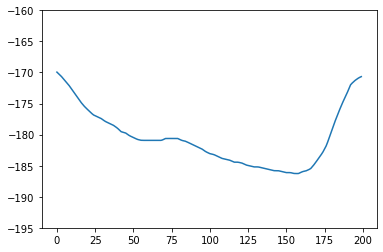

In [125]:
plt.plot(norm_seg_ppg[17])
plt.ylim(-195,-160)

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(seg_ppg)
plt.scatter(idx_ppg_peak,val_ppg_peak, c='r')

In [137]:
peak1

[122, 302, 497, 1510, 1695, 1881]

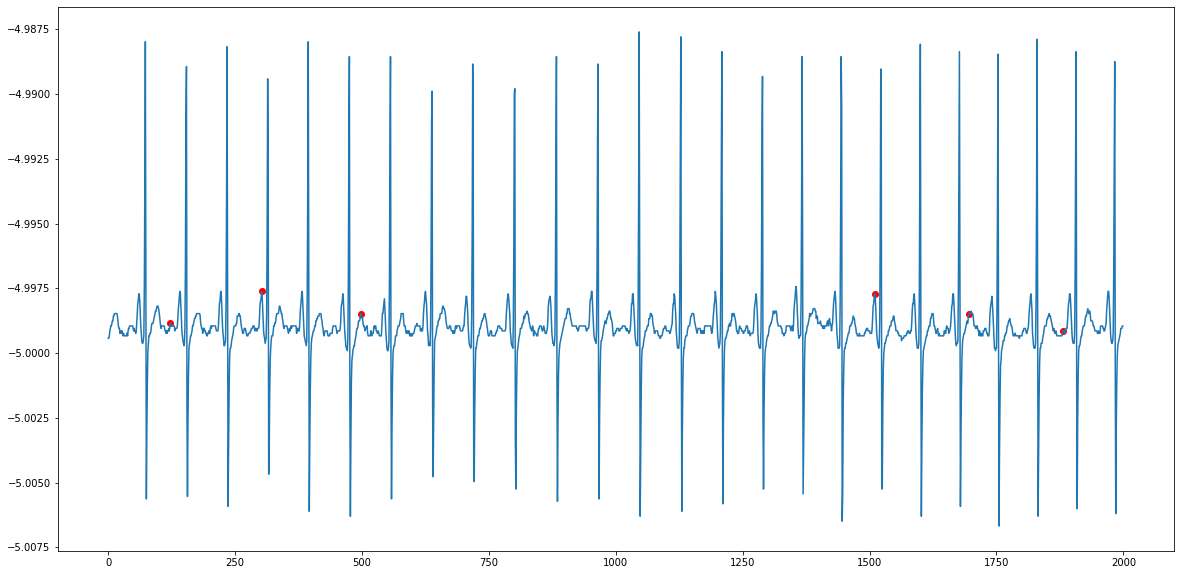

In [150]:
peak1 = arr.detect_qrs(seg_ecg,100)

plt.figure(figsize=(20,10))
plt.plot(seg_ecg)
plt.scatter(peak1, np.array(seg_ecg)[peak1],color='r')

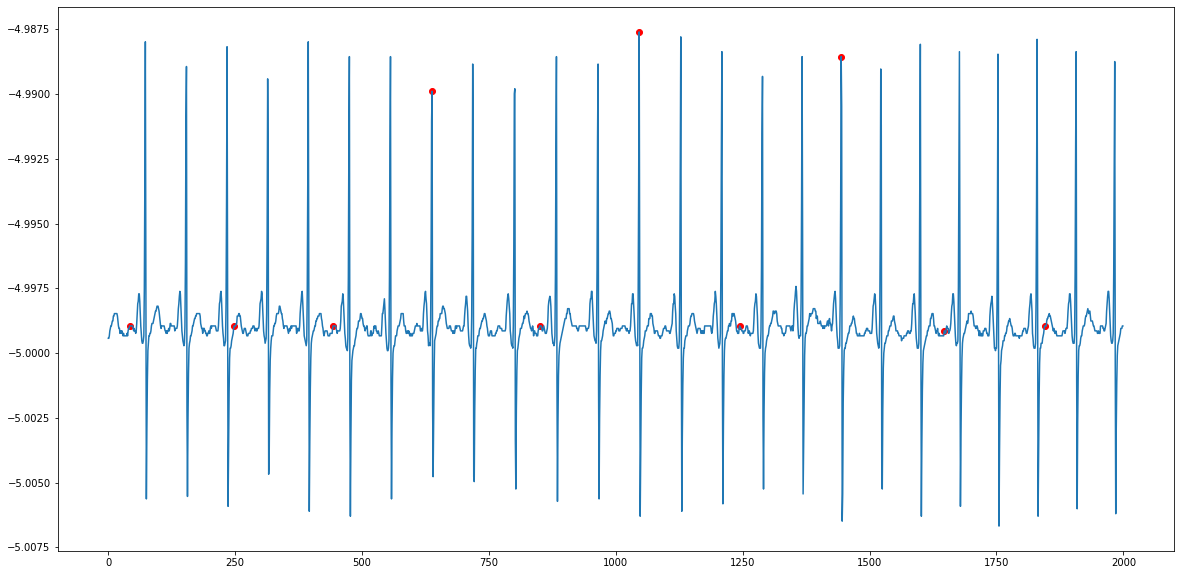

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(seg_ecg)
plt.scatter(idx_ecg_peak,val_ecg_peak, c='r')

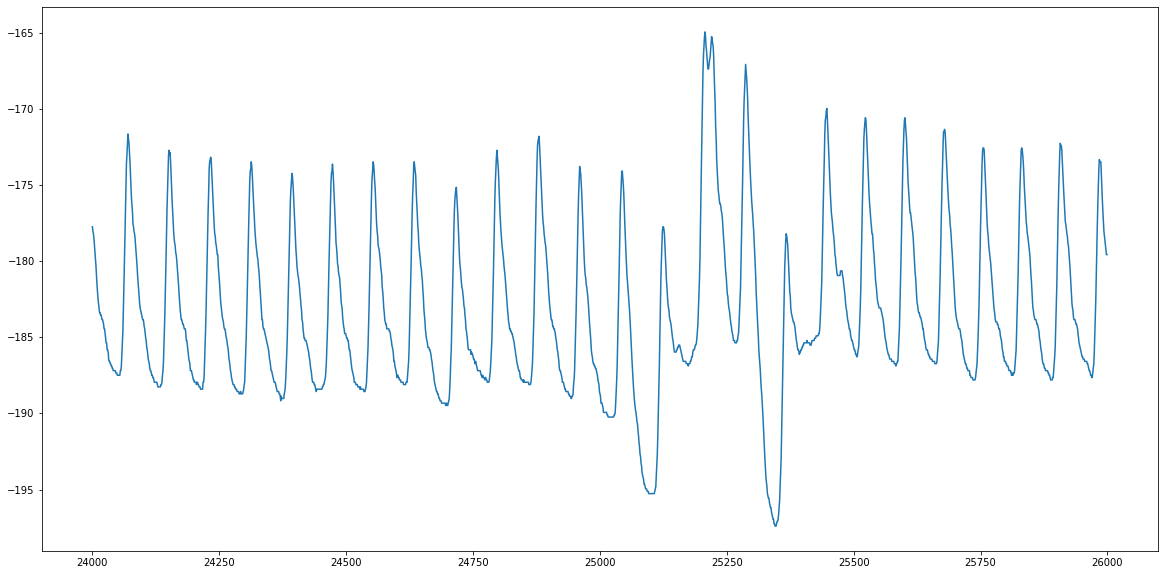

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df_vital['ECG'][24000:26000])

plt.figure(figsize=(20,10))
plt.plot(df_vital['PPG'][24000:26000])

In [186]:
mask = [('PACU1_2_190828_105401.vital' in fs) for fs in f_vital_list]

np.array(f_vital_list)[mask]

array(['4.0,8963,PACU1_2_190828_105401.vital',
       '7.0,1903,PACU1_2_190828_105401.vital',
       '5.0,1902,PACU1_2_190828_105401.vital'], dtype='<U38')

4.0,8963,PACU1_2_190828_105401.vital


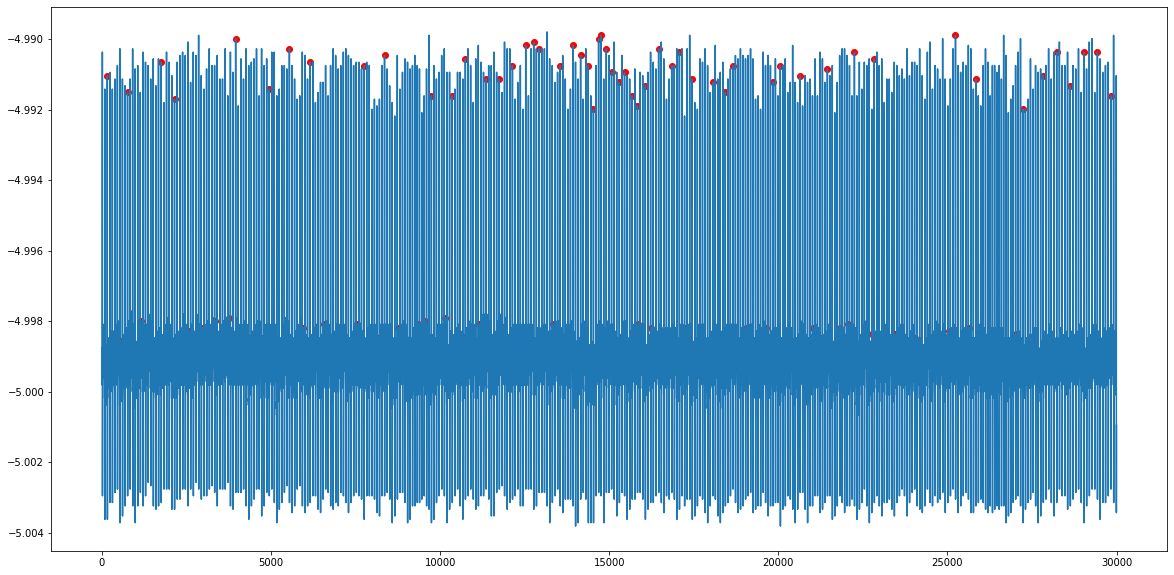

In [185]:
import matplotlib.pyplot as plt


vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


idx = 20
f_vital = (f_vital_list[idx])
print(f_vital)
#f_vital= '6.0,0,PACU1_1_190408_115004.vital'
df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
ecg = np.array(df_vital['ECG'].tolist())#[12000:24000]
ecg_peak = arr.detect_qrs(ecg, 100)


plt.figure(figsize=(20,10))
plt.plot(ecg)
plt.scatter(ecg_peak, ecg[ecg_peak], color='r')


#plt.figure(figsize=(20,10))
#plt.plot(df_vital['PPG'])
#plt.scatter(ppg_peak, np.array(df_vital['PPG'].tolist())[ppg_peak], color='r')

In [231]:
arr.detect_qrs(ecg, 100)

[]

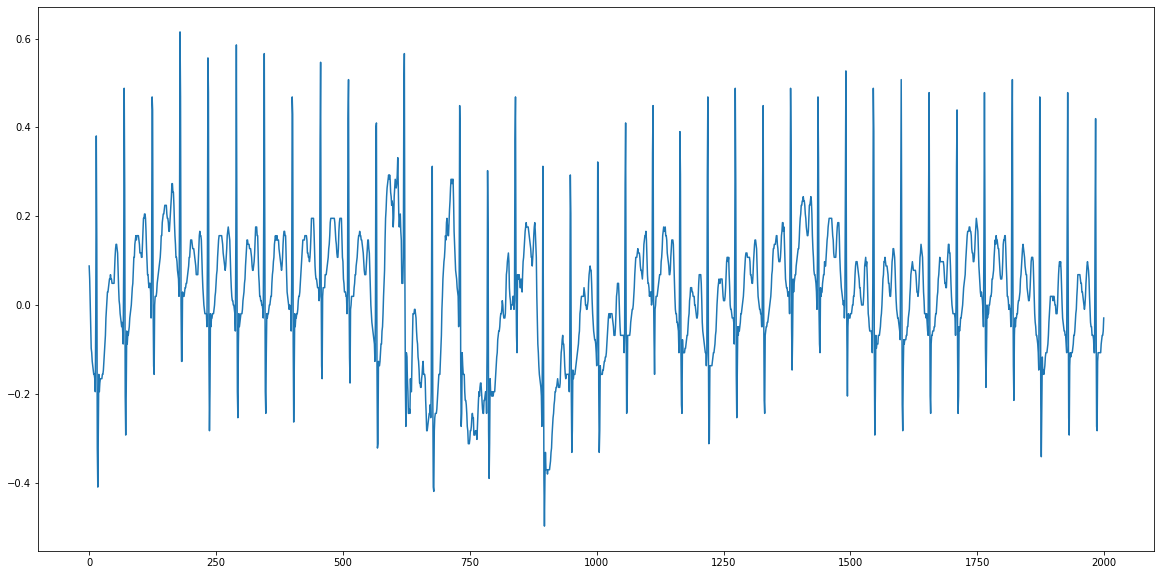

In [236]:
plt.figure(figsize=(20,10))
plt.plot(ecg[18000:20000])

### random으로 예시 뽑기

1239
2.0,4376,PACU1_3_200309_142301.vital


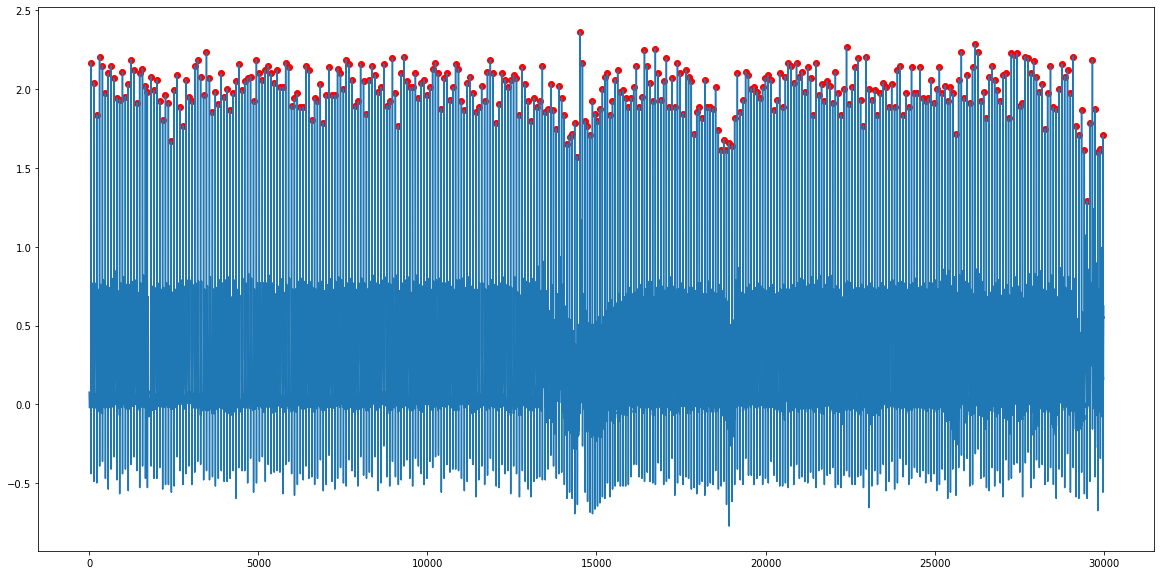

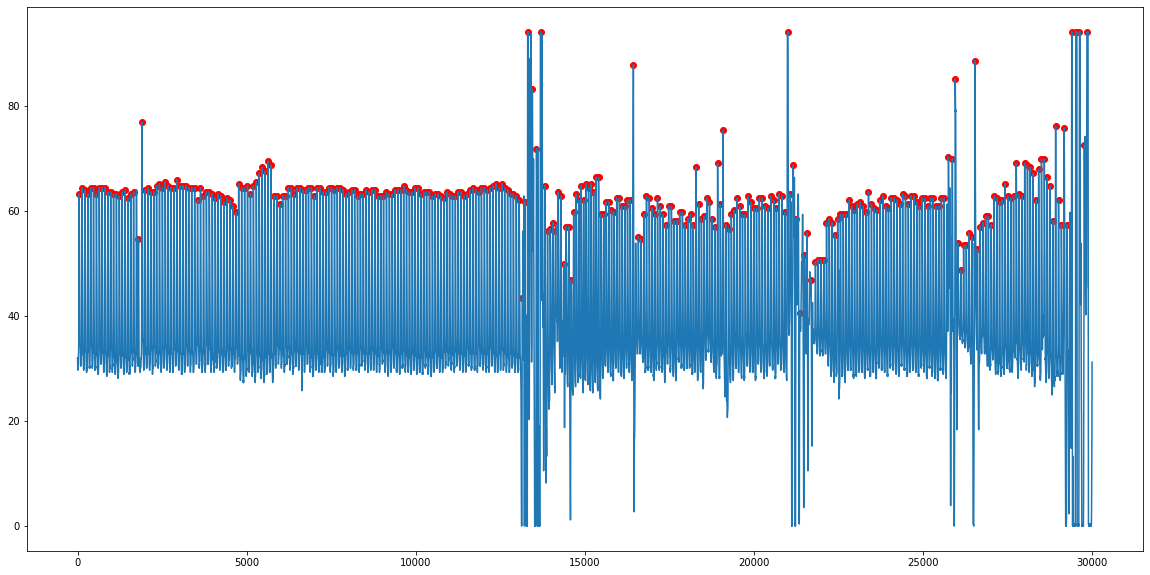

In [258]:
import matplotlib.pyplot as plt
import random

vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


idx = random.randint(0,len(f_vital_list)-1)
f_vital = (f_vital_list[idx])


ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital


print(idx)
print(f_vital)
#f_vital= '6.0,0,PACU1_1_190408_115004.vital'
df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
ecg = np.array(df_vital['ECG'].tolist())#[18000:24000]
ppg = np.array(df_vital['PPG'].tolist())#[18000:24000]
ecg_peak = pickle.load(open(ecg_cache, 'rb'))
ppg_peak = pickle.load(open(ppg_cache, 'rb'))
#ecg_peak = arr.detect_qrs(ecg, 100)


plt.figure(figsize=(20,10))
plt.plot(ecg)
plt.scatter(ecg_peak, ecg[ecg_peak], color='r')


plt.figure(figsize=(20,10))
plt.plot(ppg)
plt.scatter(ppg_peak, ppg[ppg_peak], color='r')

4.0,8963,PACU1_2_190828_105401.vital


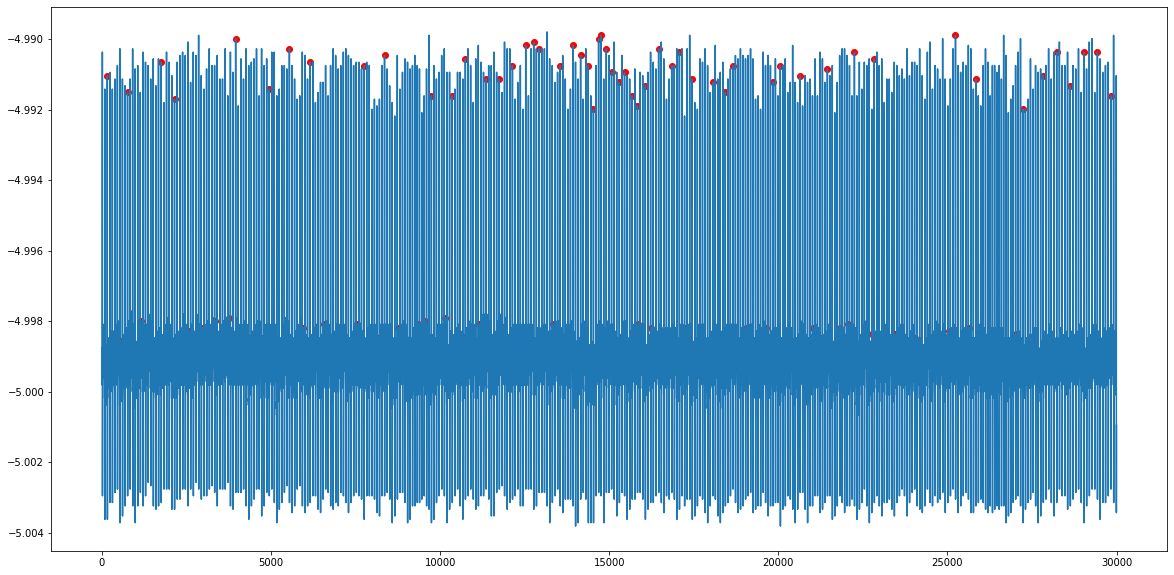

In [187]:
import matplotlib.pyplot as plt


vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


idx = 20
f_vital = (f_vital_list[idx])
print(f_vital)
#f_vital= '6.0,0,PACU1_1_190408_115004.vital'
df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
ecg = np.array(df_vital['ECG'].tolist())#[12000:24000]
ecg_peak = arr.detect_qrs(ecg, 100)


plt.figure(figsize=(20,10))
plt.plot(ecg)
plt.scatter(ecg_peak, ecg[ecg_peak], color='r')


plt.figure(figsize=(20,10))
plt.plot(df_vital['PPG'])
plt.scatter(ppg_peak, np.array(df_vital['PPG'].tolist())[ppg_peak], color='r')

In [189]:
plt.figure(figsize=(20,10))
plt.plot(df_vital['PPG'].tolist()[0:5000])

In [173]:
df_vital

index                   Abs_time         PPG       ECG
0       89882 2019-09-02 16:19:59.018801 -185.656738 -4.997711
1       89883 2019-09-02 16:19:59.028801 -185.809326 -4.997330
2       89884 2019-09-02 16:19:59.038801 -185.809326 -4.997044
3       89885 2019-09-02 16:19:59.048801 -185.809326 -4.996662
4       89886 2019-09-02 16:19:59.058801 -185.656738 -4.996185
...       ...                        ...         ...       ...
29995  119877 2019-09-02 16:24:58.968801 -188.403320 -5.000191
29996  119878 2019-09-02 16:24:58.978801 -188.403320 -5.000286
29997  119879 2019-09-02 16:24:58.988801 -188.555908 -5.000381
29998  119880 2019-09-02 16:24:58.998801 -188.555908 -5.000381
29999  119881 2019-09-02 16:24:59.008801 -188.555908 -5.000477

[30000 rows x 4 columns]

In [197]:
np.array(df_preprocess.loc[-1, [str(i) for i in range(1, 58)]].tolist())[:,2]

array([list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 0.7142857142857143]), list([0.0, 0.5714285714285714]),
       list([0.0, 0.75]), list([0.0, 0.7333333333333333]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0

In [89]:
df_preprocess

file_path  \
-1  5.0,2434,PACU1_10_191017_131250.vital   

                                       1  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       2  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       3  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       4  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       5  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       6  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       7  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       8  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                       9  ...  \
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])  ...   

                                                   48  \
-1  (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   

                                                   49  \
-1  (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   

                                        50  \
-1  (False, [0.0, 0.0, 0.0], [0.125, 1.0])   

                                       51  \
-1  (False, [0.0, 0.0, 0.0], [0.12, 1.0])   

                                                   52  \
-1  (False, [0.0, 0.0, 0.0], [0.07692307692307693,...   

                                       53  \
-1  (False, [0.0, 0.0, 0.0], [0.08, 1.0])   

                                                   54  \
-1  (False, [0.0, 0.0, 0.0], [0.038461538461538464...   

                                                   55  \
-1  (False, [0.0, 0.0, 0.0], [0.038461538461538464...   

                                      56                                    57  
-1  (False, [0.0, 0.0, 0.0], [0.0, 1.0])  (False, [0.0, 0.0, 0.0], [0.0, 1.0])  

[1 rows x 58 columns]

### previous peaks

In [168]:
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_2min'
f_vital_list = os.listdir(vital_path)

    
SRATE, f_num = 100, 0


idx = 10
f_vital = f_vital_list[idx]
# vital data 불러오기    
df_vit = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_2min/'+f_vital, 'rb'))
ecg_pk = arr.detect_qrs(df_vit['ECG'],100)


plt.figure(figsize=(20,10))

plt.plot(df_vit['ECG'])
plt.scatter(ecg_peak, np.array(df_vit['ECG'].tolist())[ecg_peak], color = 'r')
plt.scatter(ecg_pk, np.array(df_vit['ECG'].tolist())[ecg_pk], color = 'g')

### PACU1_2_190828_105401.vital
- vitaldb에서 ppg, ecg가 scale이 이상하게 뽑힘 + ppg의 모양 이상
- 다른 예시
  - PACU1_12_191024_095055.vital

In [224]:
df_match = pd.read_csv('vital_to_pickle/ftn+_age_match_20201224-Copy1.csv',sep=',')
df_match[df_match['path']=='PACU1_2_190828_105401.vital']

Unnamed: 0       oID       hid gender            birthdate  \
1890        1902  24370599  52716863      F  1981-01-30 00:00:00   
1891        1903  24370599  52716863      F  1981-01-30 00:00:00   
8898        8963  24370599  52716863      F  1981-01-30 00:00:00   

                 NRS_time  Value  bed           opend_time       opid  \
1890  2019-08-28 10:55:00    5.0    2  2019-08-28 10:40:00  190828045   
1891  2019-08-28 11:11:00    7.0    2  2019-08-28 10:40:00  190828045   
8898  2019-08-28 11:30:00    4.0    2  2019-08-28 10:40:00  190828045   

                             path                opday  age_year  
1890  PACU1_2_190828_105401.vital  2019-08-28 00:00:00        38  
1891  PACU1_2_190828_105401.vital  2019-08-28 00:00:00        38  
8898  PACU1_2_190828_105401.vital  2019-08-28 00:00:00        38

In [222]:
rec_list = os.listdir(vital_path)
lista = os.listdir(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min')


mask= ['PACU1_2_190828_105401.vital' in rec for rec in lista]
np.array(lista)[mask]

array(['4.0,8963,PACU1_2_190828_105401.vital',
       '7.0,1903,PACU1_2_190828_105401.vital',
       '5.0,1902,PACU1_2_190828_105401.vital'], dtype='<U38')

In [213]:
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)

    
SRATE, f_num = 100, 0


idx = 10
f_vital = '4.0,8963,PACU1_2_190828_105401.vital'
# vital data 불러오기    
df_vit = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
#ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_2min/'+f_vital, 'rb'))
#ecg_pk = arr.detect_qrs(df_vit['ECG'],100)
ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))


plt.figure(figsize=(20,10))

plt.plot(df_vit['PPG'])
plt.scatter(ppg_peak, np.array(df_vit['PPG'].tolist())[ppg_peak], color = 'r')
#plt.scatter(ecg_pk, np.array(df_vit['ECG'].tolist())[ecg_pk], color = 'g')

In [221]:
ppg = df_vit['PPG'][0:2000]
minp, maxp = arr.detect_peaks(ppg, 100)


plt.figure(figsize=(20,10))

plt.plot(ppg)
plt.scatter(maxp, np.array(ppg)[maxp], color = 'r')
plt.scatter(minp, np.array(ppg)[minp], color = 'g')

In [225]:
df_preprocess = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))
df_preprocess[df_preprocess['caseids']=='PACU1_2_190828_105401.csv']#[[str(i) for i in range(24,58)]]

caseids  NRS                             file_path  \
20    PACU1_2_190828_105401.csv  4.0  4.0,8963,PACU1_2_190828_105401.vital   
4774  PACU1_2_190828_105401.csv  7.0  7.0,1903,PACU1_2_190828_105401.vital   
6173  PACU1_2_190828_105401.csv  5.0  5.0,1902,PACU1_2_190828_105401.vital   

           opid age gender                                                  1  \
20    190828045  38      F  (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...   
4774  190828045  38      F                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173  190828045  38      F                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      2  \
20    (False, [0.0, 0.0, 0.0], [0.391304347826087, 1...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      3  \
20    (False, [0.0, 0.0, 0.0], [0.21739130434782608,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      4  ...  \
20    (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...  ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])  ...   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])  ...   

                                                     48  \
20    (False, [0.0, 0.0, 0.0], [0.2692307692307692, ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     49  \
20    (False, [0.0, 0.0, 0.0], [0.3076923076923077, ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     50  \
20    (False, [0.0, 0.0, 0.0], [0.34615384615384615,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     51  \
20    (False, [0.0, 0.0, 0.0], [0.34615384615384615,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     52  \
20    (False, [0.0, 0.0, 0.0], [0.2692307692307692, ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     53  \
20    (False, [0.0, 0.0, 0.0], [0.23076923076923078,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                         54  \
20    (False, [0.0, 0.0, 0.0], [0.28, 1.0])   
4774     (False, [0.0, 0.0, 0.0], [-2, -2])   
6173     (False, [1.0, 1.0, 1.0], [-1, -1])   

                                         55  \
20    (False, [0.0, 0.0, 0.0], [0.28, 1.0])   
4774     (False, [0.0, 0.0, 0.0], [-2, -2])   
6173     (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     56  \
20    (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...   
4774               (False, [0.0, 0.0, 0.0], [1.0, 1.0])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     57  
20    (False, [0.0, 0.0, 0.0], [0.6363636363636364, ...  
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])  
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])  

[3 rows x 63 columns]

In [164]:
df_match = pd.read_csv('ftn+_age_match_20201224-Copy1.csv',sep=',')
df_match['NRS_time']=pd.to_datetime(df_match['NRS_time'])
df_match = df_match.rename(columns={'Unnamed: 0':'index'})
#df_match.reset_index(inplace=True, drop=True)

print(len(df_match))

srate= 100
for i in range(len(df_match)):
    filename = str(df_match.loc[i,'Value'])+','+str(df_match.loc[i,'index'])+','+ df_match.loc[i,'path']
    if True:
        print(i, end=' ')
        i = 1890
        rec_path = '../../../cranberry2/Preprocessing/vital_data/pacu_full_vital/'+ 'PACU1_2_190828_105401.vital'#df_match.loc[i,'path']
        print(rec_path)
        #print('1')
        vfile_ecg = vitaldb.vital_recs_time(rec_path,['SNUADCW/ECG_II'],interval=0.01).flatten()
        vfile_ppg = vitaldb.vital_recs_time(rec_path,['SNUADCW/PLETH'],interval=0.01).flatten()

        #print(vfile)
        if len(vfile_ecg[0])==0 | len(vfile_ppg[0])==0:
            print('index ',df_match.loc[i,'index'],' OPID ',df_match.loc[i,'opid'],'empty vital file')
        else:
            Abs_time = [vfile_ecg[1]+datetime.timedelta(hours=9)+datetime.timedelta(seconds=i/srate) for i in range(len(vfile_ecg[0]))]
            #print(vfile[1])
            dics = {'Abs_time':Abs_time,'PPG':vfile_ppg[0],'ECG':vfile_ecg[0]}
            df_vital = pd.DataFrame(data=dics)
            end_idx_list = df_vital[(df_vital['Abs_time'] > df_match.loc[i,'NRS_time'] - datetime.timedelta(seconds=1)) & (df_vital['Abs_time'] < df_match.loc[i,'NRS_time'] + datetime.timedelta(seconds=1))].index.tolist()

            if len(end_idx_list)==0:
                print('index ',i,' OPID ',df_match.loc[i,'opid']," no vital data at NRS time")

            else:
                end_idx=end_idx_list[0]+1
                start_idx= end_idx - 5 * 60 * srate
                start_idx_n = max(0,start_idx)


                ext = df_vital[start_idx_n:end_idx]
                extr=ext.dropna(subset=['ECG'])
                extr=extr.drop_duplicates(subset=['ECG'])

                if len(extr)>1:
                    if start_idx <0 :
                        fit = (-1)*end_idx 
                        extraction = pd.DataFrame(index=range(5*60*srate),columns=['Abs_time','PPG','ECG'])
                        extraction[fit:]=ext
                        

                    else:
                        extraction = ext
            break